In [4]:
import pandas as pd
import numpy as np
from libs import data_loading_maristany, functions
from libs.data_loading_generated import calculate_features_simulation, calculate_features_simulation_v2
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
import copy

from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

In [5]:
data_df = calculate_features_simulation("configs/features_config.json", "data/FINISHED_SIMULATIONS/", calc_type='v3')
data_df

Skipping line due to IndexError:   8 0.15
Skipping line due to IndexError:   22
Skipping line due to IndexError:   25 0.49
Skipping line due to ValueError:   18 0.35 363.725 0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

,seq,170.0_T,190.0_T,200.0_T,205.0_T,210.0_T,215.0_T,ct,arginine_count(C),molecular_weight(BP),...,307.0_T,314.0_T,321.0_T,328.0_T,335.0_T,342.0_T,349.0_T,356.0_T,363.0_T,370.0_T
CCMM_SYNE7_-10s+10t,PPVIVRTTPAATADFHTTPTPTPLRPTTSEATTVTAYNGQGRLTTE...,"{'conc': {'dilute_conc': 9.68720511649155e-07,...",{'conc': {'dilute_conc': 2.6153428987040463e-0...,{'conc': {'dilute_conc': 8.243248329884717e-06...,{'conc': {'dilute_conc': 5.455603450586264e-06...,{'conc': {'dilute_conc': 0.0005501849107073831...,{'conc': {'dilute_conc': 0.0006545707243947007...,236.99,0.098765,8920.9116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CCMM_SYNE7_-5t+5s,PPVIVRSTPAASADFHSSPSPSPLRPSSSEATSVSAYNGQGRLSSE...,{'conc': {'dilute_conc': 1.0868564561940133e-0...,{'conc': {'dilute_conc': 3.2212674108638426e-0...,{'conc': {'dilute_conc': 2.172423744855967e-06...,{'conc': {'dilute_conc': 9.941284730913641e-06...,{'conc': {'dilute_conc': 0.0004818503263204225...,NaN,240.22,0.098765,8710.5126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CEP3_-5S+5T,MGLSFTGARPCCCRNNVLITDDGEVVSLTAHDFDVVDIETEEEGNF...,NaN,"{'conc': {'dilute_conc': 0.017187570704742458,...","{'conc': {'dilute_conc': 0.032879411220571614,...",NaN,NaN,"{'conc': {'dilute_conc': 0.09697021206664574, ...",228.94,0.104167,10556.6494,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CEP3_HHV11_P04289_Wildtype,MGLSFSGARPCCCRNNVLITDDGEVVSLTAHDFDVVDIESEEEGNF...,NaN,NaN,NaN,NaN,NaN,NaN,224.50,0.104167,10486.5164,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CGAS_-5Q+5N,MQPWHGKAMNRASEAGATAPKASARNARGAPMDPTESPAAPEAALP...,"{'conc': {'dilute_conc': 0.0, 'dense_conc': 0....",{'conc': {'dilute_conc': 0.0028438205892776383...,"{'conc': {'dilute_conc': 0.08223138588301507, ...",NaN,NaN,NaN,216.44,0.100671,15267.9303,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tdp43_-10n+10q,RGGGAGLGQNQGSQMGGGMQFGAFSIQPAMMAAAQAALQSSWGMMG...,{'conc': {'dilute_conc': 7.701969849246231e-09...,{'conc': {'dilute_conc': 2.139842691719467e-07...,{'conc': {'dilute_conc': 2.7494400574300075e-0...,NaN,{'conc': {'dilute_conc': 2.2408227889447237e-0...,NaN,270.49,0.016393,12054.9271,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tdp43_-10q+10n,RGGGAGLGNNNGSNMGGGMNFGAFSINPAMMAAANAALNSSWGMMG...,NaN,{'conc': {'dilute_conc': 2.3912517131110097e-0...,{'conc': {'dilute_conc': 3.4055175879396987e-0...,NaN,{'conc': {'dilute_conc': 2.909298862734726e-07...,NaN,276.74,0.016393,11815.4470,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tdp43_-15n+15q,RGGGAGLGQNQGSQMGGGMQFGAFSIQPAMMAAAQAALQSSWGMMG...,NaN,{'conc': {'dilute_conc': 1.5816858204063798e-0...,{'conc': {'dilute_conc': 7.152183645500227e-08...,NaN,{'conc': {'dilute_conc': 8.589976130653265e-07...,NaN,269.57,0.016393,12125.0601,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tdp43_-20q+20n,RGGGAGLGNNQGSNMGGGMNFGAFSINPAMMAAAQAALQSSWGMMG...,NaN,"{'conc': {'dilute_conc': 0.0, 'dense_conc': 0....","{'conc': {'dilute_conc': 0.0, 'dense_conc': 0....",NaN,{'conc': {'dilute_conc': 3.5182755884686595e-0...,NaN,273.71,0.016393,11914.6611,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tdp43_-5f,RGGGAGLGNNQGSNMGGGMNGGASSINPAMMAAAQAALQSSWGMMG...,NaN,NaN,{'conc': {'dilute_conc': 0.0002410128989176652...,{'conc': {'dilute_conc': 8.057149246231157e-06...,{'conc': {'dilute_conc': 0.0007375690816862088...,{'conc': {'dilute_conc': 0.0011498333951423785...,234.82,0.016393,11524.1006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
def clear_df(data_df):
    columns_to_drop = []
    for column_name in data_df.columns:
        if not isinstance(data_df.iloc[0][column_name], np.number) and column_name != "seq" and  not column_name.endswith("_T"):
            columns_to_drop.append(column_name)
    data_df = data_df.drop(labels=columns_to_drop, axis=1)
    data_df

In [7]:
columns_to_drop = []
for column_name in data_df.columns:
    if not isinstance(data_df.iloc[0][column_name], np.number) and column_name != "seq" and  not column_name.endswith("_T"):
        columns_to_drop.append(column_name)
data_df = data_df.drop(labels=columns_to_drop, axis=1)
data_df

,seq,170.0_T,190.0_T,200.0_T,205.0_T,210.0_T,215.0_T,ct,arginine_count(C),molecular_weight(BP),...,307.0_T,314.0_T,321.0_T,328.0_T,335.0_T,342.0_T,349.0_T,356.0_T,363.0_T,370.0_T
CCMM_SYNE7_-10s+10t,PPVIVRTTPAATADFHTTPTPTPLRPTTSEATTVTAYNGQGRLTTE...,"{'conc': {'dilute_conc': 9.68720511649155e-07,...",{'conc': {'dilute_conc': 2.6153428987040463e-0...,{'conc': {'dilute_conc': 8.243248329884717e-06...,{'conc': {'dilute_conc': 5.455603450586264e-06...,{'conc': {'dilute_conc': 0.0005501849107073831...,{'conc': {'dilute_conc': 0.0006545707243947007...,236.99,0.098765,8920.9116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CCMM_SYNE7_-5t+5s,PPVIVRSTPAASADFHSSPSPSPLRPSSSEATSVSAYNGQGRLSSE...,{'conc': {'dilute_conc': 1.0868564561940133e-0...,{'conc': {'dilute_conc': 3.2212674108638426e-0...,{'conc': {'dilute_conc': 2.172423744855967e-06...,{'conc': {'dilute_conc': 9.941284730913641e-06...,{'conc': {'dilute_conc': 0.0004818503263204225...,NaN,240.22,0.098765,8710.5126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CEP3_-5S+5T,MGLSFTGARPCCCRNNVLITDDGEVVSLTAHDFDVVDIETEEEGNF...,NaN,"{'conc': {'dilute_conc': 0.017187570704742458,...","{'conc': {'dilute_conc': 0.032879411220571614,...",NaN,NaN,"{'conc': {'dilute_conc': 0.09697021206664574, ...",228.94,0.104167,10556.6494,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CEP3_HHV11_P04289_Wildtype,MGLSFSGARPCCCRNNVLITDDGEVVSLTAHDFDVVDIESEEEGNF...,NaN,NaN,NaN,NaN,NaN,NaN,224.50,0.104167,10486.5164,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CGAS_-5Q+5N,MQPWHGKAMNRASEAGATAPKASARNARGAPMDPTESPAAPEAALP...,"{'conc': {'dilute_conc': 0.0, 'dense_conc': 0....",{'conc': {'dilute_conc': 0.0028438205892776383...,"{'conc': {'dilute_conc': 0.08223138588301507, ...",NaN,NaN,NaN,216.44,0.100671,15267.9303,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tdp43_-10n+10q,RGGGAGLGQNQGSQMGGGMQFGAFSIQPAMMAAAQAALQSSWGMMG...,{'conc': {'dilute_conc': 7.701969849246231e-09...,{'conc': {'dilute_conc': 2.139842691719467e-07...,{'conc': {'dilute_conc': 2.7494400574300075e-0...,NaN,{'conc': {'dilute_conc': 2.2408227889447237e-0...,NaN,270.49,0.016393,12054.9271,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tdp43_-10q+10n,RGGGAGLGNNNGSNMGGGMNFGAFSINPAMMAAANAALNSSWGMMG...,NaN,{'conc': {'dilute_conc': 2.3912517131110097e-0...,{'conc': {'dilute_conc': 3.4055175879396987e-0...,NaN,{'conc': {'dilute_conc': 2.909298862734726e-07...,NaN,276.74,0.016393,11815.4470,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tdp43_-15n+15q,RGGGAGLGQNQGSQMGGGMQFGAFSIQPAMMAAAQAALQSSWGMMG...,NaN,{'conc': {'dilute_conc': 1.5816858204063798e-0...,{'conc': {'dilute_conc': 7.152183645500227e-08...,NaN,{'conc': {'dilute_conc': 8.589976130653265e-07...,NaN,269.57,0.016393,12125.0601,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tdp43_-20q+20n,RGGGAGLGNNQGSNMGGGMNFGAFSINPAMMAAAQAALQSSWGMMG...,NaN,"{'conc': {'dilute_conc': 0.0, 'dense_conc': 0....","{'conc': {'dilute_conc': 0.0, 'dense_conc': 0....",NaN,{'conc': {'dilute_conc': 3.5182755884686595e-0...,NaN,273.71,0.016393,11914.6611,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tdp43_-5f,RGGGAGLGNNQGSNMGGGMNGGASSINPAMMAAAQAALQSSWGMMG...,NaN,NaN,{'conc': {'dilute_conc': 0.0002410128989176652...,{'conc': {'dilute_conc': 8.057149246231157e-06...,{'conc': {'dilute_conc': 0.0007375690816862088...,{'conc': {'dilute_conc': 0.0011498333951423785...,234.82,0.016393,11524.1006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
temp_columns = [cn for cn in data_df.columns if cn.endswith("_T")]
    
x_columns = [cn for cn in data_df.columns if cn not in temp_columns + ['seq']]

In [9]:
temp_columns

['170.0_T',
 '190.0_T',
 '200.0_T',
 '205.0_T',
 '210.0_T',
 '215.0_T',
 '150.0_T',
 '180.0_T',
 '220.0_T',
 '160.0_T',
 '185.0_T',
 '230.0_T',
 '240.0_T',
 '250.0_T',
 '270.0_T',
 '254.0_T',
 '225.0_T',
 '290.0_T',
 '300.0_T',
 '307.0_T',
 '314.0_T',
 '321.0_T',
 '328.0_T',
 '335.0_T',
 '342.0_T',
 '349.0_T',
 '356.0_T',
 '363.0_T',
 '370.0_T']

In [10]:
new_rows = []
for gene_name, row in data_df.iterrows():
   for temp_column_name in temp_columns:
       if not pd.isna(row[temp_column_name]): 
           new_rows.append(pd.concat([pd.Series({"gene": gene_name}),
                                   row[x_columns],
                                   pd.Series({"temp": temp_column_name.split("_")[0], **row[temp_column_name]['conc']})]))

In [11]:
data_df_ext = pd.DataFrame(new_rows)
data_df_ext

,gene,ct,arginine_count(C),molecular_weight(BP),isoelectric_pint(BP),aromaticity(BP),net_charge(BP),hydropathy_index(BP),length(BP),instability_index(BP),...,radius_of_gyration(SP),end_to_end_distance(SP),asphericity(SP),scaling_exponent(SP),prefactor(SP),temp,dilute_conc,dense_conc,var_dilute,var_dense
0,CCMM_SYNE7_-10s+10t,236.99,0.098765,8920.9116,10.253004,0.061728,4.130572,-0.602469,81,25.098765,...,26.219981,62.526837,0.416176,0.539948,6.696292,170.0,9.687205e-07,0.407493,0.000003,0.348657
1,CCMM_SYNE7_-10s+10t,236.99,0.098765,8920.9116,10.253004,0.061728,4.130572,-0.602469,81,25.098765,...,26.219981,62.526837,0.416176,0.539948,6.696292,190.0,2.615343e-06,0.368057,0.000009,0.304093
2,CCMM_SYNE7_-10s+10t,236.99,0.098765,8920.9116,10.253004,0.061728,4.130572,-0.602469,81,25.098765,...,26.219981,62.526837,0.416176,0.539948,6.696292,200.0,8.243248e-06,0.345748,0.000016,0.278036
3,CCMM_SYNE7_-10s+10t,236.99,0.098765,8920.9116,10.253004,0.061728,4.130572,-0.602469,81,25.098765,...,26.219981,62.526837,0.416176,0.539948,6.696292,205.0,5.455603e-06,0.325992,0.000012,0.269234
4,CCMM_SYNE7_-10s+10t,236.99,0.098765,8920.9116,10.253004,0.061728,4.130572,-0.602469,81,25.098765,...,26.219981,62.526837,0.416176,0.539948,6.696292,210.0,5.501849e-04,0.308180,0.000115,0.257561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,TIA_Wildtype,383.46,0.010309,10888.7847,5.751049,0.154639,-0.505836,-1.051546,97,43.789691,...,22.166524,49.816533,0.317135,0.373994,10.720762,342.0,9.088850e-03,0.571476,0.019048,0.084888
88,TIA_Wildtype,383.46,0.010309,10888.7847,5.751049,0.154639,-0.505836,-1.051546,97,43.789691,...,22.166524,49.816533,0.317135,0.373994,10.720762,349.0,1.204201e-02,0.552568,0.019770,0.065328
89,TIA_Wildtype,383.46,0.010309,10888.7847,5.751049,0.154639,-0.505836,-1.051546,97,43.789691,...,22.166524,49.816533,0.317135,0.373994,10.720762,356.0,1.248921e-02,0.521355,0.015879,0.056948
90,TIA_Wildtype,383.46,0.010309,10888.7847,5.751049,0.154639,-0.505836,-1.051546,97,43.789691,...,22.166524,49.816533,0.317135,0.373994,10.720762,363.0,2.639162e-02,0.447404,0.021261,0.068108


In [12]:
data_df_ext.isna().any()

gene                                         False
ct                                           False
arginine_count(C)                            False
molecular_weight(BP)                         False
isoelectric_pint(BP)                         False
aromaticity(BP)                              False
net_charge(BP)                               False
hydropathy_index(BP)                         False
length(BP)                                   False
instability_index(BP)                        False
fraction_of_charged_residues(S)              False
fraction_of_positive_residues(S)             False
fraction_of_negative_residues(S)             False
net_charge_per_residue(S)                    False
charge_segregation_kappa(S)                   True
sequence_charge_decoration_1(S)              False
sequence_charge_decoration_2(S)              False
fraction_aliphatic(S)                        False
fraction_polar(S)                            False
fraction_proline(S)            

In [13]:
data_df_ext['charge_segregation_kappa(S)']

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
87   NaN
88   NaN
89   NaN
90   NaN
91   NaN
Name: charge_segregation_kappa(S), Length: 92, dtype: float64

In [14]:
del data_df_ext['charge_segregation_kappa(S)']

In [15]:
x_columns.remove('charge_segregation_kappa(S)')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data_df_ext[x_columns+["temp"]],
                                                    data_df_ext["dense_conc"],
                                                    test_size=0.2,
                                                    random_state=0,
                                                    shuffle=False)

In [17]:
X_train

,ct,arginine_count(C),molecular_weight(BP),isoelectric_pint(BP),aromaticity(BP),net_charge(BP),hydropathy_index(BP),length(BP),instability_index(BP),fraction_of_charged_residues(S),...,hydrophobicity(S),compute_iwd_charged_weighted_+(S),compute_iwd_charged_weighted_-(S),compute_bivariate_iwd_charged_weighted(S),radius_of_gyration(SP),end_to_end_distance(SP),asphericity(SP),scaling_exponent(SP),prefactor(SP),temp
0,236.99,0.098765,8920.9116,10.253004,0.061728,4.130572,-0.602469,81,25.098765,0.172840,...,3.897531,0.327494,0.018809,0.277219,26.219981,62.526837,0.416176,0.539948,6.696292,170.0
1,236.99,0.098765,8920.9116,10.253004,0.061728,4.130572,-0.602469,81,25.098765,0.172840,...,3.897531,0.327494,0.018809,0.277219,26.219981,62.526837,0.416176,0.539948,6.696292,190.0
2,236.99,0.098765,8920.9116,10.253004,0.061728,4.130572,-0.602469,81,25.098765,0.172840,...,3.897531,0.327494,0.018809,0.277219,26.219981,62.526837,0.416176,0.539948,6.696292,200.0
3,236.99,0.098765,8920.9116,10.253004,0.061728,4.130572,-0.602469,81,25.098765,0.172840,...,3.897531,0.327494,0.018809,0.277219,26.219981,62.526837,0.416176,0.539948,6.696292,205.0
4,236.99,0.098765,8920.9116,10.253004,0.061728,4.130572,-0.602469,81,25.098765,0.172840,...,3.897531,0.327494,0.018809,0.277219,26.219981,62.526837,0.416176,0.539948,6.696292,210.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,271.00,0.016393,11994.6581,8.299483,0.073770,0.757020,-0.737705,122,24.848361,0.040984,...,3.762295,0.000975,0.000000,0.001459,29.483436,68.013583,0.401143,0.514865,6.605451,250.0
69,257.58,0.016393,11898.6617,8.745539,0.073770,0.763014,-0.536066,122,27.095902,0.040984,...,3.963934,0.000975,0.000000,0.001459,29.748210,68.907718,0.405126,0.520452,6.532123,170.0
70,257.58,0.016393,11898.6617,8.745539,0.073770,0.763014,-0.536066,122,27.095902,0.040984,...,3.963934,0.000975,0.000000,0.001459,29.748210,68.907718,0.405126,0.520452,6.532123,190.0
71,257.58,0.016393,11898.6617,8.745539,0.073770,0.763014,-0.536066,122,27.095902,0.040984,...,3.963934,0.000975,0.000000,0.001459,29.748210,68.907718,0.405126,0.520452,6.532123,200.0


In [18]:
X_test

,ct,arginine_count(C),molecular_weight(BP),isoelectric_pint(BP),aromaticity(BP),net_charge(BP),hydropathy_index(BP),length(BP),instability_index(BP),fraction_of_charged_residues(S),...,hydrophobicity(S),compute_iwd_charged_weighted_+(S),compute_iwd_charged_weighted_-(S),compute_bivariate_iwd_charged_weighted(S),radius_of_gyration(SP),end_to_end_distance(SP),asphericity(SP),scaling_exponent(SP),prefactor(SP),temp
73,257.58,0.016393,11898.6617,8.745539,0.073770,0.763014,-0.536066,122,27.095902,0.040984,...,3.963934,0.000975,0.0,0.001459,29.748210,68.907718,0.405126,0.520452,6.532123,150.0
74,257.58,0.016393,11898.6617,8.745539,0.073770,0.763014,-0.536066,122,27.095902,0.040984,...,3.963934,0.000975,0.0,0.001459,29.748210,68.907718,0.405126,0.520452,6.532123,220.0
75,257.58,0.016393,11898.6617,8.745539,0.073770,0.763014,-0.536066,122,27.095902,0.040984,...,3.963934,0.000975,0.0,0.001459,29.748210,68.907718,0.405126,0.520452,6.532123,230.0
76,257.58,0.016393,11898.6617,8.745539,0.073770,0.763014,-0.536066,122,27.095902,0.040984,...,3.963934,0.000975,0.0,0.001459,29.748210,68.907718,0.405126,0.520452,6.532123,240.0
77,257.58,0.016393,11898.6617,8.745539,0.073770,0.763014,-0.536066,122,27.095902,0.040984,...,3.963934,0.000975,0.0,0.001459,29.748210,68.907718,0.405126,0.520452,6.532123,250.0
78,383.46,0.010309,10888.7847,5.751049,0.154639,-0.505836,-1.051546,97,43.789691,0.020619,...,3.448454,0.000000,0.0,0.025000,22.166524,49.816533,0.317135,0.373994,10.720762,250.0
79,383.46,0.010309,10888.7847,5.751049,0.154639,-0.505836,-1.051546,97,43.789691,0.020619,...,3.448454,0.000000,0.0,0.025000,22.166524,49.816533,0.317135,0.373994,10.720762,270.0
80,383.46,0.010309,10888.7847,5.751049,0.154639,-0.505836,-1.051546,97,43.789691,0.020619,...,3.448454,0.000000,0.0,0.025000,22.166524,49.816533,0.317135,0.373994,10.720762,290.0
81,383.46,0.010309,10888.7847,5.751049,0.154639,-0.505836,-1.051546,97,43.789691,0.020619,...,3.448454,0.000000,0.0,0.025000,22.166524,49.816533,0.317135,0.373994,10.720762,300.0
82,383.46,0.010309,10888.7847,5.751049,0.154639,-0.505836,-1.051546,97,43.789691,0.020619,...,3.448454,0.000000,0.0,0.025000,22.166524,49.816533,0.317135,0.373994,10.720762,307.0


In [19]:
y_test

73    0.479753
74    0.324538
75    0.306441
76    0.268916
77    0.239712
78    0.836050
79    0.779766
80    0.729538
81    0.694047
82    0.707277
83    0.674615
84    0.643851
85    0.632888
86    0.598354
87    0.571476
88    0.552568
89    0.521355
90    0.447404
91    0.422380
Name: dense_conc, dtype: float64

In [20]:
X_test.columns

Index(['ct', 'arginine_count(C)', 'molecular_weight(BP)',
       'isoelectric_pint(BP)', 'aromaticity(BP)', 'net_charge(BP)',
       'hydropathy_index(BP)', 'length(BP)', 'instability_index(BP)',
       'fraction_of_charged_residues(S)', 'fraction_of_positive_residues(S)',
       'fraction_of_negative_residues(S)', 'net_charge_per_residue(S)',
       'sequence_charge_decoration_1(S)', 'sequence_charge_decoration_2(S)',
       'fraction_aliphatic(S)', 'fraction_polar(S)', 'fraction_proline(S)',
       'complexity(S)', 'hydrophobicity(S)',
       'compute_iwd_charged_weighted_+(S)',
       'compute_iwd_charged_weighted_-(S)',
       'compute_bivariate_iwd_charged_weighted(S)', 'radius_of_gyration(SP)',
       'end_to_end_distance(SP)', 'asphericity(SP)', 'scaling_exponent(SP)',
       'prefactor(SP)', 'temp'],
      dtype='object')

In [21]:
data_df_ext

,gene,ct,arginine_count(C),molecular_weight(BP),isoelectric_pint(BP),aromaticity(BP),net_charge(BP),hydropathy_index(BP),length(BP),instability_index(BP),...,radius_of_gyration(SP),end_to_end_distance(SP),asphericity(SP),scaling_exponent(SP),prefactor(SP),temp,dilute_conc,dense_conc,var_dilute,var_dense
0,CCMM_SYNE7_-10s+10t,236.99,0.098765,8920.9116,10.253004,0.061728,4.130572,-0.602469,81,25.098765,...,26.219981,62.526837,0.416176,0.539948,6.696292,170.0,9.687205e-07,0.407493,0.000003,0.348657
1,CCMM_SYNE7_-10s+10t,236.99,0.098765,8920.9116,10.253004,0.061728,4.130572,-0.602469,81,25.098765,...,26.219981,62.526837,0.416176,0.539948,6.696292,190.0,2.615343e-06,0.368057,0.000009,0.304093
2,CCMM_SYNE7_-10s+10t,236.99,0.098765,8920.9116,10.253004,0.061728,4.130572,-0.602469,81,25.098765,...,26.219981,62.526837,0.416176,0.539948,6.696292,200.0,8.243248e-06,0.345748,0.000016,0.278036
3,CCMM_SYNE7_-10s+10t,236.99,0.098765,8920.9116,10.253004,0.061728,4.130572,-0.602469,81,25.098765,...,26.219981,62.526837,0.416176,0.539948,6.696292,205.0,5.455603e-06,0.325992,0.000012,0.269234
4,CCMM_SYNE7_-10s+10t,236.99,0.098765,8920.9116,10.253004,0.061728,4.130572,-0.602469,81,25.098765,...,26.219981,62.526837,0.416176,0.539948,6.696292,210.0,5.501849e-04,0.308180,0.000115,0.257561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,TIA_Wildtype,383.46,0.010309,10888.7847,5.751049,0.154639,-0.505836,-1.051546,97,43.789691,...,22.166524,49.816533,0.317135,0.373994,10.720762,342.0,9.088850e-03,0.571476,0.019048,0.084888
88,TIA_Wildtype,383.46,0.010309,10888.7847,5.751049,0.154639,-0.505836,-1.051546,97,43.789691,...,22.166524,49.816533,0.317135,0.373994,10.720762,349.0,1.204201e-02,0.552568,0.019770,0.065328
89,TIA_Wildtype,383.46,0.010309,10888.7847,5.751049,0.154639,-0.505836,-1.051546,97,43.789691,...,22.166524,49.816533,0.317135,0.373994,10.720762,356.0,1.248921e-02,0.521355,0.015879,0.056948
90,TIA_Wildtype,383.46,0.010309,10888.7847,5.751049,0.154639,-0.505836,-1.051546,97,43.789691,...,22.166524,49.816533,0.317135,0.373994,10.720762,363.0,2.639162e-02,0.447404,0.021261,0.068108


In [22]:
data_df_ext.gene.unique()

array(['CCMM_SYNE7_-10s+10t', 'CCMM_SYNE7_-5t+5s', 'CEP3_-5S+5T',
       'CGAS_-5Q+5N', 'tdp43_-10n+10q', 'tdp43_-10q+10n',
       'tdp43_-15n+15q', 'tdp43_-20q+20n', 'tdp43_-5f', 'tdp43_-5f+5y',
       'tdp43_-y+f', 'TIA_Wildtype'], dtype=object)

In [23]:
data_df_ext["temp"] = data_df_ext["temp"].astype(float)

In [31]:
# corr_matrix = data_df_ext.loc[:, data_df_ext.columns != 'gene'].corr().abs()

corr_matrix = data_df_ext[x_columns].corr().abs()

# corr_matrix

In [32]:
cols_to_del = []
for name, row in corr_matrix.iterrows():
    if name not in cols_to_del:
        for c, v in row.items():
            if v > 0.9 and name != c:
                print(name, c, v)
                cols_to_del.append(c)

ct aromaticity(BP) 0.9770746343313577
ct asphericity(SP) 0.9602363503474473
ct scaling_exponent(SP) 0.9660146965214923
ct prefactor(SP) 0.9221714809319208
arginine_count(C) fraction_of_charged_residues(S) 0.9740368983591433
arginine_count(C) fraction_of_positive_residues(S) 0.9568124031284101
arginine_count(C) fraction_polar(S) 0.9094116379379076
arginine_count(C) compute_iwd_charged_weighted_+(S) 0.9767749864777155
arginine_count(C) compute_bivariate_iwd_charged_weighted(S) 0.9531271496791257
molecular_weight(BP) length(BP) 0.9524135853845584
net_charge(BP) net_charge_per_residue(S) 0.9691858010844673
net_charge(BP) sequence_charge_decoration_1(S) 0.9548759971483232
hydropathy_index(BP) hydrophobicity(S) 0.9999999999999998
fraction_of_negative_residues(S) fraction_of_charged_residues(S) 0.9370201507804377
fraction_aliphatic(S) aromaticity(BP) 0.9129575158821387
fraction_aliphatic(S) asphericity(SP) 0.9741489059419227
fraction_aliphatic(S) scaling_exponent(SP) 0.9643882829854165
fracti

In [33]:
shr_cols = [col for col in x_columns if col not in cols_to_del]
shr_cols

['ct',
 'arginine_count(C)',
 'molecular_weight(BP)',
 'isoelectric_pint(BP)',
 'net_charge(BP)',
 'hydropathy_index(BP)',
 'instability_index(BP)',
 'fraction_of_negative_residues(S)',
 'sequence_charge_decoration_2(S)',
 'fraction_aliphatic(S)',
 'fraction_proline(S)',
 'complexity(S)',
 'compute_iwd_charged_weighted_-(S)',
 'radius_of_gyration(SP)']

In [34]:
scaler = StandardScaler()


In [35]:
normalizer = Normalizer()

In [36]:
scaler.fit(data_df_ext[shr_cols + ["temp"]])

StandardScaler()

In [37]:
normalizer.fit(data_df_ext[shr_cols + ["temp"]])

Normalizer()

In [38]:
data_df_ext_scaled = data_df_ext.copy(deep=True)

In [39]:
data_df_ext_norm = data_df_ext.copy(deep=True)


In [40]:
data_df_ext_scaled[shr_cols + ["temp"]] = scaler.transform(data_df_ext[shr_cols + ["temp"]])
data_df_ext_scaled

,gene,ct,arginine_count(C),molecular_weight(BP),isoelectric_pint(BP),aromaticity(BP),net_charge(BP),hydropathy_index(BP),length(BP),instability_index(BP),...,radius_of_gyration(SP),end_to_end_distance(SP),asphericity(SP),scaling_exponent(SP),prefactor(SP),temp,dilute_conc,dense_conc,var_dilute,var_dense
0,CCMM_SYNE7_-10s+10t,-0.748493,1.635114,-1.747450,1.178113,0.061728,0.693159,0.538019,81,-0.957694,...,-0.616207,62.526837,0.416176,0.539948,6.696292,-1.162926,9.687205e-07,0.407493,0.000003,0.348657
1,CCMM_SYNE7_-10s+10t,-0.748493,1.635114,-1.747450,1.178113,0.061728,0.693159,0.538019,81,-0.957694,...,-0.616207,62.526837,0.416176,0.539948,6.696292,-0.755270,2.615343e-06,0.368057,0.000009,0.304093
2,CCMM_SYNE7_-10s+10t,-0.748493,1.635114,-1.747450,1.178113,0.061728,0.693159,0.538019,81,-0.957694,...,-0.616207,62.526837,0.416176,0.539948,6.696292,-0.551443,8.243248e-06,0.345748,0.000016,0.278036
3,CCMM_SYNE7_-10s+10t,-0.748493,1.635114,-1.747450,1.178113,0.061728,0.693159,0.538019,81,-0.957694,...,-0.616207,62.526837,0.416176,0.539948,6.696292,-0.449529,5.455603e-06,0.325992,0.000012,0.269234
4,CCMM_SYNE7_-10s+10t,-0.748493,1.635114,-1.747450,1.178113,0.061728,0.693159,0.538019,81,-0.957694,...,-0.616207,62.526837,0.416176,0.539948,6.696292,-0.347615,5.501849e-04,0.308180,0.000115,0.257561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,TIA_Wildtype,2.192624,-0.721634,-0.434741,-1.637551,0.154639,-0.594849,-1.821198,97,0.167763,...,-1.559055,49.816533,0.317135,0.373994,10.720762,2.342911,9.088850e-03,0.571476,0.019048,0.084888
88,TIA_Wildtype,2.192624,-0.721634,-0.434741,-1.637551,0.154639,-0.594849,-1.821198,97,0.167763,...,-1.559055,49.816533,0.317135,0.373994,10.720762,2.485590,1.204201e-02,0.552568,0.019770,0.065328
89,TIA_Wildtype,2.192624,-0.721634,-0.434741,-1.637551,0.154639,-0.594849,-1.821198,97,0.167763,...,-1.559055,49.816533,0.317135,0.373994,10.720762,2.628270,1.248921e-02,0.521355,0.015879,0.056948
90,TIA_Wildtype,2.192624,-0.721634,-0.434741,-1.637551,0.154639,-0.594849,-1.821198,97,0.167763,...,-1.559055,49.816533,0.317135,0.373994,10.720762,2.770949,2.639162e-02,0.447404,0.021261,0.068108


In [41]:
data_df_ext_norm[shr_cols + ["temp"]] = normalizer.transform(data_df_ext[shr_cols + ["temp"]])
data_df_ext_norm

,gene,ct,arginine_count(C),molecular_weight(BP),isoelectric_pint(BP),aromaticity(BP),net_charge(BP),hydropathy_index(BP),length(BP),instability_index(BP),...,radius_of_gyration(SP),end_to_end_distance(SP),asphericity(SP),scaling_exponent(SP),prefactor(SP),temp,dilute_conc,dense_conc,var_dilute,var_dense
0,CCMM_SYNE7_-10s+10t,0.026551,1.106521e-05,0.999457,0.001149,0.061728,0.000463,-0.000067,81,0.002812,...,0.002938,62.526837,0.416176,0.539948,6.696292,0.019046,9.687205e-07,0.407493,0.000003,0.348657
1,CCMM_SYNE7_-10s+10t,0.026550,1.106471e-05,0.999412,0.001149,0.061728,0.000463,-0.000067,81,0.002812,...,0.002937,62.526837,0.416176,0.539948,6.696292,0.021286,2.615343e-06,0.368057,0.000009,0.304093
2,CCMM_SYNE7_-10s+10t,0.026549,1.106444e-05,0.999387,0.001149,0.061728,0.000463,-0.000067,81,0.002812,...,0.002937,62.526837,0.416176,0.539948,6.696292,0.022405,8.243248e-06,0.345748,0.000016,0.278036
3,CCMM_SYNE7_-10s+10t,0.026549,1.106430e-05,0.999375,0.001149,0.061728,0.000463,-0.000067,81,0.002812,...,0.002937,62.526837,0.416176,0.539948,6.696292,0.022965,5.455603e-06,0.325992,0.000012,0.269234
4,CCMM_SYNE7_-10s+10t,0.026549,1.106416e-05,0.999362,0.001149,0.061728,0.000463,-0.000067,81,0.002812,...,0.002937,62.526837,0.416176,0.539948,6.696292,0.023525,5.501849e-04,0.308180,0.000115,0.257561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,TIA_Wildtype,0.035177,9.457174e-07,0.998878,0.000528,0.154639,-0.000046,-0.000096,97,0.004017,...,0.002033,49.816533,0.317135,0.373994,10.720762,0.031373,9.088850e-03,0.571476,0.019048,0.084888
88,TIA_Wildtype,0.035176,9.456981e-07,0.998858,0.000528,0.154639,-0.000046,-0.000096,97,0.004017,...,0.002033,49.816533,0.317135,0.373994,10.720762,0.032015,1.204201e-02,0.552568,0.019770,0.065328
89,TIA_Wildtype,0.035175,9.456785e-07,0.998837,0.000528,0.154639,-0.000046,-0.000096,97,0.004017,...,0.002033,49.816533,0.317135,0.373994,10.720762,0.032656,1.248921e-02,0.521355,0.015879,0.056948
90,TIA_Wildtype,0.035174,9.456585e-07,0.998816,0.000528,0.154639,-0.000046,-0.000096,97,0.004017,...,0.002033,49.816533,0.317135,0.373994,10.720762,0.033298,2.639162e-02,0.447404,0.021261,0.068108


In [42]:

genelist = data_df_ext["gene"].unique()
Train, Test = train_test_split(genelist, train_size=0.8, random_state=0, shuffle=False)

train_genes = copy.deepcopy(Train)
test_genes = copy.deepcopy(Test)

Train = data_df_ext[data_df_ext['gene'].isin(Train)]
Test = data_df_ext[data_df_ext['gene'].isin(Test)]

C = Train[shr_cols+["temp"]]
X_test = Test[shr_cols+["temp"]]
y_train = Train["dense_conc"]
y_test = Test["dense_conc"]

In [161]:
genelist = data_df_ext_scaled["gene"].unique()
Train, Test = train_test_split(genelist, train_size=0.8, random_state=1, shuffle=True)

train_genes = copy.deepcopy(Train)
test_genes = copy.deepcopy(Test)

Train = data_df_ext_scaled[data_df_ext_scaled['gene'].isin(Train)]
Test = data_df_ext_scaled[data_df_ext_scaled['gene'].isin(Test)]

X_train = Train[shr_cols+["temp"]]
X_test = Test[shr_cols+["temp"]]
y_train = Train["dense_conc"]
y_test = Test["dense_conc"]

In [44]:
X_train.columns

Index(['ct', 'arginine_count(C)', 'molecular_weight(BP)',
       'isoelectric_pint(BP)', 'net_charge(BP)', 'hydropathy_index(BP)',
       'instability_index(BP)', 'fraction_of_negative_residues(S)',
       'sequence_charge_decoration_2(S)', 'fraction_aliphatic(S)',
       'fraction_proline(S)', 'complexity(S)',
       'compute_iwd_charged_weighted_-(S)', 'radius_of_gyration(SP)', 'temp'],
      dtype='object')

In [45]:
train_genes

array(['tdp43_-y+f', 'CCMM_SYNE7_-5t+5s', 'tdp43_-15n+15q',
       'CCMM_SYNE7_-10s+10t', 'tdp43_-20q+20n', 'TIA_Wildtype',
       'tdp43_-5f+5y', 'tdp43_-5f', 'tdp43_-10q+10n'], dtype=object)

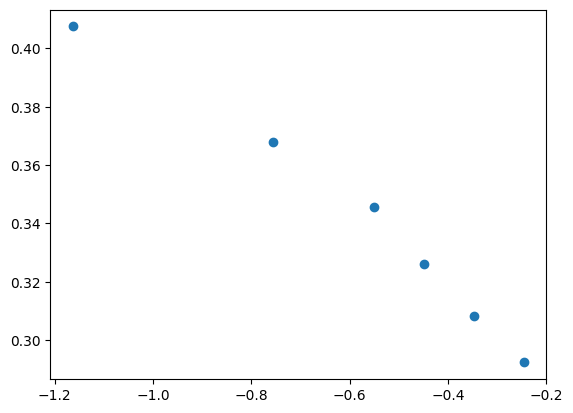

In [46]:
plt.scatter(Train[Train.gene == 'CCMM_SYNE7_-10s+10t']["temp"], Train[Train.gene == 'CCMM_SYNE7_-10s+10t']["dense_conc"])

In [47]:
params = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'), 
          'C' : [1,5,10, 50, 100, 500, 1000],
          'degree' : [3, 5, 10],
          'coef0' : [0.01, 1, 10, 0.5],
          'epsilon': [0.1, 0.01, 0.001],
          'gamma' : ('auto','scale')}

In [48]:
srv_grid = SVR(max_iter=10000)

In [49]:
grid_search = GridSearchCV(estimator = srv_grid, param_grid = params, 
                      cv = 3, n_jobs = 1, verbose = 100)

In [50]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 2016 candidates, totalling 6048 fits
[CV 1/3; 1/2016] START C=1, coef0=0.01, degree=3, epsilon=0.1, gamma=auto, kernel=linear
[CV 1/3; 1/2016] END C=1, coef0=0.01, degree=3, epsilon=0.1, gamma=auto, kernel=linear;, score=-1.197 total time=   0.0s
[CV 2/3; 1/2016] START C=1, coef0=0.01, degree=3, epsilon=0.1, gamma=auto, kernel=linear
[CV 2/3; 1/2016] END C=1, coef0=0.01, degree=3, epsilon=0.1, gamma=auto, kernel=linear;, score=-4.853 total time=   0.0s
[CV 3/3; 1/2016] START C=1, coef0=0.01, degree=3, epsilon=0.1, gamma=auto, kernel=linear
[CV 3/3; 1/2016] END C=1, coef0=0.01, degree=3, epsilon=0.1, gamma=auto, kernel=linear;, score=-1.332 total time=   0.0s
[CV 1/3; 2/2016] START C=1, coef0=0.01, degree=3, epsilon=0.1, gamma=auto, kernel=poly
[CV 1/3; 2/2016] END C=1, coef0=0.01, degree=3, epsilon=0.1, gamma=auto, kernel=poly;, score=-0.086 total time=   0.0s
[CV 2/3; 2/2016] START C=1, coef0=0.01, degree=3, epsilon=0.1, gamma=auto, kernel=poly
[CV 2/3; 2/2

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 1/3; 62/2016] END C=1, coef0=0.01, degree=10, epsilon=0.01, gamma=scale, kernel=poly;, score=-2.413 total time=   0.0s
[CV 2/3; 62/2016] START C=1, coef0=0.01, degree=10, epsilon=0.01, gamma=scale, kernel=poly
[CV 2/3; 62/2016] END C=1, coef0=0.01, degree=10, epsilon=0.01, gamma=scale, kernel=poly;, score=-1.528 total time=   0.0s
[CV 3/3; 62/2016] START C=1, coef0=0.01, degree=10, epsilon=0.01, gamma=scale, kernel=poly
[CV 3/3; 62/2016] END C=1, coef0=0.01, degree=10, epsilon=0.01, gamma=scale, kernel=poly;, score=-1.720 total time=   0.0s
[CV 1/3; 63/2016] START C=1, coef0=0.01, degree=10, epsilon=0.01, gamma=scale, kernel=rbf
[CV 1/3; 63/2016] END C=1, coef0=0.01, degree=10, epsilon=0.01, gamma=scale, kernel=rbf;, score=-1.223 total time=   0.0s
[CV 2/3; 63/2016] START C=1, coef0=0.01, degree=10, epsilon=0.01, gamma=scale, kernel=rbf
[CV 2/3; 63/2016] END C=1, coef0=0.01, degree=10, epsilon=0.01, gamma=scale, kernel=rbf;, score=-0.107 total time=   0.0s
[CV 3/3; 63/2016] START C

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/3; 121/2016] END C=1, coef0=1, degree=10, epsilon=0.1, gamma=auto, kernel=linear;, score=-4.853 total time=   0.0s
[CV 3/3; 121/2016] START C=1, coef0=1, degree=10, epsilon=0.1, gamma=auto, kernel=linear
[CV 3/3; 121/2016] END C=1, coef0=1, degree=10, epsilon=0.1, gamma=auto, kernel=linear;, score=-1.332 total time=   0.0s
[CV 1/3; 122/2016] START C=1, coef0=1, degree=10, epsilon=0.1, gamma=auto, kernel=poly
[CV 1/3; 122/2016] END C=1, coef0=1, degree=10, epsilon=0.1, gamma=auto, kernel=poly;, score=-0.286 total time=   0.0s
[CV 2/3; 122/2016] START C=1, coef0=1, degree=10, epsilon=0.1, gamma=auto, kernel=poly
[CV 2/3; 122/2016] END C=1, coef0=1, degree=10, epsilon=0.1, gamma=auto, kernel=poly;, score=-0.921 total time=   0.0s
[CV 3/3; 122/2016] START C=1, coef0=1, degree=10, epsilon=0.1, gamma=auto, kernel=poly
[CV 3/3; 122/2016] END C=1, coef0=1, degree=10, epsilon=0.1, gamma=auto, kernel=poly;, score=-1.434 total time=   0.0s
[CV 1/3; 123/2016] START C=1, coef0=1, degree=10, e

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 1/3; 136/2016] END C=1, coef0=1, degree=10, epsilon=0.01, gamma=scale, kernel=sigmoid;, score=-410.525 total time=   0.0s
[CV 2/3; 136/2016] START C=1, coef0=1, degree=10, epsilon=0.01, gamma=scale, kernel=sigmoid
[CV 2/3; 136/2016] END C=1, coef0=1, degree=10, epsilon=0.01, gamma=scale, kernel=sigmoid;, score=-64.380 total time=   0.0s
[CV 3/3; 136/2016] START C=1, coef0=1, degree=10, epsilon=0.01, gamma=scale, kernel=sigmoid
[CV 3/3; 136/2016] END C=1, coef0=1, degree=10, epsilon=0.01, gamma=scale, kernel=sigmoid;, score=-122.159 total time=   0.0s
[CV 1/3; 137/2016] START C=1, coef0=1, degree=10, epsilon=0.001, gamma=auto, kernel=linear
[CV 1/3; 137/2016] END C=1, coef0=1, degree=10, epsilon=0.001, gamma=auto, kernel=linear;, score=0.109 total time=   0.0s
[CV 2/3; 137/2016] START C=1, coef0=1, degree=10, epsilon=0.001, gamma=auto, kernel=linear
[CV 2/3; 137/2016] END C=1, coef0=1, degree=10, epsilon=0.001, gamma=auto, kernel=linear;, score=0.068 total time=   0.0s
[CV 3/3; 137/

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 1/3; 150/2016] END C=1, coef0=10, degree=3, epsilon=0.1, gamma=scale, kernel=poly;, score=-0.217 total time=   0.0s
[CV 2/3; 150/2016] START C=1, coef0=10, degree=3, epsilon=0.1, gamma=scale, kernel=poly
[CV 2/3; 150/2016] END C=1, coef0=10, degree=3, epsilon=0.1, gamma=scale, kernel=poly;, score=-3.607 total time=   0.0s
[CV 3/3; 150/2016] START C=1, coef0=10, degree=3, epsilon=0.1, gamma=scale, kernel=poly
[CV 3/3; 150/2016] END C=1, coef0=10, degree=3, epsilon=0.1, gamma=scale, kernel=poly;, score=-1.345 total time=   0.0s
[CV 1/3; 151/2016] START C=1, coef0=10, degree=3, epsilon=0.1, gamma=scale, kernel=rbf
[CV 1/3; 151/2016] END C=1, coef0=10, degree=3, epsilon=0.1, gamma=scale, kernel=rbf;, score=-2.858 total time=   0.0s
[CV 2/3; 151/2016] START C=1, coef0=10, degree=3, epsilon=0.1, gamma=scale, kernel=rbf
[CV 2/3; 151/2016] END C=1, coef0=10, degree=3, epsilon=0.1, gamma=scale, kernel=rbf;, score=-2.273 total time=   0.0s
[CV 3/3; 151/2016] START C=1, coef0=10, degree=3, ep

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 3/3; 164/2016] END C=1, coef0=10, degree=3, epsilon=0.001, gamma=auto, kernel=sigmoid;, score=-1.359 total time=   0.0s
[CV 1/3; 165/2016] START C=1, coef0=10, degree=3, epsilon=0.001, gamma=scale, kernel=linear
[CV 1/3; 165/2016] END C=1, coef0=10, degree=3, epsilon=0.001, gamma=scale, kernel=linear;, score=0.109 total time=   0.0s
[CV 2/3; 165/2016] START C=1, coef0=10, degree=3, epsilon=0.001, gamma=scale, kernel=linear
[CV 2/3; 165/2016] END C=1, coef0=10, degree=3, epsilon=0.001, gamma=scale, kernel=linear;, score=0.068 total time=   0.0s
[CV 3/3; 165/2016] START C=1, coef0=10, degree=3, epsilon=0.001, gamma=scale, kernel=linear
[CV 3/3; 165/2016] END C=1, coef0=10, degree=3, epsilon=0.001, gamma=scale, kernel=linear;, score=-0.157 total time=   0.0s
[CV 1/3; 166/2016] START C=1, coef0=10, degree=3, epsilon=0.001, gamma=scale, kernel=poly
[CV 1/3; 166/2016] END C=1, coef0=10, degree=3, epsilon=0.001, gamma=scale, kernel=poly;, score=-2.203 total time=   0.0s
[CV 2/3; 166/2016]

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 1/3; 189/2016] END C=1, coef0=10, degree=5, epsilon=0.001, gamma=scale, kernel=linear;, score=0.109 total time=   0.0s
[CV 2/3; 189/2016] START C=1, coef0=10, degree=5, epsilon=0.001, gamma=scale, kernel=linear
[CV 2/3; 189/2016] END C=1, coef0=10, degree=5, epsilon=0.001, gamma=scale, kernel=linear;, score=0.068 total time=   0.0s
[CV 3/3; 189/2016] START C=1, coef0=10, degree=5, epsilon=0.001, gamma=scale, kernel=linear
[CV 3/3; 189/2016] END C=1, coef0=10, degree=5, epsilon=0.001, gamma=scale, kernel=linear;, score=-0.157 total time=   0.0s
[CV 1/3; 190/2016] START C=1, coef0=10, degree=5, epsilon=0.001, gamma=scale, kernel=poly
[CV 1/3; 190/2016] END C=1, coef0=10, degree=5, epsilon=0.001, gamma=scale, kernel=poly;, score=-56.021 total time=   0.0s
[CV 2/3; 190/2016] START C=1, coef0=10, degree=5, epsilon=0.001, gamma=scale, kernel=poly
[CV 2/3; 190/2016] END C=1, coef0=10, degree=5, epsilon=0.001, gamma=scale, kernel=poly;, score=-0.155 total time=   0.0s
[CV 3/3; 190/2016] ST

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 2/3; 202/2016] END C=1, coef0=10, degree=10, epsilon=0.01, gamma=auto, kernel=poly;, score=-0.124 total time=   0.0s
[CV 3/3; 202/2016] START C=1, coef0=10, degree=10, epsilon=0.01, gamma=auto, kernel=poly
[CV 3/3; 202/2016] END C=1, coef0=10, degree=10, epsilon=0.01, gamma=auto, kernel=poly;, score=-80.464 total time=   0.0s
[CV 1/3; 203/2016] START C=1, coef0=10, degree=10, epsilon=0.01, gamma=auto, kernel=rbf
[CV 1/3; 203/2016] END C=1, coef0=10, degree=10, epsilon=0.01, gamma=auto, kernel=rbf;, score=-0.616 total time=   0.0s
[CV 2/3; 203/2016] START C=1, coef0=10, degree=10, epsilon=0.01, gamma=auto, kernel=rbf
[CV 2/3; 203/2016] END C=1, coef0=10, degree=10, epsilon=0.01, gamma=auto, kernel=rbf;, score=-0.109 total time=   0.0s
[CV 3/3; 203/2016] START C=1, coef0=10, degree=10, epsilon=0.01, gamma=auto, kernel=rbf
[CV 3/3; 203/2016] END C=1, coef0=10, degree=10, epsilon=0.01, gamma=auto, kernel=rbf;, score=-0.726 total time=   0.0s
[CV 1/3; 204/2016] START C=1, coef0=10, degr

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 2/3; 214/2016] END C=1, coef0=10, degree=10, epsilon=0.001, gamma=scale, kernel=poly;, score=-1.476 total time=   0.0s
[CV 3/3; 214/2016] START C=1, coef0=10, degree=10, epsilon=0.001, gamma=scale, kernel=poly
[CV 3/3; 214/2016] END C=1, coef0=10, degree=10, epsilon=0.001, gamma=scale, kernel=poly;, score=-9.709 total time=   0.0s
[CV 1/3; 215/2016] START C=1, coef0=10, degree=10, epsilon=0.001, gamma=scale, kernel=rbf
[CV 1/3; 215/2016] END C=1, coef0=10, degree=10, epsilon=0.001, gamma=scale, kernel=rbf;, score=-1.335 total time=   0.0s
[CV 2/3; 215/2016] START C=1, coef0=10, degree=10, epsilon=0.001, gamma=scale, kernel=rbf
[CV 2/3; 215/2016] END C=1, coef0=10, degree=10, epsilon=0.001, gamma=scale, kernel=rbf;, score=-0.027 total time=   0.0s
[CV 3/3; 215/2016] START C=1, coef0=10, degree=10, epsilon=0.001, gamma=scale, kernel=rbf
[CV 3/3; 215/2016] END C=1, coef0=10, degree=10, epsilon=0.001, gamma=scale, kernel=rbf;, score=-0.599 total time=   0.0s
[CV 1/3; 216/2016] START C=

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 1/3; 276/2016] END C=1, coef0=0.5, degree=10, epsilon=0.01, gamma=auto, kernel=sigmoid;, score=-214.141 total time=   0.0s
[CV 2/3; 276/2016] START C=1, coef0=0.5, degree=10, epsilon=0.01, gamma=auto, kernel=sigmoid
[CV 2/3; 276/2016] END C=1, coef0=0.5, degree=10, epsilon=0.01, gamma=auto, kernel=sigmoid;, score=-86.332 total time=   0.0s
[CV 3/3; 276/2016] START C=1, coef0=0.5, degree=10, epsilon=0.01, gamma=auto, kernel=sigmoid
[CV 3/3; 276/2016] END C=1, coef0=0.5, degree=10, epsilon=0.01, gamma=auto, kernel=sigmoid;, score=-3.912 total time=   0.0s
[CV 1/3; 277/2016] START C=1, coef0=0.5, degree=10, epsilon=0.01, gamma=scale, kernel=linear
[CV 1/3; 277/2016] END C=1, coef0=0.5, degree=10, epsilon=0.01, gamma=scale, kernel=linear;, score=-1.318 total time=   0.0s
[CV 2/3; 277/2016] START C=1, coef0=0.5, degree=10, epsilon=0.01, gamma=scale, kernel=linear
[CV 2/3; 277/2016] END C=1, coef0=0.5, degree=10, epsilon=0.01, gamma=scale, kernel=linear;, score=0.048 total time=   0.0s
[

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/3; 286/2016] END C=1, coef0=0.5, degree=10, epsilon=0.001, gamma=scale, kernel=poly;, score=-7.084 total time=   0.0s
[CV 2/3; 286/2016] START C=1, coef0=0.5, degree=10, epsilon=0.001, gamma=scale, kernel=poly
[CV 2/3; 286/2016] END C=1, coef0=0.5, degree=10, epsilon=0.001, gamma=scale, kernel=poly;, score=-1.572 total time=   0.0s
[CV 3/3; 286/2016] START C=1, coef0=0.5, degree=10, epsilon=0.001, gamma=scale, kernel=poly
[CV 3/3; 286/2016] END C=1, coef0=0.5, degree=10, epsilon=0.001, gamma=scale, kernel=poly;, score=-1.443 total time=   0.0s
[CV 1/3; 287/2016] START C=1, coef0=0.5, degree=10, epsilon=0.001, gamma=scale, kernel=rbf
[CV 1/3; 287/2016] END C=1, coef0=0.5, degree=10, epsilon=0.001, gamma=scale, kernel=rbf;, score=-1.335 total time=   0.0s
[CV 2/3; 287/2016] START C=1, coef0=0.5, degree=10, epsilon=0.001, gamma=scale, kernel=rbf
[CV 2/3; 287/2016] END C=1, coef0=0.5, degree=10, epsilon=0.001, gamma=scale, kernel=rbf;, score=-0.027 total time=   0.0s
[CV 3/3; 287/201

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 1/3; 313/2016] END C=5, coef0=0.01, degree=5, epsilon=0.1, gamma=auto, kernel=linear;, score=-1.197 total time=   0.0s
[CV 2/3; 313/2016] START C=5, coef0=0.01, degree=5, epsilon=0.1, gamma=auto, kernel=linear
[CV 2/3; 313/2016] END C=5, coef0=0.01, degree=5, epsilon=0.1, gamma=auto, kernel=linear;, score=-4.853 total time=   0.0s
[CV 3/3; 313/2016] START C=5, coef0=0.01, degree=5, epsilon=0.1, gamma=auto, kernel=linear
[CV 3/3; 313/2016] END C=5, coef0=0.01, degree=5, epsilon=0.1, gamma=auto, kernel=linear;, score=-1.332 total time=   0.0s
[CV 1/3; 314/2016] START C=5, coef0=0.01, degree=5, epsilon=0.1, gamma=auto, kernel=poly
[CV 1/3; 314/2016] END C=5, coef0=0.01, degree=5, epsilon=0.1, gamma=auto, kernel=poly;, score=-0.392 total time=   0.0s
[CV 2/3; 314/2016] START C=5, coef0=0.01, degree=5, epsilon=0.1, gamma=auto, kernel=poly
[CV 2/3; 314/2016] END C=5, coef0=0.01, degree=5, epsilon=0.1, gamma=auto, kernel=poly;, score=-0.853 total time=   0.0s
[CV 3/3; 314/2016] START C=5,

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 2/3; 328/2016] END C=5, coef0=0.01, degree=5, epsilon=0.01, gamma=scale, kernel=sigmoid;, score=-1102.970 total time=   0.0s
[CV 3/3; 328/2016] START C=5, coef0=0.01, degree=5, epsilon=0.01, gamma=scale, kernel=sigmoid
[CV 3/3; 328/2016] END C=5, coef0=0.01, degree=5, epsilon=0.01, gamma=scale, kernel=sigmoid;, score=-42.315 total time=   0.0s
[CV 1/3; 329/2016] START C=5, coef0=0.01, degree=5, epsilon=0.001, gamma=auto, kernel=linear
[CV 1/3; 329/2016] END C=5, coef0=0.01, degree=5, epsilon=0.001, gamma=auto, kernel=linear;, score=0.139 total time=   0.0s
[CV 2/3; 329/2016] START C=5, coef0=0.01, degree=5, epsilon=0.001, gamma=auto, kernel=linear
[CV 2/3; 329/2016] END C=5, coef0=0.01, degree=5, epsilon=0.001, gamma=auto, kernel=linear;, score=0.091 total time=   0.0s
[CV 3/3; 329/2016] START C=5, coef0=0.01, degree=5, epsilon=0.001, gamma=auto, kernel=linear
[CV 3/3; 329/2016] END C=5, coef0=0.01, degree=5, epsilon=0.001, gamma=auto, kernel=linear;, score=-0.119 total time=   0.0

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 3/3; 354/2016] END C=5, coef0=0.01, degree=10, epsilon=0.001, gamma=auto, kernel=poly;, score=-1.564 total time=   0.0s
[CV 1/3; 355/2016] START C=5, coef0=0.01, degree=10, epsilon=0.001, gamma=auto, kernel=rbf
[CV 1/3; 355/2016] END C=5, coef0=0.01, degree=10, epsilon=0.001, gamma=auto, kernel=rbf;, score=-0.430 total time=   0.0s
[CV 2/3; 355/2016] START C=5, coef0=0.01, degree=10, epsilon=0.001, gamma=auto, kernel=rbf
[CV 2/3; 355/2016] END C=5, coef0=0.01, degree=10, epsilon=0.001, gamma=auto, kernel=rbf;, score=-0.058 total time=   0.0s
[CV 3/3; 355/2016] START C=5, coef0=0.01, degree=10, epsilon=0.001, gamma=auto, kernel=rbf
[CV 3/3; 355/2016] END C=5, coef0=0.01, degree=10, epsilon=0.001, gamma=auto, kernel=rbf;, score=-0.414 total time=   0.0s
[CV 1/3; 356/2016] START C=5, coef0=0.01, degree=10, epsilon=0.001, gamma=auto, kernel=sigmoid
[CV 1/3; 356/2016] END C=5, coef0=0.01, degree=10, epsilon=0.001, gamma=auto, kernel=sigmoid;, score=-2770.291 total time=   0.0s
[CV 2/3; 

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/3; 369/2016] END C=5, coef0=1, degree=3, epsilon=0.01, gamma=auto, kernel=linear;, score=-0.464 total time=   0.0s
[CV 1/3; 370/2016] START C=5, coef0=1, degree=3, epsilon=0.01, gamma=auto, kernel=poly
[CV 1/3; 370/2016] END C=5, coef0=1, degree=3, epsilon=0.01, gamma=auto, kernel=poly;, score=-0.188 total time=   0.0s
[CV 2/3; 370/2016] START C=5, coef0=1, degree=3, epsilon=0.01, gamma=auto, kernel=poly
[CV 2/3; 370/2016] END C=5, coef0=1, degree=3, epsilon=0.01, gamma=auto, kernel=poly;, score=-0.073 total time=   0.0s
[CV 3/3; 370/2016] START C=5, coef0=1, degree=3, epsilon=0.01, gamma=auto, kernel=poly
[CV 3/3; 370/2016] END C=5, coef0=1, degree=3, epsilon=0.01, gamma=auto, kernel=poly;, score=-3.347 total time=   0.0s
[CV 1/3; 371/2016] START C=5, coef0=1, degree=3, epsilon=0.01, gamma=auto, kernel=rbf
[CV 1/3; 371/2016] END C=5, coef0=1, degree=3, epsilon=0.01, gamma=auto, kernel=rbf;, score=-0.479 total time=   0.0s
[CV 2/3; 371/2016] START C=5, coef0=1, degree=3, epsilon=

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 1/3; 383/2016] END C=5, coef0=1, degree=3, epsilon=0.001, gamma=scale, kernel=rbf;, score=-1.118 total time=   0.0s
[CV 2/3; 383/2016] START C=5, coef0=1, degree=3, epsilon=0.001, gamma=scale, kernel=rbf
[CV 2/3; 383/2016] END C=5, coef0=1, degree=3, epsilon=0.001, gamma=scale, kernel=rbf;, score=-0.057 total time=   0.0s
[CV 3/3; 383/2016] START C=5, coef0=1, degree=3, epsilon=0.001, gamma=scale, kernel=rbf
[CV 3/3; 383/2016] END C=5, coef0=1, degree=3, epsilon=0.001, gamma=scale, kernel=rbf;, score=-0.791 total time=   0.0s
[CV 1/3; 384/2016] START C=5, coef0=1, degree=3, epsilon=0.001, gamma=scale, kernel=sigmoid
[CV 1/3; 384/2016] END C=5, coef0=1, degree=3, epsilon=0.001, gamma=scale, kernel=sigmoid;, score=-10690.612 total time=   0.0s
[CV 2/3; 384/2016] START C=5, coef0=1, degree=3, epsilon=0.001, gamma=scale, kernel=sigmoid
[CV 2/3; 384/2016] END C=5, coef0=1, degree=3, epsilon=0.001, gamma=scale, kernel=sigmoid;, score=-1523.136 total time=   0.0s
[CV 3/3; 384/2016] START 

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 2/3; 398/2016] END C=5, coef0=1, degree=5, epsilon=0.01, gamma=scale, kernel=poly;, score=0.023 total time=   0.0s
[CV 3/3; 398/2016] START C=5, coef0=1, degree=5, epsilon=0.01, gamma=scale, kernel=poly
[CV 3/3; 398/2016] END C=5, coef0=1, degree=5, epsilon=0.01, gamma=scale, kernel=poly;, score=-2.070 total time=   0.0s
[CV 1/3; 399/2016] START C=5, coef0=1, degree=5, epsilon=0.01, gamma=scale, kernel=rbf
[CV 1/3; 399/2016] END C=5, coef0=1, degree=5, epsilon=0.01, gamma=scale, kernel=rbf;, score=-0.912 total time=   0.0s
[CV 2/3; 399/2016] START C=5, coef0=1, degree=5, epsilon=0.01, gamma=scale, kernel=rbf
[CV 2/3; 399/2016] END C=5, coef0=1, degree=5, epsilon=0.01, gamma=scale, kernel=rbf;, score=-0.111 total time=   0.0s
[CV 3/3; 399/2016] START C=5, coef0=1, degree=5, epsilon=0.01, gamma=scale, kernel=rbf
[CV 3/3; 399/2016] END C=5, coef0=1, degree=5, epsilon=0.01, gamma=scale, kernel=rbf;, score=-0.411 total time=   0.0s
[CV 1/3; 400/2016] START C=5, coef0=1, degree=5, epsilo

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 1/3; 411/2016] END C=5, coef0=1, degree=10, epsilon=0.1, gamma=auto, kernel=rbf;, score=-2.291 total time=   0.0s
[CV 2/3; 411/2016] START C=5, coef0=1, degree=10, epsilon=0.1, gamma=auto, kernel=rbf
[CV 2/3; 411/2016] END C=5, coef0=1, degree=10, epsilon=0.1, gamma=auto, kernel=rbf;, score=-2.269 total time=   0.0s
[CV 3/3; 411/2016] START C=5, coef0=1, degree=10, epsilon=0.1, gamma=auto, kernel=rbf
[CV 3/3; 411/2016] END C=5, coef0=1, degree=10, epsilon=0.1, gamma=auto, kernel=rbf;, score=-1.095 total time=   0.0s
[CV 1/3; 412/2016] START C=5, coef0=1, degree=10, epsilon=0.1, gamma=auto, kernel=sigmoid
[CV 1/3; 412/2016] END C=5, coef0=1, degree=10, epsilon=0.1, gamma=auto, kernel=sigmoid;, score=-2656.411 total time=   0.0s
[CV 2/3; 412/2016] START C=5, coef0=1, degree=10, epsilon=0.1, gamma=auto, kernel=sigmoid
[CV 2/3; 412/2016] END C=5, coef0=1, degree=10, epsilon=0.1, gamma=auto, kernel=sigmoid;, score=-1549.469 total time=   0.0s
[CV 3/3; 412/2016] START C=5, coef0=1, degre

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 1/3; 425/2016] END C=5, coef0=1, degree=10, epsilon=0.001, gamma=auto, kernel=linear;, score=0.139 total time=   0.0s
[CV 2/3; 425/2016] START C=5, coef0=1, degree=10, epsilon=0.001, gamma=auto, kernel=linear
[CV 2/3; 425/2016] END C=5, coef0=1, degree=10, epsilon=0.001, gamma=auto, kernel=linear;, score=0.091 total time=   0.0s
[CV 3/3; 425/2016] START C=5, coef0=1, degree=10, epsilon=0.001, gamma=auto, kernel=linear
[CV 3/3; 425/2016] END C=5, coef0=1, degree=10, epsilon=0.001, gamma=auto, kernel=linear;, score=-0.119 total time=   0.0s
[CV 1/3; 426/2016] START C=5, coef0=1, degree=10, epsilon=0.001, gamma=auto, kernel=poly
[CV 1/3; 426/2016] END C=5, coef0=1, degree=10, epsilon=0.001, gamma=auto, kernel=poly;, score=-0.958 total time=   0.0s
[CV 2/3; 426/2016] START C=5, coef0=1, degree=10, epsilon=0.001, gamma=auto, kernel=poly
[CV 2/3; 426/2016] END C=5, coef0=1, degree=10, epsilon=0.001, gamma=auto, kernel=poly;, score=-1.234 total time=   0.0s
[CV 3/3; 426/2016] START C=5, c

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 1/3; 434/2016] END C=5, coef0=10, degree=3, epsilon=0.1, gamma=auto, kernel=poly;, score=-0.417 total time=   0.0s
[CV 2/3; 434/2016] START C=5, coef0=10, degree=3, epsilon=0.1, gamma=auto, kernel=poly
[CV 2/3; 434/2016] END C=5, coef0=10, degree=3, epsilon=0.1, gamma=auto, kernel=poly;, score=-3.591 total time=   0.0s
[CV 3/3; 434/2016] START C=5, coef0=10, degree=3, epsilon=0.1, gamma=auto, kernel=poly
[CV 3/3; 434/2016] END C=5, coef0=10, degree=3, epsilon=0.1, gamma=auto, kernel=poly;, score=-1.340 total time=   0.0s
[CV 1/3; 435/2016] START C=5, coef0=10, degree=3, epsilon=0.1, gamma=auto, kernel=rbf
[CV 1/3; 435/2016] END C=5, coef0=10, degree=3, epsilon=0.1, gamma=auto, kernel=rbf;, score=-2.291 total time=   0.0s
[CV 2/3; 435/2016] START C=5, coef0=10, degree=3, epsilon=0.1, gamma=auto, kernel=rbf
[CV 2/3; 435/2016] END C=5, coef0=10, degree=3, epsilon=0.1, gamma=auto, kernel=rbf;, score=-2.269 total time=   0.0s
[CV 3/3; 435/2016] START C=5, coef0=10, degree=3, epsilon=0.1

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 1/3; 448/2016] END C=5, coef0=10, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid;, score=-0.064 total time=   0.0s
[CV 2/3; 448/2016] START C=5, coef0=10, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid
[CV 2/3; 448/2016] END C=5, coef0=10, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid;, score=-3.418 total time=   0.0s
[CV 3/3; 448/2016] START C=5, coef0=10, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid
[CV 3/3; 448/2016] END C=5, coef0=10, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid;, score=-1.335 total time=   0.0s
[CV 1/3; 449/2016] START C=5, coef0=10, degree=3, epsilon=0.001, gamma=auto, kernel=linear
[CV 1/3; 449/2016] END C=5, coef0=10, degree=3, epsilon=0.001, gamma=auto, kernel=linear;, score=0.139 total time=   0.0s
[CV 2/3; 449/2016] START C=5, coef0=10, degree=3, epsilon=0.001, gamma=auto, kernel=linear
[CV 2/3; 449/2016] END C=5, coef0=10, degree=3, epsilon=0.001, gamma=auto, kernel=linear;, score=0.091 total time=   0.0s
[CV 3/3; 449/2016]

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 3/3; 471/2016] END C=5, coef0=10, degree=5, epsilon=0.01, gamma=scale, kernel=rbf;, score=-0.411 total time=   0.0s
[CV 1/3; 472/2016] START C=5, coef0=10, degree=5, epsilon=0.01, gamma=scale, kernel=sigmoid
[CV 1/3; 472/2016] END C=5, coef0=10, degree=5, epsilon=0.01, gamma=scale, kernel=sigmoid;, score=-0.064 total time=   0.0s
[CV 2/3; 472/2016] START C=5, coef0=10, degree=5, epsilon=0.01, gamma=scale, kernel=sigmoid
[CV 2/3; 472/2016] END C=5, coef0=10, degree=5, epsilon=0.01, gamma=scale, kernel=sigmoid;, score=-3.418 total time=   0.0s
[CV 3/3; 472/2016] START C=5, coef0=10, degree=5, epsilon=0.01, gamma=scale, kernel=sigmoid
[CV 3/3; 472/2016] END C=5, coef0=10, degree=5, epsilon=0.01, gamma=scale, kernel=sigmoid;, score=-1.335 total time=   0.0s
[CV 1/3; 473/2016] START C=5, coef0=10, degree=5, epsilon=0.001, gamma=auto, kernel=linear
[CV 1/3; 473/2016] END C=5, coef0=10, degree=5, epsilon=0.001, gamma=auto, kernel=linear;, score=0.139 total time=   0.0s
[CV 2/3; 473/2016] 

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 1/3; 483/2016] END C=5, coef0=10, degree=10, epsilon=0.1, gamma=auto, kernel=rbf;, score=-2.291 total time=   0.0s
[CV 2/3; 483/2016] START C=5, coef0=10, degree=10, epsilon=0.1, gamma=auto, kernel=rbf
[CV 2/3; 483/2016] END C=5, coef0=10, degree=10, epsilon=0.1, gamma=auto, kernel=rbf;, score=-2.269 total time=   0.0s
[CV 3/3; 483/2016] START C=5, coef0=10, degree=10, epsilon=0.1, gamma=auto, kernel=rbf
[CV 3/3; 483/2016] END C=5, coef0=10, degree=10, epsilon=0.1, gamma=auto, kernel=rbf;, score=-1.095 total time=   0.0s
[CV 1/3; 484/2016] START C=5, coef0=10, degree=10, epsilon=0.1, gamma=auto, kernel=sigmoid
[CV 1/3; 484/2016] END C=5, coef0=10, degree=10, epsilon=0.1, gamma=auto, kernel=sigmoid;, score=-0.381 total time=   0.0s
[CV 2/3; 484/2016] START C=5, coef0=10, degree=10, epsilon=0.1, gamma=auto, kernel=sigmoid
[CV 2/3; 484/2016] END C=5, coef0=10, degree=10, epsilon=0.1, gamma=auto, kernel=sigmoid;, score=-8.034 total time=   0.0s
[CV 3/3; 484/2016] START C=5, coef0=10, d

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 2/3; 495/2016] END C=5, coef0=10, degree=10, epsilon=0.01, gamma=scale, kernel=rbf;, score=-0.111 total time=   0.0s
[CV 3/3; 495/2016] START C=5, coef0=10, degree=10, epsilon=0.01, gamma=scale, kernel=rbf
[CV 3/3; 495/2016] END C=5, coef0=10, degree=10, epsilon=0.01, gamma=scale, kernel=rbf;, score=-0.411 total time=   0.0s
[CV 1/3; 496/2016] START C=5, coef0=10, degree=10, epsilon=0.01, gamma=scale, kernel=sigmoid
[CV 1/3; 496/2016] END C=5, coef0=10, degree=10, epsilon=0.01, gamma=scale, kernel=sigmoid;, score=-0.064 total time=   0.0s
[CV 2/3; 496/2016] START C=5, coef0=10, degree=10, epsilon=0.01, gamma=scale, kernel=sigmoid
[CV 2/3; 496/2016] END C=5, coef0=10, degree=10, epsilon=0.01, gamma=scale, kernel=sigmoid;, score=-3.418 total time=   0.0s
[CV 3/3; 496/2016] START C=5, coef0=10, degree=10, epsilon=0.01, gamma=scale, kernel=sigmoid
[CV 3/3; 496/2016] END C=5, coef0=10, degree=10, epsilon=0.01, gamma=scale, kernel=sigmoid;, score=-1.335 total time=   0.0s
[CV 1/3; 497/20

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 1/3; 522/2016] END C=5, coef0=0.5, degree=3, epsilon=0.001, gamma=auto, kernel=poly;, score=-0.609 total time=   0.0s
[CV 2/3; 522/2016] START C=5, coef0=0.5, degree=3, epsilon=0.001, gamma=auto, kernel=poly
[CV 2/3; 522/2016] END C=5, coef0=0.5, degree=3, epsilon=0.001, gamma=auto, kernel=poly;, score=-0.113 total time=   0.0s
[CV 3/3; 522/2016] START C=5, coef0=0.5, degree=3, epsilon=0.001, gamma=auto, kernel=poly
[CV 3/3; 522/2016] END C=5, coef0=0.5, degree=3, epsilon=0.001, gamma=auto, kernel=poly;, score=-2.084 total time=   0.0s
[CV 1/3; 523/2016] START C=5, coef0=0.5, degree=3, epsilon=0.001, gamma=auto, kernel=rbf
[CV 1/3; 523/2016] END C=5, coef0=0.5, degree=3, epsilon=0.001, gamma=auto, kernel=rbf;, score=-0.430 total time=   0.0s
[CV 2/3; 523/2016] START C=5, coef0=0.5, degree=3, epsilon=0.001, gamma=auto, kernel=rbf
[CV 2/3; 523/2016] END C=5, coef0=0.5, degree=3, epsilon=0.001, gamma=auto, kernel=rbf;, score=-0.058 total time=   0.0s
[CV 3/3; 523/2016] START C=5, coef

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 1/3; 537/2016] END C=5, coef0=0.5, degree=5, epsilon=0.01, gamma=auto, kernel=linear;, score=-1.251 total time=   0.0s
[CV 2/3; 537/2016] START C=5, coef0=0.5, degree=5, epsilon=0.01, gamma=auto, kernel=linear
[CV 2/3; 537/2016] END C=5, coef0=0.5, degree=5, epsilon=0.01, gamma=auto, kernel=linear;, score=0.039 total time=   0.0s
[CV 3/3; 537/2016] START C=5, coef0=0.5, degree=5, epsilon=0.01, gamma=auto, kernel=linear
[CV 3/3; 537/2016] END C=5, coef0=0.5, degree=5, epsilon=0.01, gamma=auto, kernel=linear;, score=-0.464 total time=   0.0s
[CV 1/3; 538/2016] START C=5, coef0=0.5, degree=5, epsilon=0.01, gamma=auto, kernel=poly
[CV 1/3; 538/2016] END C=5, coef0=0.5, degree=5, epsilon=0.01, gamma=auto, kernel=poly;, score=-0.412 total time=   0.0s
[CV 2/3; 538/2016] START C=5, coef0=0.5, degree=5, epsilon=0.01, gamma=auto, kernel=poly
[CV 2/3; 538/2016] END C=5, coef0=0.5, degree=5, epsilon=0.01, gamma=auto, kernel=poly;, score=0.115 total time=   0.0s
[CV 3/3; 538/2016] START C=5, c

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 3/3; 566/2016] END C=5, coef0=0.5, degree=10, epsilon=0.01, gamma=scale, kernel=poly;, score=-1.552 total time=   0.0s
[CV 1/3; 567/2016] START C=5, coef0=0.5, degree=10, epsilon=0.01, gamma=scale, kernel=rbf
[CV 1/3; 567/2016] END C=5, coef0=0.5, degree=10, epsilon=0.01, gamma=scale, kernel=rbf;, score=-0.912 total time=   0.0s
[CV 2/3; 567/2016] START C=5, coef0=0.5, degree=10, epsilon=0.01, gamma=scale, kernel=rbf
[CV 2/3; 567/2016] END C=5, coef0=0.5, degree=10, epsilon=0.01, gamma=scale, kernel=rbf;, score=-0.111 total time=   0.0s
[CV 3/3; 567/2016] START C=5, coef0=0.5, degree=10, epsilon=0.01, gamma=scale, kernel=rbf
[CV 3/3; 567/2016] END C=5, coef0=0.5, degree=10, epsilon=0.01, gamma=scale, kernel=rbf;, score=-0.411 total time=   0.0s
[CV 1/3; 568/2016] START C=5, coef0=0.5, degree=10, epsilon=0.01, gamma=scale, kernel=sigmoid
[CV 1/3; 568/2016] END C=5, coef0=0.5, degree=10, epsilon=0.01, gamma=scale, kernel=sigmoid;, score=-20459.341 total time=   0.0s
[CV 2/3; 568/2016

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 2/3; 578/2016] END C=10, coef0=0.01, degree=3, epsilon=0.1, gamma=auto, kernel=poly;, score=-1.031 total time=   0.0s
[CV 3/3; 578/2016] START C=10, coef0=0.01, degree=3, epsilon=0.1, gamma=auto, kernel=poly
[CV 3/3; 578/2016] END C=10, coef0=0.01, degree=3, epsilon=0.1, gamma=auto, kernel=poly;, score=-1.439 total time=   0.0s
[CV 1/3; 579/2016] START C=10, coef0=0.01, degree=3, epsilon=0.1, gamma=auto, kernel=rbf
[CV 1/3; 579/2016] END C=10, coef0=0.01, degree=3, epsilon=0.1, gamma=auto, kernel=rbf;, score=-2.291 total time=   0.0s
[CV 2/3; 579/2016] START C=10, coef0=0.01, degree=3, epsilon=0.1, gamma=auto, kernel=rbf
[CV 2/3; 579/2016] END C=10, coef0=0.01, degree=3, epsilon=0.1, gamma=auto, kernel=rbf;, score=-2.269 total time=   0.0s
[CV 3/3; 579/2016] START C=10, coef0=0.01, degree=3, epsilon=0.1, gamma=auto, kernel=rbf
[CV 3/3; 579/2016] END C=10, coef0=0.01, degree=3, epsilon=0.1, gamma=auto, kernel=rbf;, score=-1.095 total time=   0.0s
[CV 1/3; 580/2016] START C=10, coef0

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 2/3; 593/2016] END C=10, coef0=0.01, degree=3, epsilon=0.001, gamma=auto, kernel=linear;, score=-0.730 total time=   0.0s
[CV 3/3; 593/2016] START C=10, coef0=0.01, degree=3, epsilon=0.001, gamma=auto, kernel=linear
[CV 3/3; 593/2016] END C=10, coef0=0.01, degree=3, epsilon=0.001, gamma=auto, kernel=linear;, score=-0.124 total time=   0.0s
[CV 1/3; 594/2016] START C=10, coef0=0.01, degree=3, epsilon=0.001, gamma=auto, kernel=poly
[CV 1/3; 594/2016] END C=10, coef0=0.01, degree=3, epsilon=0.001, gamma=auto, kernel=poly;, score=-2.164 total time=   0.0s
[CV 2/3; 594/2016] START C=10, coef0=0.01, degree=3, epsilon=0.001, gamma=auto, kernel=poly
[CV 2/3; 594/2016] END C=10, coef0=0.01, degree=3, epsilon=0.001, gamma=auto, kernel=poly;, score=0.137 total time=   0.0s
[CV 3/3; 594/2016] START C=10, coef0=0.01, degree=3, epsilon=0.001, gamma=auto, kernel=poly
[CV 3/3; 594/2016] END C=10, coef0=0.01, degree=3, epsilon=0.001, gamma=auto, kernel=poly;, score=-2.960 total time=   0.0s
[CV 1/3

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 2/3; 621/2016] END C=10, coef0=0.01, degree=5, epsilon=0.001, gamma=scale, kernel=linear;, score=-0.730 total time=   0.0s
[CV 3/3; 621/2016] START C=10, coef0=0.01, degree=5, epsilon=0.001, gamma=scale, kernel=linear
[CV 3/3; 621/2016] END C=10, coef0=0.01, degree=5, epsilon=0.001, gamma=scale, kernel=linear;, score=-0.124 total time=   0.0s
[CV 1/3; 622/2016] START C=10, coef0=0.01, degree=5, epsilon=0.001, gamma=scale, kernel=poly
[CV 1/3; 622/2016] END C=10, coef0=0.01, degree=5, epsilon=0.001, gamma=scale, kernel=poly;, score=-68.909 total time=   0.0s
[CV 2/3; 622/2016] START C=10, coef0=0.01, degree=5, epsilon=0.001, gamma=scale, kernel=poly
[CV 2/3; 622/2016] END C=10, coef0=0.01, degree=5, epsilon=0.001, gamma=scale, kernel=poly;, score=-0.267 total time=   0.0s
[CV 3/3; 622/2016] START C=10, coef0=0.01, degree=5, epsilon=0.001, gamma=scale, kernel=poly
[CV 3/3; 622/2016] END C=10, coef0=0.01, degree=5, epsilon=0.001, gamma=scale, kernel=poly;, score=-5.604 total time=   0

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 3/3; 647/2016] END C=10, coef0=0.01, degree=10, epsilon=0.001, gamma=scale, kernel=rbf;, score=-0.733 total time=   0.0s
[CV 1/3; 648/2016] START C=10, coef0=0.01, degree=10, epsilon=0.001, gamma=scale, kernel=sigmoid
[CV 1/3; 648/2016] END C=10, coef0=0.01, degree=10, epsilon=0.001, gamma=scale, kernel=sigmoid;, score=-32460.508 total time=   0.0s
[CV 2/3; 648/2016] START C=10, coef0=0.01, degree=10, epsilon=0.001, gamma=scale, kernel=sigmoid
[CV 2/3; 648/2016] END C=10, coef0=0.01, degree=10, epsilon=0.001, gamma=scale, kernel=sigmoid;, score=-4626.744 total time=   0.0s
[CV 3/3; 648/2016] START C=10, coef0=0.01, degree=10, epsilon=0.001, gamma=scale, kernel=sigmoid
[CV 3/3; 648/2016] END C=10, coef0=0.01, degree=10, epsilon=0.001, gamma=scale, kernel=sigmoid;, score=-145.345 total time=   0.0s
[CV 1/3; 649/2016] START C=10, coef0=1, degree=3, epsilon=0.1, gamma=auto, kernel=linear
[CV 1/3; 649/2016] END C=10, coef0=1, degree=3, epsilon=0.1, gamma=auto, kernel=linear;, score=-1.1

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 3/3; 663/2016] END C=10, coef0=1, degree=3, epsilon=0.01, gamma=scale, kernel=rbf;, score=-0.258 total time=   0.0s
[CV 1/3; 664/2016] START C=10, coef0=1, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid
[CV 1/3; 664/2016] END C=10, coef0=1, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid;, score=-42544.623 total time=   0.0s
[CV 2/3; 664/2016] START C=10, coef0=1, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid
[CV 2/3; 664/2016] END C=10, coef0=1, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid;, score=-6053.112 total time=   0.0s
[CV 3/3; 664/2016] START C=10, coef0=1, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid
[CV 3/3; 664/2016] END C=10, coef0=1, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid;, score=-18200.172 total time=   0.0s
[CV 1/3; 665/2016] START C=10, coef0=1, degree=3, epsilon=0.001, gamma=auto, kernel=linear
[CV 1/3; 665/2016] END C=10, coef0=1, degree=3, epsilon=0.001, gamma=auto, kernel=linear;, score=0.483 total time=   0.0s
[CV 2/3;

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 2/3; 690/2016] END C=10, coef0=1, degree=5, epsilon=0.001, gamma=auto, kernel=poly;, score=-0.456 total time=   0.0s
[CV 3/3; 690/2016] START C=10, coef0=1, degree=5, epsilon=0.001, gamma=auto, kernel=poly
[CV 3/3; 690/2016] END C=10, coef0=1, degree=5, epsilon=0.001, gamma=auto, kernel=poly;, score=-4.155 total time=   0.0s
[CV 1/3; 691/2016] START C=10, coef0=1, degree=5, epsilon=0.001, gamma=auto, kernel=rbf
[CV 1/3; 691/2016] END C=10, coef0=1, degree=5, epsilon=0.001, gamma=auto, kernel=rbf;, score=0.065 total time=   0.0s
[CV 2/3; 691/2016] START C=10, coef0=1, degree=5, epsilon=0.001, gamma=auto, kernel=rbf
[CV 2/3; 691/2016] END C=10, coef0=1, degree=5, epsilon=0.001, gamma=auto, kernel=rbf;, score=-0.110 total time=   0.0s
[CV 3/3; 691/2016] START C=10, coef0=1, degree=5, epsilon=0.001, gamma=auto, kernel=rbf
[CV 3/3; 691/2016] END C=10, coef0=1, degree=5, epsilon=0.001, gamma=auto, kernel=rbf;, score=-0.484 total time=   0.0s
[CV 1/3; 692/2016] START C=10, coef0=1, degree

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 1/3; 705/2016] END C=10, coef0=1, degree=10, epsilon=0.01, gamma=auto, kernel=linear;, score=-1.204 total time=   0.0s
[CV 2/3; 705/2016] START C=10, coef0=1, degree=10, epsilon=0.01, gamma=auto, kernel=linear
[CV 2/3; 705/2016] END C=10, coef0=1, degree=10, epsilon=0.01, gamma=auto, kernel=linear;, score=-0.040 total time=   0.0s
[CV 3/3; 705/2016] START C=10, coef0=1, degree=10, epsilon=0.01, gamma=auto, kernel=linear
[CV 3/3; 705/2016] END C=10, coef0=1, degree=10, epsilon=0.01, gamma=auto, kernel=linear;, score=-0.461 total time=   0.0s
[CV 1/3; 706/2016] START C=10, coef0=1, degree=10, epsilon=0.01, gamma=auto, kernel=poly
[CV 1/3; 706/2016] END C=10, coef0=1, degree=10, epsilon=0.01, gamma=auto, kernel=poly;, score=-0.694 total time=   0.0s
[CV 2/3; 706/2016] START C=10, coef0=1, degree=10, epsilon=0.01, gamma=auto, kernel=poly
[CV 2/3; 706/2016] END C=10, coef0=1, degree=10, epsilon=0.01, gamma=auto, kernel=poly;, score=0.183 total time=   0.0s
[CV 3/3; 706/2016] START C=10,

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 2/3; 715/2016] END C=10, coef0=1, degree=10, epsilon=0.001, gamma=auto, kernel=rbf;, score=-0.110 total time=   0.0s
[CV 3/3; 715/2016] START C=10, coef0=1, degree=10, epsilon=0.001, gamma=auto, kernel=rbf
[CV 3/3; 715/2016] END C=10, coef0=1, degree=10, epsilon=0.001, gamma=auto, kernel=rbf;, score=-0.484 total time=   0.0s
[CV 1/3; 716/2016] START C=10, coef0=1, degree=10, epsilon=0.001, gamma=auto, kernel=sigmoid
[CV 1/3; 716/2016] END C=10, coef0=1, degree=10, epsilon=0.001, gamma=auto, kernel=sigmoid;, score=-10996.350 total time=   0.0s
[CV 2/3; 716/2016] START C=10, coef0=1, degree=10, epsilon=0.001, gamma=auto, kernel=sigmoid
[CV 2/3; 716/2016] END C=10, coef0=1, degree=10, epsilon=0.001, gamma=auto, kernel=sigmoid;, score=-6319.702 total time=   0.0s
[CV 3/3; 716/2016] START C=10, coef0=1, degree=10, epsilon=0.001, gamma=auto, kernel=sigmoid
[CV 3/3; 716/2016] END C=10, coef0=1, degree=10, epsilon=0.001, gamma=auto, kernel=sigmoid;, score=-3199.875 total time=   0.0s
[CV 1

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 1/3; 729/2016] END C=10, coef0=10, degree=3, epsilon=0.01, gamma=auto, kernel=linear;, score=-1.204 total time=   0.0s
[CV 2/3; 729/2016] START C=10, coef0=10, degree=3, epsilon=0.01, gamma=auto, kernel=linear
[CV 2/3; 729/2016] END C=10, coef0=10, degree=3, epsilon=0.01, gamma=auto, kernel=linear;, score=-0.040 total time=   0.0s
[CV 3/3; 729/2016] START C=10, coef0=10, degree=3, epsilon=0.01, gamma=auto, kernel=linear
[CV 3/3; 729/2016] END C=10, coef0=10, degree=3, epsilon=0.01, gamma=auto, kernel=linear;, score=-0.461 total time=   0.0s
[CV 1/3; 730/2016] START C=10, coef0=10, degree=3, epsilon=0.01, gamma=auto, kernel=poly
[CV 1/3; 730/2016] END C=10, coef0=10, degree=3, epsilon=0.01, gamma=auto, kernel=poly;, score=-1.160 total time=   0.0s
[CV 2/3; 730/2016] START C=10, coef0=10, degree=3, epsilon=0.01, gamma=auto, kernel=poly
[CV 2/3; 730/2016] END C=10, coef0=10, degree=3, epsilon=0.01, gamma=auto, kernel=poly;, score=0.098 total time=   0.0s
[CV 3/3; 730/2016] START C=10,

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 1/3; 739/2016] END C=10, coef0=10, degree=3, epsilon=0.001, gamma=auto, kernel=rbf;, score=0.065 total time=   0.0s
[CV 2/3; 739/2016] START C=10, coef0=10, degree=3, epsilon=0.001, gamma=auto, kernel=rbf
[CV 2/3; 739/2016] END C=10, coef0=10, degree=3, epsilon=0.001, gamma=auto, kernel=rbf;, score=-0.110 total time=   0.0s
[CV 3/3; 739/2016] START C=10, coef0=10, degree=3, epsilon=0.001, gamma=auto, kernel=rbf
[CV 3/3; 739/2016] END C=10, coef0=10, degree=3, epsilon=0.001, gamma=auto, kernel=rbf;, score=-0.484 total time=   0.0s
[CV 1/3; 740/2016] START C=10, coef0=10, degree=3, epsilon=0.001, gamma=auto, kernel=sigmoid
[CV 1/3; 740/2016] END C=10, coef0=10, degree=3, epsilon=0.001, gamma=auto, kernel=sigmoid;, score=-0.060 total time=   0.0s
[CV 2/3; 740/2016] START C=10, coef0=10, degree=3, epsilon=0.001, gamma=auto, kernel=sigmoid
[CV 2/3; 740/2016] END C=10, coef0=10, degree=3, epsilon=0.001, gamma=auto, kernel=sigmoid;, score=-4.170 total time=   0.0s
[CV 3/3; 740/2016] START

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 3/3; 751/2016] END C=10, coef0=10, degree=5, epsilon=0.1, gamma=scale, kernel=rbf;, score=-1.067 total time=   0.0s
[CV 1/3; 752/2016] START C=10, coef0=10, degree=5, epsilon=0.1, gamma=scale, kernel=sigmoid
[CV 1/3; 752/2016] END C=10, coef0=10, degree=5, epsilon=0.1, gamma=scale, kernel=sigmoid;, score=-0.381 total time=   0.0s
[CV 2/3; 752/2016] START C=10, coef0=10, degree=5, epsilon=0.1, gamma=scale, kernel=sigmoid
[CV 2/3; 752/2016] END C=10, coef0=10, degree=5, epsilon=0.1, gamma=scale, kernel=sigmoid;, score=-8.034 total time=   0.0s
[CV 3/3; 752/2016] START C=10, coef0=10, degree=5, epsilon=0.1, gamma=scale, kernel=sigmoid
[CV 3/3; 752/2016] END C=10, coef0=10, degree=5, epsilon=0.1, gamma=scale, kernel=sigmoid;, score=-1.340 total time=   0.0s
[CV 1/3; 753/2016] START C=10, coef0=10, degree=5, epsilon=0.01, gamma=auto, kernel=linear
[CV 1/3; 753/2016] END C=10, coef0=10, degree=5, epsilon=0.01, gamma=auto, kernel=linear;, score=-1.204 total time=   0.0s
[CV 2/3; 753/2016]

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 2/3; 762/2016] END C=10, coef0=10, degree=5, epsilon=0.001, gamma=auto, kernel=poly;, score=-3.472 total time=   0.0s
[CV 3/3; 762/2016] START C=10, coef0=10, degree=5, epsilon=0.001, gamma=auto, kernel=poly
[CV 3/3; 762/2016] END C=10, coef0=10, degree=5, epsilon=0.001, gamma=auto, kernel=poly;, score=-1.657 total time=   0.0s
[CV 1/3; 763/2016] START C=10, coef0=10, degree=5, epsilon=0.001, gamma=auto, kernel=rbf
[CV 1/3; 763/2016] END C=10, coef0=10, degree=5, epsilon=0.001, gamma=auto, kernel=rbf;, score=0.065 total time=   0.0s
[CV 2/3; 763/2016] START C=10, coef0=10, degree=5, epsilon=0.001, gamma=auto, kernel=rbf
[CV 2/3; 763/2016] END C=10, coef0=10, degree=5, epsilon=0.001, gamma=auto, kernel=rbf;, score=-0.110 total time=   0.0s
[CV 3/3; 763/2016] START C=10, coef0=10, degree=5, epsilon=0.001, gamma=auto, kernel=rbf
[CV 3/3; 763/2016] END C=10, coef0=10, degree=5, epsilon=0.001, gamma=auto, kernel=rbf;, score=-0.484 total time=   0.0s
[CV 1/3; 764/2016] START C=10, coef0=

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 2/3; 774/2016] END C=10, coef0=10, degree=10, epsilon=0.1, gamma=scale, kernel=poly;, score=-1.916 total time=   0.0s
[CV 3/3; 774/2016] START C=10, coef0=10, degree=10, epsilon=0.1, gamma=scale, kernel=poly
[CV 3/3; 774/2016] END C=10, coef0=10, degree=10, epsilon=0.1, gamma=scale, kernel=poly;, score=-1.394 total time=   0.0s
[CV 1/3; 775/2016] START C=10, coef0=10, degree=10, epsilon=0.1, gamma=scale, kernel=rbf
[CV 1/3; 775/2016] END C=10, coef0=10, degree=10, epsilon=0.1, gamma=scale, kernel=rbf;, score=-2.858 total time=   0.0s
[CV 2/3; 775/2016] START C=10, coef0=10, degree=10, epsilon=0.1, gamma=scale, kernel=rbf
[CV 2/3; 775/2016] END C=10, coef0=10, degree=10, epsilon=0.1, gamma=scale, kernel=rbf;, score=-2.273 total time=   0.0s
[CV 3/3; 775/2016] START C=10, coef0=10, degree=10, epsilon=0.1, gamma=scale, kernel=rbf
[CV 3/3; 775/2016] END C=10, coef0=10, degree=10, epsilon=0.1, gamma=scale, kernel=rbf;, score=-1.067 total time=   0.0s
[CV 1/3; 776/2016] START C=10, coef0

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 2/3; 786/2016] END C=10, coef0=10, degree=10, epsilon=0.001, gamma=auto, kernel=poly;, score=-0.438 total time=   0.0s
[CV 3/3; 786/2016] START C=10, coef0=10, degree=10, epsilon=0.001, gamma=auto, kernel=poly
[CV 3/3; 786/2016] END C=10, coef0=10, degree=10, epsilon=0.001, gamma=auto, kernel=poly;, score=-5.681 total time=   0.0s
[CV 1/3; 787/2016] START C=10, coef0=10, degree=10, epsilon=0.001, gamma=auto, kernel=rbf
[CV 1/3; 787/2016] END C=10, coef0=10, degree=10, epsilon=0.001, gamma=auto, kernel=rbf;, score=0.065 total time=   0.0s
[CV 2/3; 787/2016] START C=10, coef0=10, degree=10, epsilon=0.001, gamma=auto, kernel=rbf
[CV 2/3; 787/2016] END C=10, coef0=10, degree=10, epsilon=0.001, gamma=auto, kernel=rbf;, score=-0.110 total time=   0.0s
[CV 3/3; 787/2016] START C=10, coef0=10, degree=10, epsilon=0.001, gamma=auto, kernel=rbf
[CV 3/3; 787/2016] END C=10, coef0=10, degree=10, epsilon=0.001, gamma=auto, kernel=rbf;, score=-0.484 total time=   0.0s
[CV 1/3; 788/2016] START C=1

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 3/3; 798/2016] END C=10, coef0=0.5, degree=3, epsilon=0.1, gamma=scale, kernel=poly;, score=-1.420 total time=   0.0s
[CV 1/3; 799/2016] START C=10, coef0=0.5, degree=3, epsilon=0.1, gamma=scale, kernel=rbf
[CV 1/3; 799/2016] END C=10, coef0=0.5, degree=3, epsilon=0.1, gamma=scale, kernel=rbf;, score=-2.858 total time=   0.0s
[CV 2/3; 799/2016] START C=10, coef0=0.5, degree=3, epsilon=0.1, gamma=scale, kernel=rbf
[CV 2/3; 799/2016] END C=10, coef0=0.5, degree=3, epsilon=0.1, gamma=scale, kernel=rbf;, score=-2.273 total time=   0.0s
[CV 3/3; 799/2016] START C=10, coef0=0.5, degree=3, epsilon=0.1, gamma=scale, kernel=rbf
[CV 3/3; 799/2016] END C=10, coef0=0.5, degree=3, epsilon=0.1, gamma=scale, kernel=rbf;, score=-1.067 total time=   0.0s
[CV 1/3; 800/2016] START C=10, coef0=0.5, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid
[CV 1/3; 800/2016] END C=10, coef0=0.5, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid;, score=-80660.570 total time=   0.0s
[CV 2/3; 800/2016] START C

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 1/3; 812/2016] END C=10, coef0=0.5, degree=3, epsilon=0.001, gamma=auto, kernel=sigmoid;, score=-22131.054 total time=   0.0s
[CV 2/3; 812/2016] START C=10, coef0=0.5, degree=3, epsilon=0.001, gamma=auto, kernel=sigmoid
[CV 2/3; 812/2016] END C=10, coef0=0.5, degree=3, epsilon=0.001, gamma=auto, kernel=sigmoid;, score=-8167.366 total time=   0.0s
[CV 3/3; 812/2016] START C=10, coef0=0.5, degree=3, epsilon=0.001, gamma=auto, kernel=sigmoid
[CV 3/3; 812/2016] END C=10, coef0=0.5, degree=3, epsilon=0.001, gamma=auto, kernel=sigmoid;, score=-1482.085 total time=   0.0s
[CV 1/3; 813/2016] START C=10, coef0=0.5, degree=3, epsilon=0.001, gamma=scale, kernel=linear
[CV 1/3; 813/2016] END C=10, coef0=0.5, degree=3, epsilon=0.001, gamma=scale, kernel=linear;, score=0.483 total time=   0.0s
[CV 2/3; 813/2016] START C=10, coef0=0.5, degree=3, epsilon=0.001, gamma=scale, kernel=linear
[CV 2/3; 813/2016] END C=10, coef0=0.5, degree=3, epsilon=0.001, gamma=scale, kernel=linear;, score=-0.730 tota

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 2/3; 825/2016] END C=10, coef0=0.5, degree=5, epsilon=0.01, gamma=auto, kernel=linear;, score=-0.040 total time=   0.0s
[CV 3/3; 825/2016] START C=10, coef0=0.5, degree=5, epsilon=0.01, gamma=auto, kernel=linear
[CV 3/3; 825/2016] END C=10, coef0=0.5, degree=5, epsilon=0.01, gamma=auto, kernel=linear;, score=-0.461 total time=   0.0s
[CV 1/3; 826/2016] START C=10, coef0=0.5, degree=5, epsilon=0.01, gamma=auto, kernel=poly
[CV 1/3; 826/2016] END C=10, coef0=0.5, degree=5, epsilon=0.01, gamma=auto, kernel=poly;, score=-0.367 total time=   0.0s
[CV 2/3; 826/2016] START C=10, coef0=0.5, degree=5, epsilon=0.01, gamma=auto, kernel=poly
[CV 2/3; 826/2016] END C=10, coef0=0.5, degree=5, epsilon=0.01, gamma=auto, kernel=poly;, score=0.117 total time=   0.0s
[CV 3/3; 826/2016] START C=10, coef0=0.5, degree=5, epsilon=0.01, gamma=auto, kernel=poly
[CV 3/3; 826/2016] END C=10, coef0=0.5, degree=5, epsilon=0.01, gamma=auto, kernel=poly;, score=-2.111 total time=   0.0s
[CV 1/3; 827/2016] START 

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 1/3; 837/2016] END C=10, coef0=0.5, degree=5, epsilon=0.001, gamma=scale, kernel=linear;, score=0.483 total time=   0.0s
[CV 2/3; 837/2016] START C=10, coef0=0.5, degree=5, epsilon=0.001, gamma=scale, kernel=linear
[CV 2/3; 837/2016] END C=10, coef0=0.5, degree=5, epsilon=0.001, gamma=scale, kernel=linear;, score=-0.730 total time=   0.0s
[CV 3/3; 837/2016] START C=10, coef0=0.5, degree=5, epsilon=0.001, gamma=scale, kernel=linear
[CV 3/3; 837/2016] END C=10, coef0=0.5, degree=5, epsilon=0.001, gamma=scale, kernel=linear;, score=-0.124 total time=   0.0s
[CV 1/3; 838/2016] START C=10, coef0=0.5, degree=5, epsilon=0.001, gamma=scale, kernel=poly
[CV 1/3; 838/2016] END C=10, coef0=0.5, degree=5, epsilon=0.001, gamma=scale, kernel=poly;, score=-0.490 total time=   0.0s
[CV 2/3; 838/2016] START C=10, coef0=0.5, degree=5, epsilon=0.001, gamma=scale, kernel=poly
[CV 2/3; 838/2016] END C=10, coef0=0.5, degree=5, epsilon=0.001, gamma=scale, kernel=poly;, score=0.020 total time=   0.0s
[CV 

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 1/3; 851/2016] END C=10, coef0=0.5, degree=10, epsilon=0.01, gamma=auto, kernel=rbf;, score=-0.002 total time=   0.0s
[CV 2/3; 851/2016] START C=10, coef0=0.5, degree=10, epsilon=0.01, gamma=auto, kernel=rbf
[CV 2/3; 851/2016] END C=10, coef0=0.5, degree=10, epsilon=0.01, gamma=auto, kernel=rbf;, score=-0.119 total time=   0.0s
[CV 3/3; 851/2016] START C=10, coef0=0.5, degree=10, epsilon=0.01, gamma=auto, kernel=rbf
[CV 3/3; 851/2016] END C=10, coef0=0.5, degree=10, epsilon=0.01, gamma=auto, kernel=rbf;, score=-0.161 total time=   0.0s
[CV 1/3; 852/2016] START C=10, coef0=0.5, degree=10, epsilon=0.01, gamma=auto, kernel=sigmoid
[CV 1/3; 852/2016] END C=10, coef0=0.5, degree=10, epsilon=0.01, gamma=auto, kernel=sigmoid;, score=-22191.593 total time=   0.0s
[CV 2/3; 852/2016] START C=10, coef0=0.5, degree=10, epsilon=0.01, gamma=auto, kernel=sigmoid
[CV 2/3; 852/2016] END C=10, coef0=0.5, degree=10, epsilon=0.01, gamma=auto, kernel=sigmoid;, score=-13664.436 total time=   0.0s
[CV 3/

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 1/3; 861/2016] END C=10, coef0=0.5, degree=10, epsilon=0.001, gamma=scale, kernel=linear;, score=0.483 total time=   0.0s
[CV 2/3; 861/2016] START C=10, coef0=0.5, degree=10, epsilon=0.001, gamma=scale, kernel=linear
[CV 2/3; 861/2016] END C=10, coef0=0.5, degree=10, epsilon=0.001, gamma=scale, kernel=linear;, score=-0.730 total time=   0.0s
[CV 3/3; 861/2016] START C=10, coef0=0.5, degree=10, epsilon=0.001, gamma=scale, kernel=linear
[CV 3/3; 861/2016] END C=10, coef0=0.5, degree=10, epsilon=0.001, gamma=scale, kernel=linear;, score=-0.124 total time=   0.0s
[CV 1/3; 862/2016] START C=10, coef0=0.5, degree=10, epsilon=0.001, gamma=scale, kernel=poly
[CV 1/3; 862/2016] END C=10, coef0=0.5, degree=10, epsilon=0.001, gamma=scale, kernel=poly;, score=-3.511 total time=   0.0s
[CV 2/3; 862/2016] START C=10, coef0=0.5, degree=10, epsilon=0.001, gamma=scale, kernel=poly
[CV 2/3; 862/2016] END C=10, coef0=0.5, degree=10, epsilon=0.001, gamma=scale, kernel=poly;, score=0.063 total time=   

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 3/3; 885/2016] END C=50, coef0=0.01, degree=3, epsilon=0.001, gamma=scale, kernel=linear;, score=-0.191 total time=   0.0s
[CV 1/3; 886/2016] START C=50, coef0=0.01, degree=3, epsilon=0.001, gamma=scale, kernel=poly
[CV 1/3; 886/2016] END C=50, coef0=0.01, degree=3, epsilon=0.001, gamma=scale, kernel=poly;, score=-4.462 total time=   0.0s
[CV 2/3; 886/2016] START C=50, coef0=0.01, degree=3, epsilon=0.001, gamma=scale, kernel=poly
[CV 2/3; 886/2016] END C=50, coef0=0.01, degree=3, epsilon=0.001, gamma=scale, kernel=poly;, score=0.049 total time=   0.0s
[CV 3/3; 886/2016] START C=50, coef0=0.01, degree=3, epsilon=0.001, gamma=scale, kernel=poly
[CV 3/3; 886/2016] END C=50, coef0=0.01, degree=3, epsilon=0.001, gamma=scale, kernel=poly;, score=-0.712 total time=   0.0s
[CV 1/3; 887/2016] START C=50, coef0=0.01, degree=3, epsilon=0.001, gamma=scale, kernel=rbf
[CV 1/3; 887/2016] END C=50, coef0=0.01, degree=3, epsilon=0.001, gamma=scale, kernel=rbf;, score=-3.847 total time=   0.0s
[CV 

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 3/3; 909/2016] END C=50, coef0=0.01, degree=5, epsilon=0.001, gamma=scale, kernel=linear;, score=-0.191 total time=   0.0s
[CV 1/3; 910/2016] START C=50, coef0=0.01, degree=5, epsilon=0.001, gamma=scale, kernel=poly
[CV 1/3; 910/2016] END C=50, coef0=0.01, degree=5, epsilon=0.001, gamma=scale, kernel=poly;, score=-113.437 total time=   0.0s
[CV 2/3; 910/2016] START C=50, coef0=0.01, degree=5, epsilon=0.001, gamma=scale, kernel=poly
[CV 2/3; 910/2016] END C=50, coef0=0.01, degree=5, epsilon=0.001, gamma=scale, kernel=poly;, score=0.288 total time=   0.0s
[CV 3/3; 910/2016] START C=50, coef0=0.01, degree=5, epsilon=0.001, gamma=scale, kernel=poly
[CV 3/3; 910/2016] END C=50, coef0=0.01, degree=5, epsilon=0.001, gamma=scale, kernel=poly;, score=-6.010 total time=   0.0s
[CV 1/3; 911/2016] START C=50, coef0=0.01, degree=5, epsilon=0.001, gamma=scale, kernel=rbf
[CV 1/3; 911/2016] END C=50, coef0=0.01, degree=5, epsilon=0.001, gamma=scale, kernel=rbf;, score=-3.847 total time=   0.0s
[C

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 1/3; 923/2016] END C=50, coef0=0.01, degree=10, epsilon=0.01, gamma=auto, kernel=rbf;, score=0.177 total time=   0.0s
[CV 2/3; 923/2016] START C=50, coef0=0.01, degree=10, epsilon=0.01, gamma=auto, kernel=rbf
[CV 2/3; 923/2016] END C=50, coef0=0.01, degree=10, epsilon=0.01, gamma=auto, kernel=rbf;, score=-0.124 total time=   0.0s
[CV 3/3; 923/2016] START C=50, coef0=0.01, degree=10, epsilon=0.01, gamma=auto, kernel=rbf
[CV 3/3; 923/2016] END C=50, coef0=0.01, degree=10, epsilon=0.01, gamma=auto, kernel=rbf;, score=0.081 total time=   0.0s
[CV 1/3; 924/2016] START C=50, coef0=0.01, degree=10, epsilon=0.01, gamma=auto, kernel=sigmoid
[CV 1/3; 924/2016] END C=50, coef0=0.01, degree=10, epsilon=0.01, gamma=auto, kernel=sigmoid;, score=-298896.359 total time=   0.0s
[CV 2/3; 924/2016] START C=50, coef0=0.01, degree=10, epsilon=0.01, gamma=auto, kernel=sigmoid
[CV 2/3; 924/2016] END C=50, coef0=0.01, degree=10, epsilon=0.01, gamma=auto, kernel=sigmoid;, score=-123711.819 total time=   0.

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 3/3; 934/2016] END C=50, coef0=0.01, degree=10, epsilon=0.001, gamma=scale, kernel=poly;, score=-1.577 total time=   0.0s
[CV 1/3; 935/2016] START C=50, coef0=0.01, degree=10, epsilon=0.001, gamma=scale, kernel=rbf
[CV 1/3; 935/2016] END C=50, coef0=0.01, degree=10, epsilon=0.001, gamma=scale, kernel=rbf;, score=-3.847 total time=   0.0s
[CV 2/3; 935/2016] START C=50, coef0=0.01, degree=10, epsilon=0.001, gamma=scale, kernel=rbf
[CV 2/3; 935/2016] END C=50, coef0=0.01, degree=10, epsilon=0.001, gamma=scale, kernel=rbf;, score=-0.193 total time=   0.0s
[CV 3/3; 935/2016] START C=50, coef0=0.01, degree=10, epsilon=0.001, gamma=scale, kernel=rbf
[CV 3/3; 935/2016] END C=50, coef0=0.01, degree=10, epsilon=0.001, gamma=scale, kernel=rbf;, score=-0.576 total time=   0.0s
[CV 1/3; 936/2016] START C=50, coef0=0.01, degree=10, epsilon=0.001, gamma=scale, kernel=sigmoid
[CV 1/3; 936/2016] END C=50, coef0=0.01, degree=10, epsilon=0.001, gamma=scale, kernel=sigmoid;, score=-834815.604 total ti

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 1/3; 949/2016] END C=50, coef0=1, degree=3, epsilon=0.01, gamma=scale, kernel=linear;, score=-0.843 total time=   0.0s
[CV 2/3; 949/2016] START C=50, coef0=1, degree=3, epsilon=0.01, gamma=scale, kernel=linear
[CV 2/3; 949/2016] END C=50, coef0=1, degree=3, epsilon=0.01, gamma=scale, kernel=linear;, score=0.129 total time=   0.0s
[CV 3/3; 949/2016] START C=50, coef0=1, degree=3, epsilon=0.01, gamma=scale, kernel=linear
[CV 3/3; 949/2016] END C=50, coef0=1, degree=3, epsilon=0.01, gamma=scale, kernel=linear;, score=-0.401 total time=   0.0s
[CV 1/3; 950/2016] START C=50, coef0=1, degree=3, epsilon=0.01, gamma=scale, kernel=poly
[CV 1/3; 950/2016] END C=50, coef0=1, degree=3, epsilon=0.01, gamma=scale, kernel=poly;, score=-0.872 total time=   0.0s
[CV 2/3; 950/2016] START C=50, coef0=1, degree=3, epsilon=0.01, gamma=scale, kernel=poly
[CV 2/3; 950/2016] END C=50, coef0=1, degree=3, epsilon=0.01, gamma=scale, kernel=poly;, score=-0.177 total time=   0.0s
[CV 3/3; 950/2016] START C=50,

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 3/3; 958/2016] END C=50, coef0=1, degree=3, epsilon=0.001, gamma=scale, kernel=poly;, score=-7.132 total time=   0.0s
[CV 1/3; 959/2016] START C=50, coef0=1, degree=3, epsilon=0.001, gamma=scale, kernel=rbf
[CV 1/3; 959/2016] END C=50, coef0=1, degree=3, epsilon=0.001, gamma=scale, kernel=rbf;, score=-3.847 total time=   0.0s
[CV 2/3; 959/2016] START C=50, coef0=1, degree=3, epsilon=0.001, gamma=scale, kernel=rbf
[CV 2/3; 959/2016] END C=50, coef0=1, degree=3, epsilon=0.001, gamma=scale, kernel=rbf;, score=-0.193 total time=   0.0s
[CV 3/3; 959/2016] START C=50, coef0=1, degree=3, epsilon=0.001, gamma=scale, kernel=rbf
[CV 3/3; 959/2016] END C=50, coef0=1, degree=3, epsilon=0.001, gamma=scale, kernel=rbf;, score=-0.576 total time=   0.0s
[CV 1/3; 960/2016] START C=50, coef0=1, degree=3, epsilon=0.001, gamma=scale, kernel=sigmoid
[CV 1/3; 960/2016] END C=50, coef0=1, degree=3, epsilon=0.001, gamma=scale, kernel=sigmoid;, score=-1056790.976 total time=   0.0s
[CV 2/3; 960/2016] START

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 3/3; 979/2016] END C=50, coef0=1, degree=5, epsilon=0.001, gamma=auto, kernel=rbf;, score=-0.605 total time=   0.0s
[CV 1/3; 980/2016] START C=50, coef0=1, degree=5, epsilon=0.001, gamma=auto, kernel=sigmoid
[CV 1/3; 980/2016] END C=50, coef0=1, degree=5, epsilon=0.001, gamma=auto, kernel=sigmoid;, score=-277657.432 total time=   0.0s
[CV 2/3; 980/2016] START C=50, coef0=1, degree=5, epsilon=0.001, gamma=auto, kernel=sigmoid
[CV 2/3; 980/2016] END C=50, coef0=1, degree=5, epsilon=0.001, gamma=auto, kernel=sigmoid;, score=-156896.170 total time=   0.0s
[CV 3/3; 980/2016] START C=50, coef0=1, degree=5, epsilon=0.001, gamma=auto, kernel=sigmoid
[CV 3/3; 980/2016] END C=50, coef0=1, degree=5, epsilon=0.001, gamma=auto, kernel=sigmoid;, score=-88599.491 total time=   0.0s
[CV 1/3; 981/2016] START C=50, coef0=1, degree=5, epsilon=0.001, gamma=scale, kernel=linear
[CV 1/3; 981/2016] END C=50, coef0=1, degree=5, epsilon=0.001, gamma=scale, kernel=linear;, score=0.210 total time=   0.0s
[CV

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 3/3; 991/2016] END C=50, coef0=1, degree=10, epsilon=0.1, gamma=scale, kernel=rbf;, score=-1.067 total time=   0.0s
[CV 1/3; 992/2016] START C=50, coef0=1, degree=10, epsilon=0.1, gamma=scale, kernel=sigmoid
[CV 1/3; 992/2016] END C=50, coef0=1, degree=10, epsilon=0.1, gamma=scale, kernel=sigmoid;, score=-1052555.669 total time=   0.0s
[CV 2/3; 992/2016] START C=50, coef0=1, degree=10, epsilon=0.1, gamma=scale, kernel=sigmoid
[CV 2/3; 992/2016] END C=50, coef0=1, degree=10, epsilon=0.1, gamma=scale, kernel=sigmoid;, score=-150578.858 total time=   0.0s
[CV 3/3; 992/2016] START C=50, coef0=1, degree=10, epsilon=0.1, gamma=scale, kernel=sigmoid
[CV 3/3; 992/2016] END C=50, coef0=1, degree=10, epsilon=0.1, gamma=scale, kernel=sigmoid;, score=-1.326 total time=   0.0s
[CV 1/3; 993/2016] START C=50, coef0=1, degree=10, epsilon=0.01, gamma=auto, kernel=linear
[CV 1/3; 993/2016] END C=50, coef0=1, degree=10, epsilon=0.01, gamma=auto, kernel=linear;, score=-0.843 total time=   0.0s
[CV 2/3

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 1/3; 1002/2016] END C=50, coef0=1, degree=10, epsilon=0.001, gamma=auto, kernel=poly;, score=-2.047 total time=   0.0s
[CV 2/3; 1002/2016] START C=50, coef0=1, degree=10, epsilon=0.001, gamma=auto, kernel=poly
[CV 2/3; 1002/2016] END C=50, coef0=1, degree=10, epsilon=0.001, gamma=auto, kernel=poly;, score=-3.560 total time=   0.0s
[CV 3/3; 1002/2016] START C=50, coef0=1, degree=10, epsilon=0.001, gamma=auto, kernel=poly
[CV 3/3; 1002/2016] END C=50, coef0=1, degree=10, epsilon=0.001, gamma=auto, kernel=poly;, score=-4.643 total time=   0.0s
[CV 1/3; 1003/2016] START C=50, coef0=1, degree=10, epsilon=0.001, gamma=auto, kernel=rbf
[CV 1/3; 1003/2016] END C=50, coef0=1, degree=10, epsilon=0.001, gamma=auto, kernel=rbf;, score=-0.776 total time=   0.0s
[CV 2/3; 1003/2016] START C=50, coef0=1, degree=10, epsilon=0.001, gamma=auto, kernel=rbf
[CV 2/3; 1003/2016] END C=50, coef0=1, degree=10, epsilon=0.001, gamma=auto, kernel=rbf;, score=-0.200 total time=   0.0s
[CV 3/3; 1003/2016] START

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 1/3; 1025/2016] END C=50, coef0=10, degree=3, epsilon=0.001, gamma=auto, kernel=linear;, score=0.210 total time=   0.0s
[CV 2/3; 1025/2016] START C=50, coef0=10, degree=3, epsilon=0.001, gamma=auto, kernel=linear
[CV 2/3; 1025/2016] END C=50, coef0=10, degree=3, epsilon=0.001, gamma=auto, kernel=linear;, score=-0.467 total time=   0.0s
[CV 3/3; 1025/2016] START C=50, coef0=10, degree=3, epsilon=0.001, gamma=auto, kernel=linear
[CV 3/3; 1025/2016] END C=50, coef0=10, degree=3, epsilon=0.001, gamma=auto, kernel=linear;, score=-0.191 total time=   0.0s
[CV 1/3; 1026/2016] START C=50, coef0=10, degree=3, epsilon=0.001, gamma=auto, kernel=poly
[CV 1/3; 1026/2016] END C=50, coef0=10, degree=3, epsilon=0.001, gamma=auto, kernel=poly;, score=-76.830 total time=   0.0s
[CV 2/3; 1026/2016] START C=50, coef0=10, degree=3, epsilon=0.001, gamma=auto, kernel=poly
[CV 2/3; 1026/2016] END C=50, coef0=10, degree=3, epsilon=0.001, gamma=auto, kernel=poly;, score=-0.852 total time=   0.0s
[CV 3/3; 10

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 1/3; 1035/2016] END C=50, coef0=10, degree=5, epsilon=0.1, gamma=auto, kernel=rbf;, score=-2.291 total time=   0.0s
[CV 2/3; 1035/2016] START C=50, coef0=10, degree=5, epsilon=0.1, gamma=auto, kernel=rbf
[CV 2/3; 1035/2016] END C=50, coef0=10, degree=5, epsilon=0.1, gamma=auto, kernel=rbf;, score=-2.269 total time=   0.0s
[CV 3/3; 1035/2016] START C=50, coef0=10, degree=5, epsilon=0.1, gamma=auto, kernel=rbf
[CV 3/3; 1035/2016] END C=50, coef0=10, degree=5, epsilon=0.1, gamma=auto, kernel=rbf;, score=-1.095 total time=   0.0s
[CV 1/3; 1036/2016] START C=50, coef0=10, degree=5, epsilon=0.1, gamma=auto, kernel=sigmoid
[CV 1/3; 1036/2016] END C=50, coef0=10, degree=5, epsilon=0.1, gamma=auto, kernel=sigmoid;, score=-0.381 total time=   0.0s
[CV 2/3; 1036/2016] START C=50, coef0=10, degree=5, epsilon=0.1, gamma=auto, kernel=sigmoid
[CV 2/3; 1036/2016] END C=50, coef0=10, degree=5, epsilon=0.1, gamma=auto, kernel=sigmoid;, score=-8.034 total time=   0.0s
[CV 3/3; 1036/2016] START C=50, 

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 3/3; 1047/2016] END C=50, coef0=10, degree=5, epsilon=0.01, gamma=scale, kernel=rbf;, score=-0.014 total time=   0.0s
[CV 1/3; 1048/2016] START C=50, coef0=10, degree=5, epsilon=0.01, gamma=scale, kernel=sigmoid
[CV 1/3; 1048/2016] END C=50, coef0=10, degree=5, epsilon=0.01, gamma=scale, kernel=sigmoid;, score=-0.064 total time=   0.0s
[CV 2/3; 1048/2016] START C=50, coef0=10, degree=5, epsilon=0.01, gamma=scale, kernel=sigmoid
[CV 2/3; 1048/2016] END C=50, coef0=10, degree=5, epsilon=0.01, gamma=scale, kernel=sigmoid;, score=-3.418 total time=   0.0s
[CV 3/3; 1048/2016] START C=50, coef0=10, degree=5, epsilon=0.01, gamma=scale, kernel=sigmoid
[CV 3/3; 1048/2016] END C=50, coef0=10, degree=5, epsilon=0.01, gamma=scale, kernel=sigmoid;, score=-1.335 total time=   0.0s
[CV 1/3; 1049/2016] START C=50, coef0=10, degree=5, epsilon=0.001, gamma=auto, kernel=linear
[CV 1/3; 1049/2016] END C=50, coef0=10, degree=5, epsilon=0.001, gamma=auto, kernel=linear;, score=0.210 total time=   0.0s
[

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 2/3; 1058/2016] END C=50, coef0=10, degree=10, epsilon=0.1, gamma=auto, kernel=poly;, score=-1.895 total time=   0.0s
[CV 3/3; 1058/2016] START C=50, coef0=10, degree=10, epsilon=0.1, gamma=auto, kernel=poly
[CV 3/3; 1058/2016] END C=50, coef0=10, degree=10, epsilon=0.1, gamma=auto, kernel=poly;, score=-1.371 total time=   0.0s
[CV 1/3; 1059/2016] START C=50, coef0=10, degree=10, epsilon=0.1, gamma=auto, kernel=rbf
[CV 1/3; 1059/2016] END C=50, coef0=10, degree=10, epsilon=0.1, gamma=auto, kernel=rbf;, score=-2.291 total time=   0.0s
[CV 2/3; 1059/2016] START C=50, coef0=10, degree=10, epsilon=0.1, gamma=auto, kernel=rbf
[CV 2/3; 1059/2016] END C=50, coef0=10, degree=10, epsilon=0.1, gamma=auto, kernel=rbf;, score=-2.269 total time=   0.0s
[CV 3/3; 1059/2016] START C=50, coef0=10, degree=10, epsilon=0.1, gamma=auto, kernel=rbf
[CV 3/3; 1059/2016] END C=50, coef0=10, degree=10, epsilon=0.1, gamma=auto, kernel=rbf;, score=-1.095 total time=   0.0s
[CV 1/3; 1060/2016] START C=50, coef

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 3/3; 1071/2016] END C=50, coef0=10, degree=10, epsilon=0.01, gamma=scale, kernel=rbf;, score=-0.014 total time=   0.0s
[CV 1/3; 1072/2016] START C=50, coef0=10, degree=10, epsilon=0.01, gamma=scale, kernel=sigmoid
[CV 1/3; 1072/2016] END C=50, coef0=10, degree=10, epsilon=0.01, gamma=scale, kernel=sigmoid;, score=-0.064 total time=   0.0s
[CV 2/3; 1072/2016] START C=50, coef0=10, degree=10, epsilon=0.01, gamma=scale, kernel=sigmoid
[CV 2/3; 1072/2016] END C=50, coef0=10, degree=10, epsilon=0.01, gamma=scale, kernel=sigmoid;, score=-3.418 total time=   0.0s
[CV 3/3; 1072/2016] START C=50, coef0=10, degree=10, epsilon=0.01, gamma=scale, kernel=sigmoid
[CV 3/3; 1072/2016] END C=50, coef0=10, degree=10, epsilon=0.01, gamma=scale, kernel=sigmoid;, score=-1.335 total time=   0.0s
[CV 1/3; 1073/2016] START C=50, coef0=10, degree=10, epsilon=0.001, gamma=auto, kernel=linear
[CV 1/3; 1073/2016] END C=50, coef0=10, degree=10, epsilon=0.001, gamma=auto, kernel=linear;, score=0.210 total time=

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 2/3; 1081/2016] END C=50, coef0=0.5, degree=3, epsilon=0.1, gamma=auto, kernel=linear;, score=-4.853 total time=   0.0s
[CV 3/3; 1081/2016] START C=50, coef0=0.5, degree=3, epsilon=0.1, gamma=auto, kernel=linear
[CV 3/3; 1081/2016] END C=50, coef0=0.5, degree=3, epsilon=0.1, gamma=auto, kernel=linear;, score=-1.332 total time=   0.0s
[CV 1/3; 1082/2016] START C=50, coef0=0.5, degree=3, epsilon=0.1, gamma=auto, kernel=poly
[CV 1/3; 1082/2016] END C=50, coef0=0.5, degree=3, epsilon=0.1, gamma=auto, kernel=poly;, score=0.128 total time=   0.0s
[CV 2/3; 1082/2016] START C=50, coef0=0.5, degree=3, epsilon=0.1, gamma=auto, kernel=poly
[CV 2/3; 1082/2016] END C=50, coef0=0.5, degree=3, epsilon=0.1, gamma=auto, kernel=poly;, score=-1.299 total time=   0.0s
[CV 3/3; 1082/2016] START C=50, coef0=0.5, degree=3, epsilon=0.1, gamma=auto, kernel=poly
[CV 3/3; 1082/2016] END C=50, coef0=0.5, degree=3, epsilon=0.1, gamma=auto, kernel=poly;, score=-1.408 total time=   0.0s
[CV 1/3; 1083/2016] START

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 1/3; 1096/2016] END C=50, coef0=0.5, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid;, score=-2074558.288 total time=   0.0s
[CV 2/3; 1096/2016] START C=50, coef0=0.5, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid
[CV 2/3; 1096/2016] END C=50, coef0=0.5, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid;, score=-196467.065 total time=   0.0s
[CV 3/3; 1096/2016] START C=50, coef0=0.5, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid
[CV 3/3; 1096/2016] END C=50, coef0=0.5, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid;, score=-210756.517 total time=   0.0s
[CV 1/3; 1097/2016] START C=50, coef0=0.5, degree=3, epsilon=0.001, gamma=auto, kernel=linear
[CV 1/3; 1097/2016] END C=50, coef0=0.5, degree=3, epsilon=0.001, gamma=auto, kernel=linear;, score=0.210 total time=   0.0s
[CV 2/3; 1097/2016] START C=50, coef0=0.5, degree=3, epsilon=0.001, gamma=auto, kernel=linear
[CV 2/3; 1097/2016] END C=50, coef0=0.5, degree=3, epsilon=0.001, gamma=auto, kernel=linear;, score=

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 2/3; 1108/2016] END C=50, coef0=0.5, degree=5, epsilon=0.1, gamma=auto, kernel=sigmoid;, score=-202379.405 total time=   0.0s
[CV 3/3; 1108/2016] START C=50, coef0=0.5, degree=5, epsilon=0.1, gamma=auto, kernel=sigmoid
[CV 3/3; 1108/2016] END C=50, coef0=0.5, degree=5, epsilon=0.1, gamma=auto, kernel=sigmoid;, score=-1.284 total time=   0.0s
[CV 1/3; 1109/2016] START C=50, coef0=0.5, degree=5, epsilon=0.1, gamma=scale, kernel=linear
[CV 1/3; 1109/2016] END C=50, coef0=0.5, degree=5, epsilon=0.1, gamma=scale, kernel=linear;, score=-1.197 total time=   0.0s
[CV 2/3; 1109/2016] START C=50, coef0=0.5, degree=5, epsilon=0.1, gamma=scale, kernel=linear
[CV 2/3; 1109/2016] END C=50, coef0=0.5, degree=5, epsilon=0.1, gamma=scale, kernel=linear;, score=-4.853 total time=   0.0s
[CV 3/3; 1109/2016] START C=50, coef0=0.5, degree=5, epsilon=0.1, gamma=scale, kernel=linear
[CV 3/3; 1109/2016] END C=50, coef0=0.5, degree=5, epsilon=0.1, gamma=scale, kernel=linear;, score=-1.332 total time=   0.0

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 3/3; 1121/2016] END C=50, coef0=0.5, degree=5, epsilon=0.001, gamma=auto, kernel=linear;, score=-0.191 total time=   0.0s
[CV 1/3; 1122/2016] START C=50, coef0=0.5, degree=5, epsilon=0.001, gamma=auto, kernel=poly
[CV 1/3; 1122/2016] END C=50, coef0=0.5, degree=5, epsilon=0.001, gamma=auto, kernel=poly;, score=-0.891 total time=   0.0s
[CV 2/3; 1122/2016] START C=50, coef0=0.5, degree=5, epsilon=0.001, gamma=auto, kernel=poly
[CV 2/3; 1122/2016] END C=50, coef0=0.5, degree=5, epsilon=0.001, gamma=auto, kernel=poly;, score=-0.609 total time=   0.0s
[CV 3/3; 1122/2016] START C=50, coef0=0.5, degree=5, epsilon=0.001, gamma=auto, kernel=poly
[CV 3/3; 1122/2016] END C=50, coef0=0.5, degree=5, epsilon=0.001, gamma=auto, kernel=poly;, score=-3.348 total time=   0.0s
[CV 1/3; 1123/2016] START C=50, coef0=0.5, degree=5, epsilon=0.001, gamma=auto, kernel=rbf
[CV 1/3; 1123/2016] END C=50, coef0=0.5, degree=5, epsilon=0.001, gamma=auto, kernel=rbf;, score=-0.776 total time=   0.0s
[CV 2/3; 112

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 1/3; 1146/2016] END C=50, coef0=0.5, degree=10, epsilon=0.001, gamma=auto, kernel=poly;, score=-1.407 total time=   0.0s
[CV 2/3; 1146/2016] START C=50, coef0=0.5, degree=10, epsilon=0.001, gamma=auto, kernel=poly
[CV 2/3; 1146/2016] END C=50, coef0=0.5, degree=10, epsilon=0.001, gamma=auto, kernel=poly;, score=-0.257 total time=   0.0s
[CV 3/3; 1146/2016] START C=50, coef0=0.5, degree=10, epsilon=0.001, gamma=auto, kernel=poly
[CV 3/3; 1146/2016] END C=50, coef0=0.5, degree=10, epsilon=0.001, gamma=auto, kernel=poly;, score=-1.603 total time=   0.0s
[CV 1/3; 1147/2016] START C=50, coef0=0.5, degree=10, epsilon=0.001, gamma=auto, kernel=rbf
[CV 1/3; 1147/2016] END C=50, coef0=0.5, degree=10, epsilon=0.001, gamma=auto, kernel=rbf;, score=-0.776 total time=   0.0s
[CV 2/3; 1147/2016] START C=50, coef0=0.5, degree=10, epsilon=0.001, gamma=auto, kernel=rbf
[CV 2/3; 1147/2016] END C=50, coef0=0.5, degree=10, epsilon=0.001, gamma=auto, kernel=rbf;, score=-0.200 total time=   0.0s
[CV 3/3

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 1/3; 1159/2016] END C=100, coef0=0.01, degree=3, epsilon=0.1, gamma=scale, kernel=rbf;, score=-2.858 total time=   0.0s
[CV 2/3; 1159/2016] START C=100, coef0=0.01, degree=3, epsilon=0.1, gamma=scale, kernel=rbf
[CV 2/3; 1159/2016] END C=100, coef0=0.01, degree=3, epsilon=0.1, gamma=scale, kernel=rbf;, score=-2.273 total time=   0.0s
[CV 3/3; 1159/2016] START C=100, coef0=0.01, degree=3, epsilon=0.1, gamma=scale, kernel=rbf
[CV 3/3; 1159/2016] END C=100, coef0=0.01, degree=3, epsilon=0.1, gamma=scale, kernel=rbf;, score=-1.067 total time=   0.0s
[CV 1/3; 1160/2016] START C=100, coef0=0.01, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid
[CV 1/3; 1160/2016] END C=100, coef0=0.01, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid;, score=-3352324.845 total time=   0.0s
[CV 2/3; 1160/2016] START C=100, coef0=0.01, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid
[CV 2/3; 1160/2016] END C=100, coef0=0.01, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid;, score=-486684.715 tota

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 2/3; 1170/2016] END C=100, coef0=0.01, degree=3, epsilon=0.001, gamma=auto, kernel=poly;, score=-0.050 total time=   0.0s
[CV 3/3; 1170/2016] START C=100, coef0=0.01, degree=3, epsilon=0.001, gamma=auto, kernel=poly
[CV 3/3; 1170/2016] END C=100, coef0=0.01, degree=3, epsilon=0.001, gamma=auto, kernel=poly;, score=-0.925 total time=   0.0s
[CV 1/3; 1171/2016] START C=100, coef0=0.01, degree=3, epsilon=0.001, gamma=auto, kernel=rbf
[CV 1/3; 1171/2016] END C=100, coef0=0.01, degree=3, epsilon=0.001, gamma=auto, kernel=rbf;, score=-1.633 total time=   0.0s
[CV 2/3; 1171/2016] START C=100, coef0=0.01, degree=3, epsilon=0.001, gamma=auto, kernel=rbf
[CV 2/3; 1171/2016] END C=100, coef0=0.01, degree=3, epsilon=0.001, gamma=auto, kernel=rbf;, score=-0.267 total time=   0.0s
[CV 3/3; 1171/2016] START C=100, coef0=0.01, degree=3, epsilon=0.001, gamma=auto, kernel=rbf
[CV 3/3; 1171/2016] END C=100, coef0=0.01, degree=3, epsilon=0.001, gamma=auto, kernel=rbf;, score=-0.535 total time=   0.0s


C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 3/3; 1182/2016] END C=100, coef0=0.01, degree=5, epsilon=0.1, gamma=scale, kernel=poly;, score=-1.435 total time=   0.0s
[CV 1/3; 1183/2016] START C=100, coef0=0.01, degree=5, epsilon=0.1, gamma=scale, kernel=rbf
[CV 1/3; 1183/2016] END C=100, coef0=0.01, degree=5, epsilon=0.1, gamma=scale, kernel=rbf;, score=-2.858 total time=   0.0s
[CV 2/3; 1183/2016] START C=100, coef0=0.01, degree=5, epsilon=0.1, gamma=scale, kernel=rbf
[CV 2/3; 1183/2016] END C=100, coef0=0.01, degree=5, epsilon=0.1, gamma=scale, kernel=rbf;, score=-2.273 total time=   0.0s
[CV 3/3; 1183/2016] START C=100, coef0=0.01, degree=5, epsilon=0.1, gamma=scale, kernel=rbf
[CV 3/3; 1183/2016] END C=100, coef0=0.01, degree=5, epsilon=0.1, gamma=scale, kernel=rbf;, score=-1.067 total time=   0.0s
[CV 1/3; 1184/2016] START C=100, coef0=0.01, degree=5, epsilon=0.1, gamma=scale, kernel=sigmoid
[CV 1/3; 1184/2016] END C=100, coef0=0.01, degree=5, epsilon=0.1, gamma=scale, kernel=sigmoid;, score=-3352324.845 total time=   0.

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 3/3; 1194/2016] END C=100, coef0=0.01, degree=5, epsilon=0.001, gamma=auto, kernel=poly;, score=-4.252 total time=   0.0s
[CV 1/3; 1195/2016] START C=100, coef0=0.01, degree=5, epsilon=0.001, gamma=auto, kernel=rbf
[CV 1/3; 1195/2016] END C=100, coef0=0.01, degree=5, epsilon=0.001, gamma=auto, kernel=rbf;, score=-1.633 total time=   0.0s
[CV 2/3; 1195/2016] START C=100, coef0=0.01, degree=5, epsilon=0.001, gamma=auto, kernel=rbf
[CV 2/3; 1195/2016] END C=100, coef0=0.01, degree=5, epsilon=0.001, gamma=auto, kernel=rbf;, score=-0.267 total time=   0.0s
[CV 3/3; 1195/2016] START C=100, coef0=0.01, degree=5, epsilon=0.001, gamma=auto, kernel=rbf
[CV 3/3; 1195/2016] END C=100, coef0=0.01, degree=5, epsilon=0.001, gamma=auto, kernel=rbf;, score=-0.535 total time=   0.0s
[CV 1/3; 1196/2016] START C=100, coef0=0.01, degree=5, epsilon=0.001, gamma=auto, kernel=sigmoid
[CV 1/3; 1196/2016] END C=100, coef0=0.01, degree=5, epsilon=0.001, gamma=auto, kernel=sigmoid;, score=-1201087.190 total t

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 1/3; 1207/2016] END C=100, coef0=0.01, degree=10, epsilon=0.1, gamma=scale, kernel=rbf;, score=-2.858 total time=   0.0s
[CV 2/3; 1207/2016] START C=100, coef0=0.01, degree=10, epsilon=0.1, gamma=scale, kernel=rbf
[CV 2/3; 1207/2016] END C=100, coef0=0.01, degree=10, epsilon=0.1, gamma=scale, kernel=rbf;, score=-2.273 total time=   0.0s
[CV 3/3; 1207/2016] START C=100, coef0=0.01, degree=10, epsilon=0.1, gamma=scale, kernel=rbf
[CV 3/3; 1207/2016] END C=100, coef0=0.01, degree=10, epsilon=0.1, gamma=scale, kernel=rbf;, score=-1.067 total time=   0.0s
[CV 1/3; 1208/2016] START C=100, coef0=0.01, degree=10, epsilon=0.1, gamma=scale, kernel=sigmoid
[CV 1/3; 1208/2016] END C=100, coef0=0.01, degree=10, epsilon=0.1, gamma=scale, kernel=sigmoid;, score=-3352324.845 total time=   0.0s
[CV 2/3; 1208/2016] START C=100, coef0=0.01, degree=10, epsilon=0.1, gamma=scale, kernel=sigmoid
[CV 2/3; 1208/2016] END C=100, coef0=0.01, degree=10, epsilon=0.1, gamma=scale, kernel=sigmoid;, score=-486684

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 3/3; 1218/2016] END C=100, coef0=0.01, degree=10, epsilon=0.001, gamma=auto, kernel=poly;, score=-1.428 total time=   0.0s
[CV 1/3; 1219/2016] START C=100, coef0=0.01, degree=10, epsilon=0.001, gamma=auto, kernel=rbf
[CV 1/3; 1219/2016] END C=100, coef0=0.01, degree=10, epsilon=0.001, gamma=auto, kernel=rbf;, score=-1.633 total time=   0.0s
[CV 2/3; 1219/2016] START C=100, coef0=0.01, degree=10, epsilon=0.001, gamma=auto, kernel=rbf
[CV 2/3; 1219/2016] END C=100, coef0=0.01, degree=10, epsilon=0.001, gamma=auto, kernel=rbf;, score=-0.267 total time=   0.0s
[CV 3/3; 1219/2016] START C=100, coef0=0.01, degree=10, epsilon=0.001, gamma=auto, kernel=rbf
[CV 3/3; 1219/2016] END C=100, coef0=0.01, degree=10, epsilon=0.001, gamma=auto, kernel=rbf;, score=-0.535 total time=   0.0s
[CV 1/3; 1220/2016] START C=100, coef0=0.01, degree=10, epsilon=0.001, gamma=auto, kernel=sigmoid
[CV 1/3; 1220/2016] END C=100, coef0=0.01, degree=10, epsilon=0.001, gamma=auto, kernel=sigmoid;, score=-1201087.19

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 3/3; 1242/2016] END C=100, coef0=1, degree=3, epsilon=0.001, gamma=auto, kernel=poly;, score=-4.059 total time=   0.0s
[CV 1/3; 1243/2016] START C=100, coef0=1, degree=3, epsilon=0.001, gamma=auto, kernel=rbf
[CV 1/3; 1243/2016] END C=100, coef0=1, degree=3, epsilon=0.001, gamma=auto, kernel=rbf;, score=-1.633 total time=   0.0s
[CV 2/3; 1243/2016] START C=100, coef0=1, degree=3, epsilon=0.001, gamma=auto, kernel=rbf
[CV 2/3; 1243/2016] END C=100, coef0=1, degree=3, epsilon=0.001, gamma=auto, kernel=rbf;, score=-0.267 total time=   0.0s
[CV 3/3; 1243/2016] START C=100, coef0=1, degree=3, epsilon=0.001, gamma=auto, kernel=rbf
[CV 3/3; 1243/2016] END C=100, coef0=1, degree=3, epsilon=0.001, gamma=auto, kernel=rbf;, score=-0.535 total time=   0.0s
[CV 1/3; 1244/2016] START C=100, coef0=1, degree=3, epsilon=0.001, gamma=auto, kernel=sigmoid
[CV 1/3; 1244/2016] END C=100, coef0=1, degree=3, epsilon=0.001, gamma=auto, kernel=sigmoid;, score=-1112039.558 total time=   0.0s
[CV 2/3; 1244/2

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 1/3; 1266/2016] END C=100, coef0=1, degree=5, epsilon=0.001, gamma=auto, kernel=poly;, score=-1.071 total time=   0.0s
[CV 2/3; 1266/2016] START C=100, coef0=1, degree=5, epsilon=0.001, gamma=auto, kernel=poly
[CV 2/3; 1266/2016] END C=100, coef0=1, degree=5, epsilon=0.001, gamma=auto, kernel=poly;, score=-3.780 total time=   0.0s
[CV 3/3; 1266/2016] START C=100, coef0=1, degree=5, epsilon=0.001, gamma=auto, kernel=poly
[CV 3/3; 1266/2016] END C=100, coef0=1, degree=5, epsilon=0.001, gamma=auto, kernel=poly;, score=-10.795 total time=   0.0s
[CV 1/3; 1267/2016] START C=100, coef0=1, degree=5, epsilon=0.001, gamma=auto, kernel=rbf
[CV 1/3; 1267/2016] END C=100, coef0=1, degree=5, epsilon=0.001, gamma=auto, kernel=rbf;, score=-1.633 total time=   0.0s
[CV 2/3; 1267/2016] START C=100, coef0=1, degree=5, epsilon=0.001, gamma=auto, kernel=rbf
[CV 2/3; 1267/2016] END C=100, coef0=1, degree=5, epsilon=0.001, gamma=auto, kernel=rbf;, score=-0.267 total time=   0.0s
[CV 3/3; 1267/2016] STAR

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 1/3; 1277/2016] END C=100, coef0=1, degree=10, epsilon=0.1, gamma=scale, kernel=linear;, score=-1.197 total time=   0.0s
[CV 2/3; 1277/2016] START C=100, coef0=1, degree=10, epsilon=0.1, gamma=scale, kernel=linear
[CV 2/3; 1277/2016] END C=100, coef0=1, degree=10, epsilon=0.1, gamma=scale, kernel=linear;, score=-4.853 total time=   0.0s
[CV 3/3; 1277/2016] START C=100, coef0=1, degree=10, epsilon=0.1, gamma=scale, kernel=linear
[CV 3/3; 1277/2016] END C=100, coef0=1, degree=10, epsilon=0.1, gamma=scale, kernel=linear;, score=-1.332 total time=   0.0s
[CV 1/3; 1278/2016] START C=100, coef0=1, degree=10, epsilon=0.1, gamma=scale, kernel=poly
[CV 1/3; 1278/2016] END C=100, coef0=1, degree=10, epsilon=0.1, gamma=scale, kernel=poly;, score=-0.359 total time=   0.0s
[CV 2/3; 1278/2016] START C=100, coef0=1, degree=10, epsilon=0.1, gamma=scale, kernel=poly
[CV 2/3; 1278/2016] END C=100, coef0=1, degree=10, epsilon=0.1, gamma=scale, kernel=poly;, score=-0.926 total time=   0.0s
[CV 3/3; 12

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 3/3; 1288/2016] END C=100, coef0=1, degree=10, epsilon=0.01, gamma=scale, kernel=sigmoid;, score=-1852061.623 total time=   0.0s
[CV 1/3; 1289/2016] START C=100, coef0=1, degree=10, epsilon=0.001, gamma=auto, kernel=linear
[CV 1/3; 1289/2016] END C=100, coef0=1, degree=10, epsilon=0.001, gamma=auto, kernel=linear;, score=-0.629 total time=   0.0s
[CV 2/3; 1289/2016] START C=100, coef0=1, degree=10, epsilon=0.001, gamma=auto, kernel=linear
[CV 2/3; 1289/2016] END C=100, coef0=1, degree=10, epsilon=0.001, gamma=auto, kernel=linear;, score=-0.141 total time=   0.0s
[CV 3/3; 1289/2016] START C=100, coef0=1, degree=10, epsilon=0.001, gamma=auto, kernel=linear
[CV 3/3; 1289/2016] END C=100, coef0=1, degree=10, epsilon=0.001, gamma=auto, kernel=linear;, score=-0.064 total time=   0.0s
[CV 1/3; 1290/2016] START C=100, coef0=1, degree=10, epsilon=0.001, gamma=auto, kernel=poly
[CV 1/3; 1290/2016] END C=100, coef0=1, degree=10, epsilon=0.001, gamma=auto, kernel=poly;, score=-6.453 total time

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 1/3; 1297/2016] END C=100, coef0=10, degree=3, epsilon=0.1, gamma=auto, kernel=linear;, score=-1.197 total time=   0.0s
[CV 2/3; 1297/2016] START C=100, coef0=10, degree=3, epsilon=0.1, gamma=auto, kernel=linear
[CV 2/3; 1297/2016] END C=100, coef0=10, degree=3, epsilon=0.1, gamma=auto, kernel=linear;, score=-4.853 total time=   0.0s
[CV 3/3; 1297/2016] START C=100, coef0=10, degree=3, epsilon=0.1, gamma=auto, kernel=linear
[CV 3/3; 1297/2016] END C=100, coef0=10, degree=3, epsilon=0.1, gamma=auto, kernel=linear;, score=-1.332 total time=   0.0s
[CV 1/3; 1298/2016] START C=100, coef0=10, degree=3, epsilon=0.1, gamma=auto, kernel=poly
[CV 1/3; 1298/2016] END C=100, coef0=10, degree=3, epsilon=0.1, gamma=auto, kernel=poly;, score=-0.417 total time=   0.0s
[CV 2/3; 1298/2016] START C=100, coef0=10, degree=3, epsilon=0.1, gamma=auto, kernel=poly
[CV 2/3; 1298/2016] END C=100, coef0=10, degree=3, epsilon=0.1, gamma=auto, kernel=poly;, score=-3.591 total time=   0.0s
[CV 3/3; 1298/2016] 

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 2/3; 1309/2016] END C=100, coef0=10, degree=3, epsilon=0.01, gamma=scale, kernel=linear;, score=0.115 total time=   0.0s
[CV 3/3; 1309/2016] START C=100, coef0=10, degree=3, epsilon=0.01, gamma=scale, kernel=linear
[CV 3/3; 1309/2016] END C=100, coef0=10, degree=3, epsilon=0.01, gamma=scale, kernel=linear;, score=-0.587 total time=   0.0s
[CV 1/3; 1310/2016] START C=100, coef0=10, degree=3, epsilon=0.01, gamma=scale, kernel=poly
[CV 1/3; 1310/2016] END C=100, coef0=10, degree=3, epsilon=0.01, gamma=scale, kernel=poly;, score=-1.191 total time=   0.0s
[CV 2/3; 1310/2016] START C=100, coef0=10, degree=3, epsilon=0.01, gamma=scale, kernel=poly
[CV 2/3; 1310/2016] END C=100, coef0=10, degree=3, epsilon=0.01, gamma=scale, kernel=poly;, score=-2.504 total time=   0.0s
[CV 3/3; 1310/2016] START C=100, coef0=10, degree=3, epsilon=0.01, gamma=scale, kernel=poly
[CV 3/3; 1310/2016] END C=100, coef0=10, degree=3, epsilon=0.01, gamma=scale, kernel=poly;, score=-4.345 total time=   0.0s
[CV 1/3

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 3/3; 1317/2016] END C=100, coef0=10, degree=3, epsilon=0.001, gamma=scale, kernel=linear;, score=-0.064 total time=   0.0s
[CV 1/3; 1318/2016] START C=100, coef0=10, degree=3, epsilon=0.001, gamma=scale, kernel=poly
[CV 1/3; 1318/2016] END C=100, coef0=10, degree=3, epsilon=0.001, gamma=scale, kernel=poly;, score=-6.204 total time=   0.0s
[CV 2/3; 1318/2016] START C=100, coef0=10, degree=3, epsilon=0.001, gamma=scale, kernel=poly
[CV 2/3; 1318/2016] END C=100, coef0=10, degree=3, epsilon=0.001, gamma=scale, kernel=poly;, score=-9.988 total time=   0.0s
[CV 3/3; 1318/2016] START C=100, coef0=10, degree=3, epsilon=0.001, gamma=scale, kernel=poly
[CV 3/3; 1318/2016] END C=100, coef0=10, degree=3, epsilon=0.001, gamma=scale, kernel=poly;, score=-1.708 total time=   0.0s
[CV 1/3; 1319/2016] START C=100, coef0=10, degree=3, epsilon=0.001, gamma=scale, kernel=rbf
[CV 1/3; 1319/2016] END C=100, coef0=10, degree=3, epsilon=0.001, gamma=scale, kernel=rbf;, score=-5.290 total time=   0.0s
[CV

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 1/3; 1329/2016] END C=100, coef0=10, degree=5, epsilon=0.01, gamma=auto, kernel=linear;, score=-1.118 total time=   0.0s
[CV 2/3; 1329/2016] START C=100, coef0=10, degree=5, epsilon=0.01, gamma=auto, kernel=linear
[CV 2/3; 1329/2016] END C=100, coef0=10, degree=5, epsilon=0.01, gamma=auto, kernel=linear;, score=0.115 total time=   0.0s
[CV 3/3; 1329/2016] START C=100, coef0=10, degree=5, epsilon=0.01, gamma=auto, kernel=linear
[CV 3/3; 1329/2016] END C=100, coef0=10, degree=5, epsilon=0.01, gamma=auto, kernel=linear;, score=-0.587 total time=   0.0s
[CV 1/3; 1330/2016] START C=100, coef0=10, degree=5, epsilon=0.01, gamma=auto, kernel=poly
[CV 1/3; 1330/2016] END C=100, coef0=10, degree=5, epsilon=0.01, gamma=auto, kernel=poly;, score=-80.973 total time=   0.0s
[CV 2/3; 1330/2016] START C=100, coef0=10, degree=5, epsilon=0.01, gamma=auto, kernel=poly
[CV 2/3; 1330/2016] END C=100, coef0=10, degree=5, epsilon=0.01, gamma=auto, kernel=poly;, score=-0.354 total time=   0.0s
[CV 3/3; 13

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 2/3; 1343/2016] END C=100, coef0=10, degree=5, epsilon=0.001, gamma=scale, kernel=rbf;, score=-0.273 total time=   0.0s
[CV 3/3; 1343/2016] START C=100, coef0=10, degree=5, epsilon=0.001, gamma=scale, kernel=rbf
[CV 3/3; 1343/2016] END C=100, coef0=10, degree=5, epsilon=0.001, gamma=scale, kernel=rbf;, score=-0.577 total time=   0.0s
[CV 1/3; 1344/2016] START C=100, coef0=10, degree=5, epsilon=0.001, gamma=scale, kernel=sigmoid
[CV 1/3; 1344/2016] END C=100, coef0=10, degree=5, epsilon=0.001, gamma=scale, kernel=sigmoid;, score=-0.060 total time=   0.0s
[CV 2/3; 1344/2016] START C=100, coef0=10, degree=5, epsilon=0.001, gamma=scale, kernel=sigmoid
[CV 2/3; 1344/2016] END C=100, coef0=10, degree=5, epsilon=0.001, gamma=scale, kernel=sigmoid;, score=-4.169 total time=   0.0s
[CV 3/3; 1344/2016] START C=100, coef0=10, degree=5, epsilon=0.001, gamma=scale, kernel=sigmoid
[CV 3/3; 1344/2016] END C=100, coef0=10, degree=5, epsilon=0.001, gamma=scale, kernel=sigmoid;, score=-1.359 total t

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 2/3; 1356/2016] END C=100, coef0=10, degree=10, epsilon=0.01, gamma=auto, kernel=sigmoid;, score=-3.418 total time=   0.0s
[CV 3/3; 1356/2016] START C=100, coef0=10, degree=10, epsilon=0.01, gamma=auto, kernel=sigmoid
[CV 3/3; 1356/2016] END C=100, coef0=10, degree=10, epsilon=0.01, gamma=auto, kernel=sigmoid;, score=-1.335 total time=   0.0s
[CV 1/3; 1357/2016] START C=100, coef0=10, degree=10, epsilon=0.01, gamma=scale, kernel=linear
[CV 1/3; 1357/2016] END C=100, coef0=10, degree=10, epsilon=0.01, gamma=scale, kernel=linear;, score=-1.118 total time=   0.0s
[CV 2/3; 1357/2016] START C=100, coef0=10, degree=10, epsilon=0.01, gamma=scale, kernel=linear
[CV 2/3; 1357/2016] END C=100, coef0=10, degree=10, epsilon=0.01, gamma=scale, kernel=linear;, score=0.115 total time=   0.0s
[CV 3/3; 1357/2016] START C=100, coef0=10, degree=10, epsilon=0.01, gamma=scale, kernel=linear
[CV 3/3; 1357/2016] END C=100, coef0=10, degree=10, epsilon=0.01, gamma=scale, kernel=linear;, score=-0.587 total

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 1/3; 1366/2016] END C=100, coef0=10, degree=10, epsilon=0.001, gamma=scale, kernel=poly;, score=-4.933 total time=   0.0s
[CV 2/3; 1366/2016] START C=100, coef0=10, degree=10, epsilon=0.001, gamma=scale, kernel=poly
[CV 2/3; 1366/2016] END C=100, coef0=10, degree=10, epsilon=0.001, gamma=scale, kernel=poly;, score=-1.476 total time=   0.0s
[CV 3/3; 1366/2016] START C=100, coef0=10, degree=10, epsilon=0.001, gamma=scale, kernel=poly
[CV 3/3; 1366/2016] END C=100, coef0=10, degree=10, epsilon=0.001, gamma=scale, kernel=poly;, score=-9.709 total time=   0.0s
[CV 1/3; 1367/2016] START C=100, coef0=10, degree=10, epsilon=0.001, gamma=scale, kernel=rbf
[CV 1/3; 1367/2016] END C=100, coef0=10, degree=10, epsilon=0.001, gamma=scale, kernel=rbf;, score=-5.290 total time=   0.0s
[CV 2/3; 1367/2016] START C=100, coef0=10, degree=10, epsilon=0.001, gamma=scale, kernel=rbf
[CV 2/3; 1367/2016] END C=100, coef0=10, degree=10, epsilon=0.001, gamma=scale, kernel=rbf;, score=-0.273 total time=   0.0

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 2/3; 1378/2016] END C=100, coef0=0.5, degree=3, epsilon=0.01, gamma=auto, kernel=poly;, score=-0.182 total time=   0.0s
[CV 3/3; 1378/2016] START C=100, coef0=0.5, degree=3, epsilon=0.01, gamma=auto, kernel=poly
[CV 3/3; 1378/2016] END C=100, coef0=0.5, degree=3, epsilon=0.01, gamma=auto, kernel=poly;, score=-3.376 total time=   0.0s
[CV 1/3; 1379/2016] START C=100, coef0=0.5, degree=3, epsilon=0.01, gamma=auto, kernel=rbf
[CV 1/3; 1379/2016] END C=100, coef0=0.5, degree=3, epsilon=0.01, gamma=auto, kernel=rbf;, score=-0.245 total time=   0.0s
[CV 2/3; 1379/2016] START C=100, coef0=0.5, degree=3, epsilon=0.01, gamma=auto, kernel=rbf
[CV 2/3; 1379/2016] END C=100, coef0=0.5, degree=3, epsilon=0.01, gamma=auto, kernel=rbf;, score=-0.154 total time=   0.0s
[CV 3/3; 1379/2016] START C=100, coef0=0.5, degree=3, epsilon=0.01, gamma=auto, kernel=rbf
[CV 3/3; 1379/2016] END C=100, coef0=0.5, degree=3, epsilon=0.01, gamma=auto, kernel=rbf;, score=0.252 total time=   0.0s
[CV 1/3; 1380/2016]

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 1/3; 1401/2016] END C=100, coef0=0.5, degree=5, epsilon=0.01, gamma=auto, kernel=linear;, score=-1.118 total time=   0.0s
[CV 2/3; 1401/2016] START C=100, coef0=0.5, degree=5, epsilon=0.01, gamma=auto, kernel=linear
[CV 2/3; 1401/2016] END C=100, coef0=0.5, degree=5, epsilon=0.01, gamma=auto, kernel=linear;, score=0.115 total time=   0.0s
[CV 3/3; 1401/2016] START C=100, coef0=0.5, degree=5, epsilon=0.01, gamma=auto, kernel=linear
[CV 3/3; 1401/2016] END C=100, coef0=0.5, degree=5, epsilon=0.01, gamma=auto, kernel=linear;, score=-0.587 total time=   0.0s
[CV 1/3; 1402/2016] START C=100, coef0=0.5, degree=5, epsilon=0.01, gamma=auto, kernel=poly
[CV 1/3; 1402/2016] END C=100, coef0=0.5, degree=5, epsilon=0.01, gamma=auto, kernel=poly;, score=-0.263 total time=   0.0s
[CV 2/3; 1402/2016] START C=100, coef0=0.5, degree=5, epsilon=0.01, gamma=auto, kernel=poly
[CV 2/3; 1402/2016] END C=100, coef0=0.5, degree=5, epsilon=0.01, gamma=auto, kernel=poly;, score=0.057 total time=   0.0s
[CV 

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 3/3; 1424/2016] END C=100, coef0=0.5, degree=10, epsilon=0.1, gamma=scale, kernel=sigmoid;, score=-1.258 total time=   0.0s
[CV 1/3; 1425/2016] START C=100, coef0=0.5, degree=10, epsilon=0.01, gamma=auto, kernel=linear
[CV 1/3; 1425/2016] END C=100, coef0=0.5, degree=10, epsilon=0.01, gamma=auto, kernel=linear;, score=-1.118 total time=   0.0s
[CV 2/3; 1425/2016] START C=100, coef0=0.5, degree=10, epsilon=0.01, gamma=auto, kernel=linear
[CV 2/3; 1425/2016] END C=100, coef0=0.5, degree=10, epsilon=0.01, gamma=auto, kernel=linear;, score=0.115 total time=   0.0s
[CV 3/3; 1425/2016] START C=100, coef0=0.5, degree=10, epsilon=0.01, gamma=auto, kernel=linear
[CV 3/3; 1425/2016] END C=100, coef0=0.5, degree=10, epsilon=0.01, gamma=auto, kernel=linear;, score=-0.587 total time=   0.0s
[CV 1/3; 1426/2016] START C=100, coef0=0.5, degree=10, epsilon=0.01, gamma=auto, kernel=poly
[CV 1/3; 1426/2016] END C=100, coef0=0.5, degree=10, epsilon=0.01, gamma=auto, kernel=poly;, score=-0.836 total ti

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 2/3; 1435/2016] END C=100, coef0=0.5, degree=10, epsilon=0.001, gamma=auto, kernel=rbf;, score=-0.267 total time=   0.0s
[CV 3/3; 1435/2016] START C=100, coef0=0.5, degree=10, epsilon=0.001, gamma=auto, kernel=rbf
[CV 3/3; 1435/2016] END C=100, coef0=0.5, degree=10, epsilon=0.001, gamma=auto, kernel=rbf;, score=-0.535 total time=   0.0s
[CV 1/3; 1436/2016] START C=100, coef0=0.5, degree=10, epsilon=0.001, gamma=auto, kernel=sigmoid
[CV 1/3; 1436/2016] END C=100, coef0=0.5, degree=10, epsilon=0.001, gamma=auto, kernel=sigmoid;, score=-2224270.336 total time=   0.0s
[CV 2/3; 1436/2016] START C=100, coef0=0.5, degree=10, epsilon=0.001, gamma=auto, kernel=sigmoid
[CV 2/3; 1436/2016] END C=100, coef0=0.5, degree=10, epsilon=0.001, gamma=auto, kernel=sigmoid;, score=-811947.755 total time=   0.0s
[CV 3/3; 1436/2016] START C=100, coef0=0.5, degree=10, epsilon=0.001, gamma=auto, kernel=sigmoid
[CV 3/3; 1436/2016] END C=100, coef0=0.5, degree=10, epsilon=0.001, gamma=auto, kernel=sigmoid;, 

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 1/3; 1447/2016] END C=500, coef0=0.01, degree=3, epsilon=0.1, gamma=scale, kernel=rbf;, score=-2.858 total time=   0.0s
[CV 2/3; 1447/2016] START C=500, coef0=0.01, degree=3, epsilon=0.1, gamma=scale, kernel=rbf
[CV 2/3; 1447/2016] END C=500, coef0=0.01, degree=3, epsilon=0.1, gamma=scale, kernel=rbf;, score=-2.273 total time=   0.0s
[CV 3/3; 1447/2016] START C=500, coef0=0.01, degree=3, epsilon=0.1, gamma=scale, kernel=rbf
[CV 3/3; 1447/2016] END C=500, coef0=0.01, degree=3, epsilon=0.1, gamma=scale, kernel=rbf;, score=-1.067 total time=   0.0s
[CV 1/3; 1448/2016] START C=500, coef0=0.01, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid
[CV 1/3; 1448/2016] END C=500, coef0=0.01, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid;, score=-84017621.942 total time=   0.0s
[CV 2/3; 1448/2016] START C=500, coef0=0.01, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid
[CV 2/3; 1448/2016] END C=500, coef0=0.01, degree=3, epsilon=0.1, gamma=scale, kernel=sigmoid;, score=-12185208.210 t

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 3/3; 1457/2016] END C=500, coef0=0.01, degree=3, epsilon=0.001, gamma=auto, kernel=linear;, score=0.317 total time=   0.0s
[CV 1/3; 1458/2016] START C=500, coef0=0.01, degree=3, epsilon=0.001, gamma=auto, kernel=poly
[CV 1/3; 1458/2016] END C=500, coef0=0.01, degree=3, epsilon=0.001, gamma=auto, kernel=poly;, score=-4.045 total time=   0.0s
[CV 2/3; 1458/2016] START C=500, coef0=0.01, degree=3, epsilon=0.001, gamma=auto, kernel=poly
[CV 2/3; 1458/2016] END C=500, coef0=0.01, degree=3, epsilon=0.001, gamma=auto, kernel=poly;, score=0.090 total time=   0.0s
[CV 3/3; 1458/2016] START C=500, coef0=0.01, degree=3, epsilon=0.001, gamma=auto, kernel=poly
[CV 3/3; 1458/2016] END C=500, coef0=0.01, degree=3, epsilon=0.001, gamma=auto, kernel=poly;, score=-2.182 total time=   0.0s
[CV 1/3; 1459/2016] START C=500, coef0=0.01, degree=3, epsilon=0.001, gamma=auto, kernel=rbf
[CV 1/3; 1459/2016] END C=500, coef0=0.01, degree=3, epsilon=0.001, gamma=auto, kernel=rbf;, score=-6.148 total time=   0

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 2/3; 1465/2016] END C=500, coef0=0.01, degree=5, epsilon=0.1, gamma=auto, kernel=linear;, score=-4.853 total time=   0.0s
[CV 3/3; 1465/2016] START C=500, coef0=0.01, degree=5, epsilon=0.1, gamma=auto, kernel=linear
[CV 3/3; 1465/2016] END C=500, coef0=0.01, degree=5, epsilon=0.1, gamma=auto, kernel=linear;, score=-1.332 total time=   0.0s
[CV 1/3; 1466/2016] START C=500, coef0=0.01, degree=5, epsilon=0.1, gamma=auto, kernel=poly
[CV 1/3; 1466/2016] END C=500, coef0=0.01, degree=5, epsilon=0.1, gamma=auto, kernel=poly;, score=-0.392 total time=   0.0s
[CV 2/3; 1466/2016] START C=500, coef0=0.01, degree=5, epsilon=0.1, gamma=auto, kernel=poly
[CV 2/3; 1466/2016] END C=500, coef0=0.01, degree=5, epsilon=0.1, gamma=auto, kernel=poly;, score=-0.853 total time=   0.0s
[CV 3/3; 1466/2016] START C=500, coef0=0.01, degree=5, epsilon=0.1, gamma=auto, kernel=poly
[CV 3/3; 1466/2016] END C=500, coef0=0.01, degree=5, epsilon=0.1, gamma=auto, kernel=poly;, score=-1.435 total time=   0.0s
[CV 1/

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 3/3; 1478/2016] END C=500, coef0=0.01, degree=5, epsilon=0.01, gamma=scale, kernel=poly;, score=-23.533 total time=   0.0s
[CV 1/3; 1479/2016] START C=500, coef0=0.01, degree=5, epsilon=0.01, gamma=scale, kernel=rbf
[CV 1/3; 1479/2016] END C=500, coef0=0.01, degree=5, epsilon=0.01, gamma=scale, kernel=rbf;, score=-0.015 total time=   0.0s
[CV 2/3; 1479/2016] START C=500, coef0=0.01, degree=5, epsilon=0.01, gamma=scale, kernel=rbf
[CV 2/3; 1479/2016] END C=500, coef0=0.01, degree=5, epsilon=0.01, gamma=scale, kernel=rbf;, score=-0.239 total time=   0.0s
[CV 3/3; 1479/2016] START C=500, coef0=0.01, degree=5, epsilon=0.01, gamma=scale, kernel=rbf
[CV 3/3; 1479/2016] END C=500, coef0=0.01, degree=5, epsilon=0.01, gamma=scale, kernel=rbf;, score=-0.416 total time=   0.0s
[CV 1/3; 1480/2016] START C=500, coef0=0.01, degree=5, epsilon=0.01, gamma=scale, kernel=sigmoid
[CV 1/3; 1480/2016] END C=500, coef0=0.01, degree=5, epsilon=0.01, gamma=scale, kernel=sigmoid;, score=-84011614.861 total

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 1/3; 1487/2016] END C=500, coef0=0.01, degree=5, epsilon=0.001, gamma=scale, kernel=rbf;, score=-14.980 total time=   0.0s
[CV 2/3; 1487/2016] START C=500, coef0=0.01, degree=5, epsilon=0.001, gamma=scale, kernel=rbf
[CV 2/3; 1487/2016] END C=500, coef0=0.01, degree=5, epsilon=0.001, gamma=scale, kernel=rbf;, score=-0.148 total time=   0.0s
[CV 3/3; 1487/2016] START C=500, coef0=0.01, degree=5, epsilon=0.001, gamma=scale, kernel=rbf
[CV 3/3; 1487/2016] END C=500, coef0=0.01, degree=5, epsilon=0.001, gamma=scale, kernel=rbf;, score=-0.224 total time=   0.0s
[CV 1/3; 1488/2016] START C=500, coef0=0.01, degree=5, epsilon=0.001, gamma=scale, kernel=sigmoid
[CV 1/3; 1488/2016] END C=500, coef0=0.01, degree=5, epsilon=0.001, gamma=scale, kernel=sigmoid;, score=-84010917.119 total time=   0.0s
[CV 2/3; 1488/2016] START C=500, coef0=0.01, degree=5, epsilon=0.001, gamma=scale, kernel=sigmoid
[CV 2/3; 1488/2016] END C=500, coef0=0.01, degree=5, epsilon=0.001, gamma=scale, kernel=sigmoid;, sc

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 1/3; 1501/2016] END C=500, coef0=0.01, degree=10, epsilon=0.01, gamma=scale, kernel=linear;, score=-3.747 total time=   0.0s
[CV 2/3; 1501/2016] START C=500, coef0=0.01, degree=10, epsilon=0.01, gamma=scale, kernel=linear
[CV 2/3; 1501/2016] END C=500, coef0=0.01, degree=10, epsilon=0.01, gamma=scale, kernel=linear;, score=-3.600 total time=   0.0s
[CV 3/3; 1501/2016] START C=500, coef0=0.01, degree=10, epsilon=0.01, gamma=scale, kernel=linear
[CV 3/3; 1501/2016] END C=500, coef0=0.01, degree=10, epsilon=0.01, gamma=scale, kernel=linear;, score=-0.431 total time=   0.0s
[CV 1/3; 1502/2016] START C=500, coef0=0.01, degree=10, epsilon=0.01, gamma=scale, kernel=poly
[CV 1/3; 1502/2016] END C=500, coef0=0.01, degree=10, epsilon=0.01, gamma=scale, kernel=poly;, score=-23985.198 total time=   0.0s
[CV 2/3; 1502/2016] START C=500, coef0=0.01, degree=10, epsilon=0.01, gamma=scale, kernel=poly
[CV 2/3; 1502/2016] END C=500, coef0=0.01, degree=10, epsilon=0.01, gamma=scale, kernel=poly;, sco

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 2/3; 1510/2016] END C=500, coef0=0.01, degree=10, epsilon=0.001, gamma=scale, kernel=poly;, score=-0.865 total time=   0.0s
[CV 3/3; 1510/2016] START C=500, coef0=0.01, degree=10, epsilon=0.001, gamma=scale, kernel=poly
[CV 3/3; 1510/2016] END C=500, coef0=0.01, degree=10, epsilon=0.001, gamma=scale, kernel=poly;, score=-18.531 total time=   0.0s
[CV 1/3; 1511/2016] START C=500, coef0=0.01, degree=10, epsilon=0.001, gamma=scale, kernel=rbf
[CV 1/3; 1511/2016] END C=500, coef0=0.01, degree=10, epsilon=0.001, gamma=scale, kernel=rbf;, score=-14.980 total time=   0.0s
[CV 2/3; 1511/2016] START C=500, coef0=0.01, degree=10, epsilon=0.001, gamma=scale, kernel=rbf
[CV 2/3; 1511/2016] END C=500, coef0=0.01, degree=10, epsilon=0.001, gamma=scale, kernel=rbf;, score=-0.148 total time=   0.0s
[CV 3/3; 1511/2016] START C=500, coef0=0.01, degree=10, epsilon=0.001, gamma=scale, kernel=rbf
[CV 3/3; 1511/2016] END C=500, coef0=0.01, degree=10, epsilon=0.001, gamma=scale, kernel=rbf;, score=-0.224

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 2/3; 1523/2016] END C=500, coef0=1, degree=3, epsilon=0.01, gamma=auto, kernel=rbf;, score=-0.234 total time=   0.0s
[CV 3/3; 1523/2016] START C=500, coef0=1, degree=3, epsilon=0.01, gamma=auto, kernel=rbf
[CV 3/3; 1523/2016] END C=500, coef0=1, degree=3, epsilon=0.01, gamma=auto, kernel=rbf;, score=0.314 total time=   0.0s
[CV 1/3; 1524/2016] START C=500, coef0=1, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid
[CV 1/3; 1524/2016] END C=500, coef0=1, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid;, score=-27825628.989 total time=   0.0s
[CV 2/3; 1524/2016] START C=500, coef0=1, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid
[CV 2/3; 1524/2016] END C=500, coef0=1, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid;, score=-15519870.280 total time=   0.0s
[CV 3/3; 1524/2016] START C=500, coef0=1, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid
[CV 3/3; 1524/2016] END C=500, coef0=1, degree=3, epsilon=0.01, gamma=auto, kernel=sigmoid;, score=-8923439.232 total time=   0

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 1/3; 1531/2016] END C=500, coef0=1, degree=3, epsilon=0.001, gamma=auto, kernel=rbf;, score=-6.148 total time=   0.0s
[CV 2/3; 1531/2016] START C=500, coef0=1, degree=3, epsilon=0.001, gamma=auto, kernel=rbf
[CV 2/3; 1531/2016] END C=500, coef0=1, degree=3, epsilon=0.001, gamma=auto, kernel=rbf;, score=-0.339 total time=   0.0s
[CV 3/3; 1531/2016] START C=500, coef0=1, degree=3, epsilon=0.001, gamma=auto, kernel=rbf
[CV 3/3; 1531/2016] END C=500, coef0=1, degree=3, epsilon=0.001, gamma=auto, kernel=rbf;, score=-0.385 total time=   0.0s
[CV 1/3; 1532/2016] START C=500, coef0=1, degree=3, epsilon=0.001, gamma=auto, kernel=sigmoid
[CV 1/3; 1532/2016] END C=500, coef0=1, degree=3, epsilon=0.001, gamma=auto, kernel=sigmoid;, score=-27829166.290 total time=   0.0s
[CV 2/3; 1532/2016] START C=500, coef0=1, degree=3, epsilon=0.001, gamma=auto, kernel=sigmoid
[CV 2/3; 1532/2016] END C=500, coef0=1, degree=3, epsilon=0.001, gamma=auto, kernel=sigmoid;, score=-15614289.257 total time=   0.0s


C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 2/3; 1551/2016] END C=500, coef0=1, degree=5, epsilon=0.01, gamma=scale, kernel=rbf;, score=-0.239 total time=   0.0s
[CV 3/3; 1551/2016] START C=500, coef0=1, degree=5, epsilon=0.01, gamma=scale, kernel=rbf
[CV 3/3; 1551/2016] END C=500, coef0=1, degree=5, epsilon=0.01, gamma=scale, kernel=rbf;, score=-0.416 total time=   0.0s
[CV 1/3; 1552/2016] START C=500, coef0=1, degree=5, epsilon=0.01, gamma=scale, kernel=sigmoid
[CV 1/3; 1552/2016] END C=500, coef0=1, degree=5, epsilon=0.01, gamma=scale, kernel=sigmoid;, score=-105479175.807 total time=   0.0s
[CV 2/3; 1552/2016] START C=500, coef0=1, degree=5, epsilon=0.01, gamma=scale, kernel=sigmoid
[CV 2/3; 1552/2016] END C=500, coef0=1, degree=5, epsilon=0.01, gamma=scale, kernel=sigmoid;, score=-15041965.449 total time=   0.0s
[CV 3/3; 1552/2016] START C=500, coef0=1, degree=5, epsilon=0.01, gamma=scale, kernel=sigmoid
[CV 3/3; 1552/2016] END C=500, coef0=1, degree=5, epsilon=0.01, gamma=scale, kernel=sigmoid;, score=-46372975.057 tot

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 1/3; 1559/2016] END C=500, coef0=1, degree=5, epsilon=0.001, gamma=scale, kernel=rbf;, score=-14.980 total time=   0.0s
[CV 2/3; 1559/2016] START C=500, coef0=1, degree=5, epsilon=0.001, gamma=scale, kernel=rbf
[CV 2/3; 1559/2016] END C=500, coef0=1, degree=5, epsilon=0.001, gamma=scale, kernel=rbf;, score=-0.148 total time=   0.0s
[CV 3/3; 1559/2016] START C=500, coef0=1, degree=5, epsilon=0.001, gamma=scale, kernel=rbf
[CV 3/3; 1559/2016] END C=500, coef0=1, degree=5, epsilon=0.001, gamma=scale, kernel=rbf;, score=-0.224 total time=   0.0s
[CV 1/3; 1560/2016] START C=500, coef0=1, degree=5, epsilon=0.001, gamma=scale, kernel=sigmoid
[CV 1/3; 1560/2016] END C=500, coef0=1, degree=5, epsilon=0.001, gamma=scale, kernel=sigmoid;, score=-105483027.123 total time=   0.0s
[CV 2/3; 1560/2016] START C=500, coef0=1, degree=5, epsilon=0.001, gamma=scale, kernel=sigmoid
[CV 2/3; 1560/2016] END C=500, coef0=1, degree=5, epsilon=0.001, gamma=scale, kernel=sigmoid;, score=-15041679.957 total ti

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 3/3; 1570/2016] END C=500, coef0=1, degree=10, epsilon=0.01, gamma=auto, kernel=poly;, score=-27.819 total time=   0.0s
[CV 1/3; 1571/2016] START C=500, coef0=1, degree=10, epsilon=0.01, gamma=auto, kernel=rbf
[CV 1/3; 1571/2016] END C=500, coef0=1, degree=10, epsilon=0.01, gamma=auto, kernel=rbf;, score=0.160 total time=   0.0s
[CV 2/3; 1571/2016] START C=500, coef0=1, degree=10, epsilon=0.01, gamma=auto, kernel=rbf
[CV 2/3; 1571/2016] END C=500, coef0=1, degree=10, epsilon=0.01, gamma=auto, kernel=rbf;, score=-0.234 total time=   0.0s
[CV 3/3; 1571/2016] START C=500, coef0=1, degree=10, epsilon=0.01, gamma=auto, kernel=rbf
[CV 3/3; 1571/2016] END C=500, coef0=1, degree=10, epsilon=0.01, gamma=auto, kernel=rbf;, score=0.314 total time=   0.0s
[CV 1/3; 1572/2016] START C=500, coef0=1, degree=10, epsilon=0.01, gamma=auto, kernel=sigmoid
[CV 1/3; 1572/2016] END C=500, coef0=1, degree=10, epsilon=0.01, gamma=auto, kernel=sigmoid;, score=-27825628.989 total time=   0.0s
[CV 2/3; 1572/2

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 3/3; 1578/2016] END C=500, coef0=1, degree=10, epsilon=0.001, gamma=auto, kernel=poly;, score=-41.239 total time=   0.0s
[CV 1/3; 1579/2016] START C=500, coef0=1, degree=10, epsilon=0.001, gamma=auto, kernel=rbf
[CV 1/3; 1579/2016] END C=500, coef0=1, degree=10, epsilon=0.001, gamma=auto, kernel=rbf;, score=-6.148 total time=   0.0s
[CV 2/3; 1579/2016] START C=500, coef0=1, degree=10, epsilon=0.001, gamma=auto, kernel=rbf
[CV 2/3; 1579/2016] END C=500, coef0=1, degree=10, epsilon=0.001, gamma=auto, kernel=rbf;, score=-0.339 total time=   0.0s
[CV 3/3; 1579/2016] START C=500, coef0=1, degree=10, epsilon=0.001, gamma=auto, kernel=rbf
[CV 3/3; 1579/2016] END C=500, coef0=1, degree=10, epsilon=0.001, gamma=auto, kernel=rbf;, score=-0.385 total time=   0.0s
[CV 1/3; 1580/2016] START C=500, coef0=1, degree=10, epsilon=0.001, gamma=auto, kernel=sigmoid
[CV 1/3; 1580/2016] END C=500, coef0=1, degree=10, epsilon=0.001, gamma=auto, kernel=sigmoid;, score=-27829166.290 total time=   0.0s
[CV 

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 3/3; 1598/2016] END C=500, coef0=10, degree=3, epsilon=0.01, gamma=scale, kernel=poly;, score=-6.013 total time=   0.0s
[CV 1/3; 1599/2016] START C=500, coef0=10, degree=3, epsilon=0.01, gamma=scale, kernel=rbf
[CV 1/3; 1599/2016] END C=500, coef0=10, degree=3, epsilon=0.01, gamma=scale, kernel=rbf;, score=-0.015 total time=   0.0s
[CV 2/3; 1599/2016] START C=500, coef0=10, degree=3, epsilon=0.01, gamma=scale, kernel=rbf
[CV 2/3; 1599/2016] END C=500, coef0=10, degree=3, epsilon=0.01, gamma=scale, kernel=rbf;, score=-0.239 total time=   0.0s
[CV 3/3; 1599/2016] START C=500, coef0=10, degree=3, epsilon=0.01, gamma=scale, kernel=rbf
[CV 3/3; 1599/2016] END C=500, coef0=10, degree=3, epsilon=0.01, gamma=scale, kernel=rbf;, score=-0.416 total time=   0.0s
[CV 1/3; 1600/2016] START C=500, coef0=10, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid
[CV 1/3; 1600/2016] END C=500, coef0=10, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid;, score=-0.065 total time=   0.0s
[CV 2/3; 160

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 1/3; 1607/2016] END C=500, coef0=10, degree=3, epsilon=0.001, gamma=scale, kernel=rbf;, score=-14.980 total time=   0.0s
[CV 2/3; 1607/2016] START C=500, coef0=10, degree=3, epsilon=0.001, gamma=scale, kernel=rbf
[CV 2/3; 1607/2016] END C=500, coef0=10, degree=3, epsilon=0.001, gamma=scale, kernel=rbf;, score=-0.148 total time=   0.0s
[CV 3/3; 1607/2016] START C=500, coef0=10, degree=3, epsilon=0.001, gamma=scale, kernel=rbf
[CV 3/3; 1607/2016] END C=500, coef0=10, degree=3, epsilon=0.001, gamma=scale, kernel=rbf;, score=-0.224 total time=   0.0s
[CV 1/3; 1608/2016] START C=500, coef0=10, degree=3, epsilon=0.001, gamma=scale, kernel=sigmoid
[CV 1/3; 1608/2016] END C=500, coef0=10, degree=3, epsilon=0.001, gamma=scale, kernel=sigmoid;, score=-0.060 total time=   0.0s
[CV 2/3; 1608/2016] START C=500, coef0=10, degree=3, epsilon=0.001, gamma=scale, kernel=sigmoid
[CV 2/3; 1608/2016] END C=500, coef0=10, degree=3, epsilon=0.001, gamma=scale, kernel=sigmoid;, score=-4.169 total time=   

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 1/3; 1620/2016] END C=500, coef0=10, degree=5, epsilon=0.01, gamma=auto, kernel=sigmoid;, score=-0.065 total time=   0.0s
[CV 2/3; 1620/2016] START C=500, coef0=10, degree=5, epsilon=0.01, gamma=auto, kernel=sigmoid
[CV 2/3; 1620/2016] END C=500, coef0=10, degree=5, epsilon=0.01, gamma=auto, kernel=sigmoid;, score=-3.417 total time=   0.0s
[CV 3/3; 1620/2016] START C=500, coef0=10, degree=5, epsilon=0.01, gamma=auto, kernel=sigmoid
[CV 3/3; 1620/2016] END C=500, coef0=10, degree=5, epsilon=0.01, gamma=auto, kernel=sigmoid;, score=-1.335 total time=   0.0s
[CV 1/3; 1621/2016] START C=500, coef0=10, degree=5, epsilon=0.01, gamma=scale, kernel=linear
[CV 1/3; 1621/2016] END C=500, coef0=10, degree=5, epsilon=0.01, gamma=scale, kernel=linear;, score=-3.747 total time=   0.0s
[CV 2/3; 1621/2016] START C=500, coef0=10, degree=5, epsilon=0.01, gamma=scale, kernel=linear
[CV 2/3; 1621/2016] END C=500, coef0=10, degree=5, epsilon=0.01, gamma=scale, kernel=linear;, score=-3.600 total time=  

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 2/3; 1628/2016] END C=500, coef0=10, degree=5, epsilon=0.001, gamma=auto, kernel=sigmoid;, score=-4.169 total time=   0.0s
[CV 3/3; 1628/2016] START C=500, coef0=10, degree=5, epsilon=0.001, gamma=auto, kernel=sigmoid
[CV 3/3; 1628/2016] END C=500, coef0=10, degree=5, epsilon=0.001, gamma=auto, kernel=sigmoid;, score=-1.359 total time=   0.0s
[CV 1/3; 1629/2016] START C=500, coef0=10, degree=5, epsilon=0.001, gamma=scale, kernel=linear
[CV 1/3; 1629/2016] END C=500, coef0=10, degree=5, epsilon=0.001, gamma=scale, kernel=linear;, score=-7.183 total time=   0.0s
[CV 2/3; 1629/2016] START C=500, coef0=10, degree=5, epsilon=0.001, gamma=scale, kernel=linear
[CV 2/3; 1629/2016] END C=500, coef0=10, degree=5, epsilon=0.001, gamma=scale, kernel=linear;, score=-2.493 total time=   0.0s
[CV 3/3; 1629/2016] START C=500, coef0=10, degree=5, epsilon=0.001, gamma=scale, kernel=linear
[CV 3/3; 1629/2016] END C=500, coef0=10, degree=5, epsilon=0.001, gamma=scale, kernel=linear;, score=0.317 total

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 1/3; 1641/2016] END C=500, coef0=10, degree=10, epsilon=0.01, gamma=auto, kernel=linear;, score=-3.747 total time=   0.0s
[CV 2/3; 1641/2016] START C=500, coef0=10, degree=10, epsilon=0.01, gamma=auto, kernel=linear
[CV 2/3; 1641/2016] END C=500, coef0=10, degree=10, epsilon=0.01, gamma=auto, kernel=linear;, score=-3.600 total time=   0.0s
[CV 3/3; 1641/2016] START C=500, coef0=10, degree=10, epsilon=0.01, gamma=auto, kernel=linear
[CV 3/3; 1641/2016] END C=500, coef0=10, degree=10, epsilon=0.01, gamma=auto, kernel=linear;, score=-0.431 total time=   0.0s
[CV 1/3; 1642/2016] START C=500, coef0=10, degree=10, epsilon=0.01, gamma=auto, kernel=poly
[CV 1/3; 1642/2016] END C=500, coef0=10, degree=10, epsilon=0.01, gamma=auto, kernel=poly;, score=-8.753 total time=   0.0s
[CV 2/3; 1642/2016] START C=500, coef0=10, degree=10, epsilon=0.01, gamma=auto, kernel=poly
[CV 2/3; 1642/2016] END C=500, coef0=10, degree=10, epsilon=0.01, gamma=auto, kernel=poly;, score=-0.124 total time=   0.0s
[C

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 2/3; 1649/2016] END C=500, coef0=10, degree=10, epsilon=0.001, gamma=auto, kernel=linear;, score=-2.493 total time=   0.0s
[CV 3/3; 1649/2016] START C=500, coef0=10, degree=10, epsilon=0.001, gamma=auto, kernel=linear
[CV 3/3; 1649/2016] END C=500, coef0=10, degree=10, epsilon=0.001, gamma=auto, kernel=linear;, score=0.317 total time=   0.0s
[CV 1/3; 1650/2016] START C=500, coef0=10, degree=10, epsilon=0.001, gamma=auto, kernel=poly
[CV 1/3; 1650/2016] END C=500, coef0=10, degree=10, epsilon=0.001, gamma=auto, kernel=poly;, score=-199.038 total time=   0.0s
[CV 2/3; 1650/2016] START C=500, coef0=10, degree=10, epsilon=0.001, gamma=auto, kernel=poly
[CV 2/3; 1650/2016] END C=500, coef0=10, degree=10, epsilon=0.001, gamma=auto, kernel=poly;, score=-0.438 total time=   0.0s
[CV 3/3; 1650/2016] START C=500, coef0=10, degree=10, epsilon=0.001, gamma=auto, kernel=poly
[CV 3/3; 1650/2016] END C=500, coef0=10, degree=10, epsilon=0.001, gamma=auto, kernel=poly;, score=-5.681 total time=   0

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 3/3; 1670/2016] END C=500, coef0=0.5, degree=3, epsilon=0.01, gamma=scale, kernel=poly;, score=-4.277 total time=   0.0s
[CV 1/3; 1671/2016] START C=500, coef0=0.5, degree=3, epsilon=0.01, gamma=scale, kernel=rbf
[CV 1/3; 1671/2016] END C=500, coef0=0.5, degree=3, epsilon=0.01, gamma=scale, kernel=rbf;, score=-0.015 total time=   0.0s
[CV 2/3; 1671/2016] START C=500, coef0=0.5, degree=3, epsilon=0.01, gamma=scale, kernel=rbf
[CV 2/3; 1671/2016] END C=500, coef0=0.5, degree=3, epsilon=0.01, gamma=scale, kernel=rbf;, score=-0.239 total time=   0.0s
[CV 3/3; 1671/2016] START C=500, coef0=0.5, degree=3, epsilon=0.01, gamma=scale, kernel=rbf
[CV 3/3; 1671/2016] END C=500, coef0=0.5, degree=3, epsilon=0.01, gamma=scale, kernel=rbf;, score=-0.416 total time=   0.0s
[CV 1/3; 1672/2016] START C=500, coef0=0.5, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid
[CV 1/3; 1672/2016] END C=500, coef0=0.5, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid;, score=-207749502.765 total time=   

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 1/3; 1679/2016] END C=500, coef0=0.5, degree=3, epsilon=0.001, gamma=scale, kernel=rbf;, score=-14.980 total time=   0.0s
[CV 2/3; 1679/2016] START C=500, coef0=0.5, degree=3, epsilon=0.001, gamma=scale, kernel=rbf
[CV 2/3; 1679/2016] END C=500, coef0=0.5, degree=3, epsilon=0.001, gamma=scale, kernel=rbf;, score=-0.148 total time=   0.0s
[CV 3/3; 1679/2016] START C=500, coef0=0.5, degree=3, epsilon=0.001, gamma=scale, kernel=rbf
[CV 3/3; 1679/2016] END C=500, coef0=0.5, degree=3, epsilon=0.001, gamma=scale, kernel=rbf;, score=-0.224 total time=   0.0s
[CV 1/3; 1680/2016] START C=500, coef0=0.5, degree=3, epsilon=0.001, gamma=scale, kernel=sigmoid
[CV 1/3; 1680/2016] END C=500, coef0=0.5, degree=3, epsilon=0.001, gamma=scale, kernel=sigmoid;, score=-207758669.768 total time=   0.0s
[CV 2/3; 1680/2016] START C=500, coef0=0.5, degree=3, epsilon=0.001, gamma=scale, kernel=sigmoid
[CV 2/3; 1680/2016] END C=500, coef0=0.5, degree=3, epsilon=0.001, gamma=scale, kernel=sigmoid;, score=-196

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 1/3; 1692/2016] END C=500, coef0=0.5, degree=5, epsilon=0.01, gamma=auto, kernel=sigmoid;, score=-55634715.183 total time=   0.0s
[CV 2/3; 1692/2016] START C=500, coef0=0.5, degree=5, epsilon=0.01, gamma=auto, kernel=sigmoid
[CV 2/3; 1692/2016] END C=500, coef0=0.5, degree=5, epsilon=0.01, gamma=auto, kernel=sigmoid;, score=-20306861.148 total time=   0.0s
[CV 3/3; 1692/2016] START C=500, coef0=0.5, degree=5, epsilon=0.01, gamma=auto, kernel=sigmoid
[CV 3/3; 1692/2016] END C=500, coef0=0.5, degree=5, epsilon=0.01, gamma=auto, kernel=sigmoid;, score=-3854349.170 total time=   0.0s
[CV 1/3; 1693/2016] START C=500, coef0=0.5, degree=5, epsilon=0.01, gamma=scale, kernel=linear
[CV 1/3; 1693/2016] END C=500, coef0=0.5, degree=5, epsilon=0.01, gamma=scale, kernel=linear;, score=-3.747 total time=   0.0s
[CV 2/3; 1693/2016] START C=500, coef0=0.5, degree=5, epsilon=0.01, gamma=scale, kernel=linear
[CV 2/3; 1693/2016] END C=500, coef0=0.5, degree=5, epsilon=0.01, gamma=scale, kernel=linear

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 1/3; 1701/2016] END C=500, coef0=0.5, degree=5, epsilon=0.001, gamma=scale, kernel=linear;, score=-7.183 total time=   0.0s
[CV 2/3; 1701/2016] START C=500, coef0=0.5, degree=5, epsilon=0.001, gamma=scale, kernel=linear
[CV 2/3; 1701/2016] END C=500, coef0=0.5, degree=5, epsilon=0.001, gamma=scale, kernel=linear;, score=-2.493 total time=   0.0s
[CV 3/3; 1701/2016] START C=500, coef0=0.5, degree=5, epsilon=0.001, gamma=scale, kernel=linear
[CV 3/3; 1701/2016] END C=500, coef0=0.5, degree=5, epsilon=0.001, gamma=scale, kernel=linear;, score=0.317 total time=   0.0s
[CV 1/3; 1702/2016] START C=500, coef0=0.5, degree=5, epsilon=0.001, gamma=scale, kernel=poly
[CV 1/3; 1702/2016] END C=500, coef0=0.5, degree=5, epsilon=0.001, gamma=scale, kernel=poly;, score=-1.266 total time=   0.0s
[CV 2/3; 1702/2016] START C=500, coef0=0.5, degree=5, epsilon=0.001, gamma=scale, kernel=poly
[CV 2/3; 1702/2016] END C=500, coef0=0.5, degree=5, epsilon=0.001, gamma=scale, kernel=poly;, score=-0.448 tota

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 1/3; 1713/2016] END C=500, coef0=0.5, degree=10, epsilon=0.01, gamma=auto, kernel=linear;, score=-3.747 total time=   0.0s
[CV 2/3; 1713/2016] START C=500, coef0=0.5, degree=10, epsilon=0.01, gamma=auto, kernel=linear
[CV 2/3; 1713/2016] END C=500, coef0=0.5, degree=10, epsilon=0.01, gamma=auto, kernel=linear;, score=-3.600 total time=   0.0s
[CV 3/3; 1713/2016] START C=500, coef0=0.5, degree=10, epsilon=0.01, gamma=auto, kernel=linear
[CV 3/3; 1713/2016] END C=500, coef0=0.5, degree=10, epsilon=0.01, gamma=auto, kernel=linear;, score=-0.431 total time=   0.0s
[CV 1/3; 1714/2016] START C=500, coef0=0.5, degree=10, epsilon=0.01, gamma=auto, kernel=poly
[CV 1/3; 1714/2016] END C=500, coef0=0.5, degree=10, epsilon=0.01, gamma=auto, kernel=poly;, score=-1.293 total time=   0.0s
[CV 2/3; 1714/2016] START C=500, coef0=0.5, degree=10, epsilon=0.01, gamma=auto, kernel=poly
[CV 2/3; 1714/2016] END C=500, coef0=0.5, degree=10, epsilon=0.01, gamma=auto, kernel=poly;, score=-0.217 total time= 

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 3/3; 1721/2016] END C=500, coef0=0.5, degree=10, epsilon=0.001, gamma=auto, kernel=linear;, score=0.317 total time=   0.0s
[CV 1/3; 1722/2016] START C=500, coef0=0.5, degree=10, epsilon=0.001, gamma=auto, kernel=poly
[CV 1/3; 1722/2016] END C=500, coef0=0.5, degree=10, epsilon=0.001, gamma=auto, kernel=poly;, score=-5.677 total time=   0.0s
[CV 2/3; 1722/2016] START C=500, coef0=0.5, degree=10, epsilon=0.001, gamma=auto, kernel=poly
[CV 2/3; 1722/2016] END C=500, coef0=0.5, degree=10, epsilon=0.001, gamma=auto, kernel=poly;, score=0.222 total time=   0.0s
[CV 3/3; 1722/2016] START C=500, coef0=0.5, degree=10, epsilon=0.001, gamma=auto, kernel=poly
[CV 3/3; 1722/2016] END C=500, coef0=0.5, degree=10, epsilon=0.001, gamma=auto, kernel=poly;, score=-1.626 total time=   0.0s
[CV 1/3; 1723/2016] START C=500, coef0=0.5, degree=10, epsilon=0.001, gamma=auto, kernel=rbf
[CV 1/3; 1723/2016] END C=500, coef0=0.5, degree=10, epsilon=0.001, gamma=auto, kernel=rbf;, score=-6.148 total time=   0

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 2/3; 1738/2016] END C=1000, coef0=0.01, degree=3, epsilon=0.01, gamma=auto, kernel=poly;, score=-0.707 total time=   0.0s
[CV 3/3; 1738/2016] START C=1000, coef0=0.01, degree=3, epsilon=0.01, gamma=auto, kernel=poly
[CV 3/3; 1738/2016] END C=1000, coef0=0.01, degree=3, epsilon=0.01, gamma=auto, kernel=poly;, score=-1.765 total time=   0.0s
[CV 1/3; 1739/2016] START C=1000, coef0=0.01, degree=3, epsilon=0.01, gamma=auto, kernel=rbf
[CV 1/3; 1739/2016] END C=1000, coef0=0.01, degree=3, epsilon=0.01, gamma=auto, kernel=rbf;, score=0.108 total time=   0.0s
[CV 2/3; 1739/2016] START C=1000, coef0=0.01, degree=3, epsilon=0.01, gamma=auto, kernel=rbf
[CV 2/3; 1739/2016] END C=1000, coef0=0.01, degree=3, epsilon=0.01, gamma=auto, kernel=rbf;, score=-0.250 total time=   0.0s
[CV 3/3; 1739/2016] START C=1000, coef0=0.01, degree=3, epsilon=0.01, gamma=auto, kernel=rbf
[CV 3/3; 1739/2016] END C=1000, coef0=0.01, degree=3, epsilon=0.01, gamma=auto, kernel=rbf;, score=0.400 total time=   0.0s
[C

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 2/3; 1744/2016] END C=1000, coef0=0.01, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid;, score=-48735242.501 total time=   0.0s
[CV 3/3; 1744/2016] START C=1000, coef0=0.01, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid
[CV 3/3; 1744/2016] END C=1000, coef0=0.01, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid;, score=-1271841.732 total time=   0.0s
[CV 1/3; 1745/2016] START C=1000, coef0=0.01, degree=3, epsilon=0.001, gamma=auto, kernel=linear
[CV 1/3; 1745/2016] END C=1000, coef0=0.01, degree=3, epsilon=0.001, gamma=auto, kernel=linear;, score=-0.636 total time=   0.0s
[CV 2/3; 1745/2016] START C=1000, coef0=0.01, degree=3, epsilon=0.001, gamma=auto, kernel=linear
[CV 2/3; 1745/2016] END C=1000, coef0=0.01, degree=3, epsilon=0.001, gamma=auto, kernel=linear;, score=-3.068 total time=   0.0s
[CV 3/3; 1745/2016] START C=1000, coef0=0.01, degree=3, epsilon=0.001, gamma=auto, kernel=linear
[CV 3/3; 1745/2016] END C=1000, coef0=0.01, degree=3, epsilon=0.001, gamma=auto,

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 2/3; 1751/2016] END C=1000, coef0=0.01, degree=3, epsilon=0.001, gamma=scale, kernel=rbf;, score=-0.271 total time=   0.0s
[CV 3/3; 1751/2016] START C=1000, coef0=0.01, degree=3, epsilon=0.001, gamma=scale, kernel=rbf
[CV 3/3; 1751/2016] END C=1000, coef0=0.01, degree=3, epsilon=0.001, gamma=scale, kernel=rbf;, score=0.527 total time=   0.0s
[CV 1/3; 1752/2016] START C=1000, coef0=0.01, degree=3, epsilon=0.001, gamma=scale, kernel=sigmoid
[CV 1/3; 1752/2016] END C=1000, coef0=0.01, degree=3, epsilon=0.001, gamma=scale, kernel=sigmoid;, score=-336161748.025 total time=   0.0s
[CV 2/3; 1752/2016] START C=1000, coef0=0.01, degree=3, epsilon=0.001, gamma=scale, kernel=sigmoid
[CV 2/3; 1752/2016] END C=1000, coef0=0.01, degree=3, epsilon=0.001, gamma=scale, kernel=sigmoid;, score=-48733842.711 total time=   0.0s
[CV 3/3; 1752/2016] START C=1000, coef0=0.01, degree=3, epsilon=0.001, gamma=scale, kernel=sigmoid
[CV 3/3; 1752/2016] END C=1000, coef0=0.01, degree=3, epsilon=0.001, gamma=sca

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 3/3; 1763/2016] END C=1000, coef0=0.01, degree=5, epsilon=0.01, gamma=auto, kernel=rbf;, score=0.400 total time=   0.0s
[CV 1/3; 1764/2016] START C=1000, coef0=0.01, degree=5, epsilon=0.01, gamma=auto, kernel=sigmoid
[CV 1/3; 1764/2016] END C=1000, coef0=0.01, degree=5, epsilon=0.01, gamma=auto, kernel=sigmoid;, score=-120631148.728 total time=   0.0s
[CV 2/3; 1764/2016] START C=1000, coef0=0.01, degree=5, epsilon=0.01, gamma=auto, kernel=sigmoid
[CV 2/3; 1764/2016] END C=1000, coef0=0.01, degree=5, epsilon=0.01, gamma=auto, kernel=sigmoid;, score=-49942627.625 total time=   0.0s
[CV 3/3; 1764/2016] START C=1000, coef0=0.01, degree=5, epsilon=0.01, gamma=auto, kernel=sigmoid
[CV 3/3; 1764/2016] END C=1000, coef0=0.01, degree=5, epsilon=0.01, gamma=auto, kernel=sigmoid;, score=-2226107.503 total time=   0.0s
[CV 1/3; 1765/2016] START C=1000, coef0=0.01, degree=5, epsilon=0.01, gamma=scale, kernel=linear
[CV 1/3; 1765/2016] END C=1000, coef0=0.01, degree=5, epsilon=0.01, gamma=scale,

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 1/3; 1773/2016] END C=1000, coef0=0.01, degree=5, epsilon=0.001, gamma=scale, kernel=linear;, score=-0.636 total time=   0.0s
[CV 2/3; 1773/2016] START C=1000, coef0=0.01, degree=5, epsilon=0.001, gamma=scale, kernel=linear
[CV 2/3; 1773/2016] END C=1000, coef0=0.01, degree=5, epsilon=0.001, gamma=scale, kernel=linear;, score=-3.068 total time=   0.0s
[CV 3/3; 1773/2016] START C=1000, coef0=0.01, degree=5, epsilon=0.001, gamma=scale, kernel=linear
[CV 3/3; 1773/2016] END C=1000, coef0=0.01, degree=5, epsilon=0.001, gamma=scale, kernel=linear;, score=-6.912 total time=   0.0s
[CV 1/3; 1774/2016] START C=1000, coef0=0.01, degree=5, epsilon=0.001, gamma=scale, kernel=poly
[CV 1/3; 1774/2016] END C=1000, coef0=0.01, degree=5, epsilon=0.001, gamma=scale, kernel=poly;, score=-135.587 total time=   0.0s
[CV 2/3; 1774/2016] START C=1000, coef0=0.01, degree=5, epsilon=0.001, gamma=scale, kernel=poly
[CV 2/3; 1774/2016] END C=1000, coef0=0.01, degree=5, epsilon=0.001, gamma=scale, kernel=pol

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 1/3; 1785/2016] END C=1000, coef0=0.01, degree=10, epsilon=0.01, gamma=auto, kernel=linear;, score=-20.707 total time=   0.0s
[CV 2/3; 1785/2016] START C=1000, coef0=0.01, degree=10, epsilon=0.01, gamma=auto, kernel=linear
[CV 2/3; 1785/2016] END C=1000, coef0=0.01, degree=10, epsilon=0.01, gamma=auto, kernel=linear;, score=-14.004 total time=   0.0s
[CV 3/3; 1785/2016] START C=1000, coef0=0.01, degree=10, epsilon=0.01, gamma=auto, kernel=linear
[CV 3/3; 1785/2016] END C=1000, coef0=0.01, degree=10, epsilon=0.01, gamma=auto, kernel=linear;, score=-0.286 total time=   0.0s
[CV 1/3; 1786/2016] START C=1000, coef0=0.01, degree=10, epsilon=0.01, gamma=auto, kernel=poly
[CV 1/3; 1786/2016] END C=1000, coef0=0.01, degree=10, epsilon=0.01, gamma=auto, kernel=poly;, score=-44.613 total time=   0.0s
[CV 2/3; 1786/2016] START C=1000, coef0=0.01, degree=10, epsilon=0.01, gamma=auto, kernel=poly
[CV 2/3; 1786/2016] END C=1000, coef0=0.01, degree=10, epsilon=0.01, gamma=auto, kernel=poly;, scor

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 2/3; 1790/2016] END C=1000, coef0=0.01, degree=10, epsilon=0.01, gamma=scale, kernel=poly;, score=-0.998 total time=   0.0s
[CV 3/3; 1790/2016] START C=1000, coef0=0.01, degree=10, epsilon=0.01, gamma=scale, kernel=poly
[CV 3/3; 1790/2016] END C=1000, coef0=0.01, degree=10, epsilon=0.01, gamma=scale, kernel=poly;, score=-17.825 total time=   0.0s
[CV 1/3; 1791/2016] START C=1000, coef0=0.01, degree=10, epsilon=0.01, gamma=scale, kernel=rbf
[CV 1/3; 1791/2016] END C=1000, coef0=0.01, degree=10, epsilon=0.01, gamma=scale, kernel=rbf;, score=0.308 total time=   0.0s
[CV 2/3; 1791/2016] START C=1000, coef0=0.01, degree=10, epsilon=0.01, gamma=scale, kernel=rbf
[CV 2/3; 1791/2016] END C=1000, coef0=0.01, degree=10, epsilon=0.01, gamma=scale, kernel=rbf;, score=-0.207 total time=   0.0s
[CV 3/3; 1791/2016] START C=1000, coef0=0.01, degree=10, epsilon=0.01, gamma=scale, kernel=rbf
[CV 3/3; 1791/2016] END C=1000, coef0=0.01, degree=10, epsilon=0.01, gamma=scale, kernel=rbf;, score=-1.073 t

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 3/3; 1798/2016] END C=1000, coef0=0.01, degree=10, epsilon=0.001, gamma=scale, kernel=poly;, score=-8.429 total time=   0.0s
[CV 1/3; 1799/2016] START C=1000, coef0=0.01, degree=10, epsilon=0.001, gamma=scale, kernel=rbf
[CV 1/3; 1799/2016] END C=1000, coef0=0.01, degree=10, epsilon=0.001, gamma=scale, kernel=rbf;, score=-3.760 total time=   0.0s
[CV 2/3; 1799/2016] START C=1000, coef0=0.01, degree=10, epsilon=0.001, gamma=scale, kernel=rbf
[CV 2/3; 1799/2016] END C=1000, coef0=0.01, degree=10, epsilon=0.001, gamma=scale, kernel=rbf;, score=-0.271 total time=   0.0s
[CV 3/3; 1799/2016] START C=1000, coef0=0.01, degree=10, epsilon=0.001, gamma=scale, kernel=rbf
[CV 3/3; 1799/2016] END C=1000, coef0=0.01, degree=10, epsilon=0.001, gamma=scale, kernel=rbf;, score=0.527 total time=   0.0s
[CV 1/3; 1800/2016] START C=1000, coef0=0.01, degree=10, epsilon=0.001, gamma=scale, kernel=sigmoid
[CV 1/3; 1800/2016] END C=1000, coef0=0.01, degree=10, epsilon=0.001, gamma=scale, kernel=sigmoid;, 

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 2/3; 1810/2016] END C=1000, coef0=1, degree=3, epsilon=0.01, gamma=auto, kernel=poly;, score=-4.657 total time=   0.0s
[CV 3/3; 1810/2016] START C=1000, coef0=1, degree=3, epsilon=0.01, gamma=auto, kernel=poly
[CV 3/3; 1810/2016] END C=1000, coef0=1, degree=3, epsilon=0.01, gamma=auto, kernel=poly;, score=-12.943 total time=   0.0s
[CV 1/3; 1811/2016] START C=1000, coef0=1, degree=3, epsilon=0.01, gamma=auto, kernel=rbf
[CV 1/3; 1811/2016] END C=1000, coef0=1, degree=3, epsilon=0.01, gamma=auto, kernel=rbf;, score=0.108 total time=   0.0s
[CV 2/3; 1811/2016] START C=1000, coef0=1, degree=3, epsilon=0.01, gamma=auto, kernel=rbf
[CV 2/3; 1811/2016] END C=1000, coef0=1, degree=3, epsilon=0.01, gamma=auto, kernel=rbf;, score=-0.250 total time=   0.0s
[CV 3/3; 1811/2016] START C=1000, coef0=1, degree=3, epsilon=0.01, gamma=auto, kernel=rbf
[CV 3/3; 1811/2016] END C=1000, coef0=1, degree=3, epsilon=0.01, gamma=auto, kernel=rbf;, score=0.400 total time=   0.0s
[CV 1/3; 1812/2016] START C=

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 3/3; 1818/2016] END C=1000, coef0=1, degree=3, epsilon=0.001, gamma=auto, kernel=poly;, score=-2.646 total time=   0.0s
[CV 1/3; 1819/2016] START C=1000, coef0=1, degree=3, epsilon=0.001, gamma=auto, kernel=rbf
[CV 1/3; 1819/2016] END C=1000, coef0=1, degree=3, epsilon=0.001, gamma=auto, kernel=rbf;, score=-7.243 total time=   0.0s
[CV 2/3; 1819/2016] START C=1000, coef0=1, degree=3, epsilon=0.001, gamma=auto, kernel=rbf
[CV 2/3; 1819/2016] END C=1000, coef0=1, degree=3, epsilon=0.001, gamma=auto, kernel=rbf;, score=-0.288 total time=   0.0s
[CV 3/3; 1819/2016] START C=1000, coef0=1, degree=3, epsilon=0.001, gamma=auto, kernel=rbf
[CV 3/3; 1819/2016] END C=1000, coef0=1, degree=3, epsilon=0.001, gamma=auto, kernel=rbf;, score=-0.686 total time=   0.0s
[CV 1/3; 1820/2016] START C=1000, coef0=1, degree=3, epsilon=0.001, gamma=auto, kernel=sigmoid
[CV 1/3; 1820/2016] END C=1000, coef0=1, degree=3, epsilon=0.001, gamma=auto, kernel=sigmoid;, score=-111331205.132 total time=   0.0s
[CV 

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 3/3; 1839/2016] END C=1000, coef0=1, degree=5, epsilon=0.01, gamma=scale, kernel=rbf;, score=-1.073 total time=   0.0s
[CV 1/3; 1840/2016] START C=1000, coef0=1, degree=5, epsilon=0.01, gamma=scale, kernel=sigmoid
[CV 1/3; 1840/2016] END C=1000, coef0=1, degree=5, epsilon=0.01, gamma=scale, kernel=sigmoid;, score=-421880897.764 total time=   0.0s
[CV 2/3; 1840/2016] START C=1000, coef0=1, degree=5, epsilon=0.01, gamma=scale, kernel=sigmoid
[CV 2/3; 1840/2016] END C=1000, coef0=1, degree=5, epsilon=0.01, gamma=scale, kernel=sigmoid;, score=-60251801.027 total time=   0.0s
[CV 3/3; 1840/2016] START C=1000, coef0=1, degree=5, epsilon=0.01, gamma=scale, kernel=sigmoid
[CV 3/3; 1840/2016] END C=1000, coef0=1, degree=5, epsilon=0.01, gamma=scale, kernel=sigmoid;, score=-185527627.790 total time=   0.0s
[CV 1/3; 1841/2016] START C=1000, coef0=1, degree=5, epsilon=0.001, gamma=auto, kernel=linear
[CV 1/3; 1841/2016] END C=1000, coef0=1, degree=5, epsilon=0.001, gamma=auto, kernel=linear;, 

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 3/3; 1847/2016] END C=1000, coef0=1, degree=5, epsilon=0.001, gamma=scale, kernel=rbf;, score=0.527 total time=   0.0s
[CV 1/3; 1848/2016] START C=1000, coef0=1, degree=5, epsilon=0.001, gamma=scale, kernel=sigmoid
[CV 1/3; 1848/2016] END C=1000, coef0=1, degree=5, epsilon=0.001, gamma=scale, kernel=sigmoid;, score=-421888599.607 total time=   0.0s
[CV 2/3; 1848/2016] START C=1000, coef0=1, degree=5, epsilon=0.001, gamma=scale, kernel=sigmoid
[CV 2/3; 1848/2016] END C=1000, coef0=1, degree=5, epsilon=0.001, gamma=scale, kernel=sigmoid;, score=-60251801.027 total time=   0.0s
[CV 3/3; 1848/2016] START C=1000, coef0=1, degree=5, epsilon=0.001, gamma=scale, kernel=sigmoid
[CV 3/3; 1848/2016] END C=1000, coef0=1, degree=5, epsilon=0.001, gamma=scale, kernel=sigmoid;, score=-185527627.790 total time=   0.0s
[CV 1/3; 1849/2016] START C=1000, coef0=1, degree=10, epsilon=0.1, gamma=auto, kernel=linear
[CV 1/3; 1849/2016] END C=1000, coef0=1, degree=10, epsilon=0.1, gamma=auto, kernel=linea

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 2/3; 1859/2016] END C=1000, coef0=1, degree=10, epsilon=0.01, gamma=auto, kernel=rbf;, score=-0.250 total time=   0.0s
[CV 3/3; 1859/2016] START C=1000, coef0=1, degree=10, epsilon=0.01, gamma=auto, kernel=rbf
[CV 3/3; 1859/2016] END C=1000, coef0=1, degree=10, epsilon=0.01, gamma=auto, kernel=rbf;, score=0.400 total time=   0.0s
[CV 1/3; 1860/2016] START C=1000, coef0=1, degree=10, epsilon=0.01, gamma=auto, kernel=sigmoid
[CV 1/3; 1860/2016] END C=1000, coef0=1, degree=10, epsilon=0.01, gamma=auto, kernel=sigmoid;, score=-111324137.164 total time=   0.0s
[CV 2/3; 1860/2016] START C=1000, coef0=1, degree=10, epsilon=0.01, gamma=auto, kernel=sigmoid
[CV 2/3; 1860/2016] END C=1000, coef0=1, degree=10, epsilon=0.01, gamma=auto, kernel=sigmoid;, score=-62470521.879 total time=   0.0s
[CV 3/3; 1860/2016] START C=1000, coef0=1, degree=10, epsilon=0.01, gamma=auto, kernel=sigmoid
[CV 3/3; 1860/2016] END C=1000, coef0=1, degree=10, epsilon=0.01, gamma=auto, kernel=sigmoid;, score=-35711713

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 2/3; 1867/2016] END C=1000, coef0=1, degree=10, epsilon=0.001, gamma=auto, kernel=rbf;, score=-0.288 total time=   0.0s
[CV 3/3; 1867/2016] START C=1000, coef0=1, degree=10, epsilon=0.001, gamma=auto, kernel=rbf
[CV 3/3; 1867/2016] END C=1000, coef0=1, degree=10, epsilon=0.001, gamma=auto, kernel=rbf;, score=-0.686 total time=   0.0s
[CV 1/3; 1868/2016] START C=1000, coef0=1, degree=10, epsilon=0.001, gamma=auto, kernel=sigmoid
[CV 1/3; 1868/2016] END C=1000, coef0=1, degree=10, epsilon=0.001, gamma=auto, kernel=sigmoid;, score=-111331205.132 total time=   0.0s
[CV 2/3; 1868/2016] START C=1000, coef0=1, degree=10, epsilon=0.001, gamma=auto, kernel=sigmoid
[CV 2/3; 1868/2016] END C=1000, coef0=1, degree=10, epsilon=0.001, gamma=auto, kernel=sigmoid;, score=-62099595.488 total time=   0.0s
[CV 3/3; 1868/2016] START C=1000, coef0=1, degree=10, epsilon=0.001, gamma=auto, kernel=sigmoid
[CV 3/3; 1868/2016] END C=1000, coef0=1, degree=10, epsilon=0.001, gamma=auto, kernel=sigmoid;, score

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 3/3; 1887/2016] END C=1000, coef0=10, degree=3, epsilon=0.01, gamma=scale, kernel=rbf;, score=-1.073 total time=   0.0s
[CV 1/3; 1888/2016] START C=1000, coef0=10, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid
[CV 1/3; 1888/2016] END C=1000, coef0=10, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid;, score=-0.065 total time=   0.0s
[CV 2/3; 1888/2016] START C=1000, coef0=10, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid
[CV 2/3; 1888/2016] END C=1000, coef0=10, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid;, score=-3.417 total time=   0.0s
[CV 3/3; 1888/2016] START C=1000, coef0=10, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid
[CV 3/3; 1888/2016] END C=1000, coef0=10, degree=3, epsilon=0.01, gamma=scale, kernel=sigmoid;, score=-1.336 total time=   0.0s
[CV 1/3; 1889/2016] START C=1000, coef0=10, degree=3, epsilon=0.001, gamma=auto, kernel=linear
[CV 1/3; 1889/2016] END C=1000, coef0=10, degree=3, epsilon=0.001, gamma=auto, kernel=linear;, score=-0.636 t

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 1/3; 1895/2016] END C=1000, coef0=10, degree=3, epsilon=0.001, gamma=scale, kernel=rbf;, score=-3.760 total time=   0.0s
[CV 2/3; 1895/2016] START C=1000, coef0=10, degree=3, epsilon=0.001, gamma=scale, kernel=rbf
[CV 2/3; 1895/2016] END C=1000, coef0=10, degree=3, epsilon=0.001, gamma=scale, kernel=rbf;, score=-0.271 total time=   0.0s
[CV 3/3; 1895/2016] START C=1000, coef0=10, degree=3, epsilon=0.001, gamma=scale, kernel=rbf
[CV 3/3; 1895/2016] END C=1000, coef0=10, degree=3, epsilon=0.001, gamma=scale, kernel=rbf;, score=0.527 total time=   0.0s
[CV 1/3; 1896/2016] START C=1000, coef0=10, degree=3, epsilon=0.001, gamma=scale, kernel=sigmoid
[CV 1/3; 1896/2016] END C=1000, coef0=10, degree=3, epsilon=0.001, gamma=scale, kernel=sigmoid;, score=-0.060 total time=   0.0s
[CV 2/3; 1896/2016] START C=1000, coef0=10, degree=3, epsilon=0.001, gamma=scale, kernel=sigmoid
[CV 2/3; 1896/2016] END C=1000, coef0=10, degree=3, epsilon=0.001, gamma=scale, kernel=sigmoid;, score=-4.168 total t

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 2/3; 1907/2016] END C=1000, coef0=10, degree=5, epsilon=0.01, gamma=auto, kernel=rbf;, score=-0.250 total time=   0.0s
[CV 3/3; 1907/2016] START C=1000, coef0=10, degree=5, epsilon=0.01, gamma=auto, kernel=rbf
[CV 3/3; 1907/2016] END C=1000, coef0=10, degree=5, epsilon=0.01, gamma=auto, kernel=rbf;, score=0.400 total time=   0.0s
[CV 1/3; 1908/2016] START C=1000, coef0=10, degree=5, epsilon=0.01, gamma=auto, kernel=sigmoid
[CV 1/3; 1908/2016] END C=1000, coef0=10, degree=5, epsilon=0.01, gamma=auto, kernel=sigmoid;, score=-0.065 total time=   0.0s
[CV 2/3; 1908/2016] START C=1000, coef0=10, degree=5, epsilon=0.01, gamma=auto, kernel=sigmoid
[CV 2/3; 1908/2016] END C=1000, coef0=10, degree=5, epsilon=0.01, gamma=auto, kernel=sigmoid;, score=-3.417 total time=   0.0s
[CV 3/3; 1908/2016] START C=1000, coef0=10, degree=5, epsilon=0.01, gamma=auto, kernel=sigmoid
[CV 3/3; 1908/2016] END C=1000, coef0=10, degree=5, epsilon=0.01, gamma=auto, kernel=sigmoid;, score=-1.335 total time=   0.0

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 1/3; 1915/2016] END C=1000, coef0=10, degree=5, epsilon=0.001, gamma=auto, kernel=rbf;, score=-7.243 total time=   0.0s
[CV 2/3; 1915/2016] START C=1000, coef0=10, degree=5, epsilon=0.001, gamma=auto, kernel=rbf
[CV 2/3; 1915/2016] END C=1000, coef0=10, degree=5, epsilon=0.001, gamma=auto, kernel=rbf;, score=-0.288 total time=   0.0s
[CV 3/3; 1915/2016] START C=1000, coef0=10, degree=5, epsilon=0.001, gamma=auto, kernel=rbf
[CV 3/3; 1915/2016] END C=1000, coef0=10, degree=5, epsilon=0.001, gamma=auto, kernel=rbf;, score=-0.686 total time=   0.0s
[CV 1/3; 1916/2016] START C=1000, coef0=10, degree=5, epsilon=0.001, gamma=auto, kernel=sigmoid
[CV 1/3; 1916/2016] END C=1000, coef0=10, degree=5, epsilon=0.001, gamma=auto, kernel=sigmoid;, score=-0.060 total time=   0.0s
[CV 2/3; 1916/2016] START C=1000, coef0=10, degree=5, epsilon=0.001, gamma=auto, kernel=sigmoid
[CV 2/3; 1916/2016] END C=1000, coef0=10, degree=5, epsilon=0.001, gamma=auto, kernel=sigmoid;, score=-4.168 total time=   0

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 3/3; 1935/2016] END C=1000, coef0=10, degree=10, epsilon=0.01, gamma=scale, kernel=rbf;, score=-1.073 total time=   0.0s
[CV 1/3; 1936/2016] START C=1000, coef0=10, degree=10, epsilon=0.01, gamma=scale, kernel=sigmoid
[CV 1/3; 1936/2016] END C=1000, coef0=10, degree=10, epsilon=0.01, gamma=scale, kernel=sigmoid;, score=-0.065 total time=   0.0s
[CV 2/3; 1936/2016] START C=1000, coef0=10, degree=10, epsilon=0.01, gamma=scale, kernel=sigmoid
[CV 2/3; 1936/2016] END C=1000, coef0=10, degree=10, epsilon=0.01, gamma=scale, kernel=sigmoid;, score=-3.417 total time=   0.0s
[CV 3/3; 1936/2016] START C=1000, coef0=10, degree=10, epsilon=0.01, gamma=scale, kernel=sigmoid
[CV 3/3; 1936/2016] END C=1000, coef0=10, degree=10, epsilon=0.01, gamma=scale, kernel=sigmoid;, score=-1.336 total time=   0.0s
[CV 1/3; 1937/2016] START C=1000, coef0=10, degree=10, epsilon=0.001, gamma=auto, kernel=linear
[CV 1/3; 1937/2016] END C=1000, coef0=10, degree=10, epsilon=0.001, gamma=auto, kernel=linear;, score

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 3/3; 1943/2016] END C=1000, coef0=10, degree=10, epsilon=0.001, gamma=scale, kernel=rbf;, score=0.527 total time=   0.0s
[CV 1/3; 1944/2016] START C=1000, coef0=10, degree=10, epsilon=0.001, gamma=scale, kernel=sigmoid
[CV 1/3; 1944/2016] END C=1000, coef0=10, degree=10, epsilon=0.001, gamma=scale, kernel=sigmoid;, score=-0.060 total time=   0.0s
[CV 2/3; 1944/2016] START C=1000, coef0=10, degree=10, epsilon=0.001, gamma=scale, kernel=sigmoid
[CV 2/3; 1944/2016] END C=1000, coef0=10, degree=10, epsilon=0.001, gamma=scale, kernel=sigmoid;, score=-4.168 total time=   0.0s
[CV 3/3; 1944/2016] START C=1000, coef0=10, degree=10, epsilon=0.001, gamma=scale, kernel=sigmoid
[CV 3/3; 1944/2016] END C=1000, coef0=10, degree=10, epsilon=0.001, gamma=scale, kernel=sigmoid;, score=-1.360 total time=   0.0s
[CV 1/3; 1945/2016] START C=1000, coef0=0.5, degree=3, epsilon=0.1, gamma=auto, kernel=linear
[CV 1/3; 1945/2016] END C=1000, coef0=0.5, degree=3, epsilon=0.1, gamma=auto, kernel=linear;, sco

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 1/3; 1957/2016] END C=1000, coef0=0.5, degree=3, epsilon=0.01, gamma=scale, kernel=linear;, score=-20.707 total time=   0.0s
[CV 2/3; 1957/2016] START C=1000, coef0=0.5, degree=3, epsilon=0.01, gamma=scale, kernel=linear
[CV 2/3; 1957/2016] END C=1000, coef0=0.5, degree=3, epsilon=0.01, gamma=scale, kernel=linear;, score=-14.004 total time=   0.0s
[CV 3/3; 1957/2016] START C=1000, coef0=0.5, degree=3, epsilon=0.01, gamma=scale, kernel=linear
[CV 3/3; 1957/2016] END C=1000, coef0=0.5, degree=3, epsilon=0.01, gamma=scale, kernel=linear;, score=-0.286 total time=   0.0s
[CV 1/3; 1958/2016] START C=1000, coef0=0.5, degree=3, epsilon=0.01, gamma=scale, kernel=poly
[CV 1/3; 1958/2016] END C=1000, coef0=0.5, degree=3, epsilon=0.01, gamma=scale, kernel=poly;, score=0.218 total time=   0.0s
[CV 2/3; 1958/2016] START C=1000, coef0=0.5, degree=3, epsilon=0.01, gamma=scale, kernel=poly
[CV 2/3; 1958/2016] END C=1000, coef0=0.5, degree=3, epsilon=0.01, gamma=scale, kernel=poly;, score=-2.598 to

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 1/3; 1965/2016] END C=1000, coef0=0.5, degree=3, epsilon=0.001, gamma=scale, kernel=linear;, score=-0.636 total time=   0.0s
[CV 2/3; 1965/2016] START C=1000, coef0=0.5, degree=3, epsilon=0.001, gamma=scale, kernel=linear
[CV 2/3; 1965/2016] END C=1000, coef0=0.5, degree=3, epsilon=0.001, gamma=scale, kernel=linear;, score=-3.068 total time=   0.0s
[CV 3/3; 1965/2016] START C=1000, coef0=0.5, degree=3, epsilon=0.001, gamma=scale, kernel=linear
[CV 3/3; 1965/2016] END C=1000, coef0=0.5, degree=3, epsilon=0.001, gamma=scale, kernel=linear;, score=-6.912 total time=   0.0s
[CV 1/3; 1966/2016] START C=1000, coef0=0.5, degree=3, epsilon=0.001, gamma=scale, kernel=poly
[CV 1/3; 1966/2016] END C=1000, coef0=0.5, degree=3, epsilon=0.001, gamma=scale, kernel=poly;, score=-6.051 total time=   0.0s
[CV 2/3; 1966/2016] START C=1000, coef0=0.5, degree=3, epsilon=0.001, gamma=scale, kernel=poly
[CV 2/3; 1966/2016] END C=1000, coef0=0.5, degree=3, epsilon=0.001, gamma=scale, kernel=poly;, score=-

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 3/3; 1980/2016] END C=1000, coef0=0.5, degree=5, epsilon=0.01, gamma=auto, kernel=sigmoid;, score=-15429635.963 total time=   0.0s
[CV 1/3; 1981/2016] START C=1000, coef0=0.5, degree=5, epsilon=0.01, gamma=scale, kernel=linear
[CV 1/3; 1981/2016] END C=1000, coef0=0.5, degree=5, epsilon=0.01, gamma=scale, kernel=linear;, score=-20.707 total time=   0.0s
[CV 2/3; 1981/2016] START C=1000, coef0=0.5, degree=5, epsilon=0.01, gamma=scale, kernel=linear
[CV 2/3; 1981/2016] END C=1000, coef0=0.5, degree=5, epsilon=0.01, gamma=scale, kernel=linear;, score=-14.004 total time=   0.0s
[CV 3/3; 1981/2016] START C=1000, coef0=0.5, degree=5, epsilon=0.01, gamma=scale, kernel=linear
[CV 3/3; 1981/2016] END C=1000, coef0=0.5, degree=5, epsilon=0.01, gamma=scale, kernel=linear;, score=-0.286 total time=   0.0s
[CV 1/3; 1982/2016] START C=1000, coef0=0.5, degree=5, epsilon=0.01, gamma=scale, kernel=poly
[CV 1/3; 1982/2016] END C=1000, coef0=0.5, degree=5, epsilon=0.01, gamma=scale, kernel=poly;, sco

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 1/3; 1989/2016] END C=1000, coef0=0.5, degree=5, epsilon=0.001, gamma=scale, kernel=linear;, score=-0.636 total time=   0.0s
[CV 2/3; 1989/2016] START C=1000, coef0=0.5, degree=5, epsilon=0.001, gamma=scale, kernel=linear
[CV 2/3; 1989/2016] END C=1000, coef0=0.5, degree=5, epsilon=0.001, gamma=scale, kernel=linear;, score=-3.068 total time=   0.0s
[CV 3/3; 1989/2016] START C=1000, coef0=0.5, degree=5, epsilon=0.001, gamma=scale, kernel=linear
[CV 3/3; 1989/2016] END C=1000, coef0=0.5, degree=5, epsilon=0.001, gamma=scale, kernel=linear;, score=-6.912 total time=   0.0s
[CV 1/3; 1990/2016] START C=1000, coef0=0.5, degree=5, epsilon=0.001, gamma=scale, kernel=poly
[CV 1/3; 1990/2016] END C=1000, coef0=0.5, degree=5, epsilon=0.001, gamma=scale, kernel=poly;, score=-5.424 total time=   0.0s
[CV 2/3; 1990/2016] START C=1000, coef0=0.5, degree=5, epsilon=0.001, gamma=scale, kernel=poly
[CV 2/3; 1990/2016] END C=1000, coef0=0.5, degree=5, epsilon=0.001, gamma=scale, kernel=poly;, score=-

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 1/3; 2008/2016] END C=1000, coef0=0.5, degree=10, epsilon=0.01, gamma=scale, kernel=sigmoid;, score=-831062511.543 total time=   0.0s
[CV 2/3; 2008/2016] START C=1000, coef0=0.5, degree=10, epsilon=0.01, gamma=scale, kernel=sigmoid
[CV 2/3; 2008/2016] END C=1000, coef0=0.5, degree=10, epsilon=0.01, gamma=scale, kernel=sigmoid;, score=-78516504.267 total time=   0.0s
[CV 3/3; 2008/2016] START C=1000, coef0=0.5, degree=10, epsilon=0.01, gamma=scale, kernel=sigmoid
[CV 3/3; 2008/2016] END C=1000, coef0=0.5, degree=10, epsilon=0.01, gamma=scale, kernel=sigmoid;, score=-85322622.759 total time=   0.0s
[CV 1/3; 2009/2016] START C=1000, coef0=0.5, degree=10, epsilon=0.001, gamma=auto, kernel=linear
[CV 1/3; 2009/2016] END C=1000, coef0=0.5, degree=10, epsilon=0.001, gamma=auto, kernel=linear;, score=-0.636 total time=   0.0s
[CV 2/3; 2009/2016] START C=1000, coef0=0.5, degree=10, epsilon=0.001, gamma=auto, kernel=linear
[CV 2/3; 2009/2016] END C=1000, coef0=0.5, degree=10, epsilon=0.001, 

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packag

[CV 3/3; 2015/2016] END C=1000, coef0=0.5, degree=10, epsilon=0.001, gamma=scale, kernel=rbf;, score=0.527 total time=   0.0s
[CV 1/3; 2016/2016] START C=1000, coef0=0.5, degree=10, epsilon=0.001, gamma=scale, kernel=sigmoid
[CV 1/3; 2016/2016] END C=1000, coef0=0.5, degree=10, epsilon=0.001, gamma=scale, kernel=sigmoid;, score=-831080901.652 total time=   0.0s
[CV 2/3; 2016/2016] START C=1000, coef0=0.5, degree=10, epsilon=0.001, gamma=scale, kernel=sigmoid
[CV 2/3; 2016/2016] END C=1000, coef0=0.5, degree=10, epsilon=0.001, gamma=scale, kernel=sigmoid;, score=-78517415.797 total time=   0.0s
[CV 3/3; 2016/2016] START C=1000, coef0=0.5, degree=10, epsilon=0.001, gamma=scale, kernel=sigmoid
[CV 3/3; 2016/2016] END C=1000, coef0=0.5, degree=10, epsilon=0.001, gamma=scale, kernel=sigmoid;, score=-85333637.902 total time=   0.0s


C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


GridSearchCV(cv=3, estimator=SVR(max_iter=10000), n_jobs=1,
             param_grid={'C': [1, 5, 10, 50, 100, 500, 1000],
                         'coef0': [0.01, 1, 10, 0.5], 'degree': [3, 5, 10],
                         'epsilon': [0.1, 0.01, 0.001],
                         'gamma': ('auto', 'scale'),
                         'kernel': ('linear', 'poly', 'rbf', 'sigmoid')},
             verbose=100)

In [51]:
svr_rbf = SVR(kernel="rbf", tol = 0.00001, degree=10, C=500, gamma='scale', epsilon=0.1)

In [52]:
svr_rbf = SVR(C=10, epsilon=1e-2)

In [53]:
svr_rbf = SVR(C=1, coef0=0.01, epsilon=0.001, gamma='auto', max_iter=10000)

In [54]:
svr_rbf = SVR(C=1, coef0=10, degree=10, gamma='auto', kernel='poly', max_iter=1000)

In [55]:
svr_rbf.fit(X_train, y_train)

SVR(C=1, coef0=10, degree=10, gamma='auto', kernel='poly', max_iter=1000)

In [56]:
svr_rbf.score(X_train, y_train)

0.8579744988713829

In [57]:
svr_rbf.score(X_test, y_test)

0.5808682916266479

In [58]:
svr_rbf.n_support_

array([4])

In [59]:
svr_rbf.support_


array([39, 50, 55, 68])

In [60]:
svr_rbf.dual_coef_

array([[-2.13133298e-11,  8.41648157e-12,  2.61634158e-11,
        -1.32665675e-11]])

In [61]:
svr_rbf.feature_names_in_

array(['ct', 'arginine_count(C)', 'molecular_weight(BP)',
       'isoelectric_pint(BP)', 'net_charge(BP)', 'hydropathy_index(BP)',
       'instability_index(BP)', 'fraction_of_negative_residues(S)',
       'sequence_charge_decoration_2(S)', 'fraction_aliphatic(S)',
       'fraction_proline(S)', 'complexity(S)',
       'compute_iwd_charged_weighted_-(S)', 'radius_of_gyration(SP)',
       'temp'], dtype=object)

In [62]:
svr_rbf.support_vectors_

array([[-0.79206616, -0.55953323, -0.01094126,  0.13727831, -0.2426362 ,
        -0.01311244, -0.49875891, -0.48558801, -0.0839356 ,  0.36745165,
        -0.8069422 , -1.06333859, -0.29761385,  0.48254025,  0.06004055],
       [-0.33504556, -0.55953323,  0.23891713,  0.2352976 , -0.24235868,
         0.88686839, -0.8374386 , -0.48558801,  0.43630685,  0.36745165,
        -0.8069422 , -0.57354091, -0.29761385,  0.20447062, -1.57058104],
       [ 2.1926237 , -0.72163435, -0.43474128, -1.63755125, -0.59484871,
        -1.82119804,  0.16776307, -0.66037688,  0.500442  , -2.17199374,
         0.95882316,  0.37675176, -0.29761385, -1.55905501,  0.46769595],
       [ 2.1926237 , -0.72163435, -0.43474128, -1.63755125, -0.59484871,
        -1.82119804,  0.16776307, -0.66037688,  0.500442  , -2.17199374,
         0.95882316,  0.37675176, -0.29761385, -1.55905501,  2.91362834]])

In [63]:
import math

In [64]:
test_genes

array(['CEP3_-5S+5T', 'CGAS_-5Q+5N', 'tdp43_-10n+10q'], dtype=object)

In [65]:

N_COLS = 3

def plot_tests(model, Test, test_genes, columns_pred, title_name="Dense concentration"):
    
    N_ROWS = math.ceil(len(test_genes)/ N_COLS)
   
   

   
    # if N_ROWS==1:
    #     N_ROWS+=1
   
    r_n, c_n = 0, 0
    fig_h = 10 * N_ROWS
    fig, axes = plt.subplots(nrows=N_ROWS, ncols=N_COLS, figsize=(25, fig_h), squeeze=False)
    for i, gene_name in enumerate(test_genes):
        axes[r_n, c_n].scatter(Test[Test.gene == gene_name]["temp"],
                               Test[Test.gene == gene_name]["dense_conc"],
                               marker='o',
                               label ="True")
        axes[r_n, c_n].scatter(Test[Test.gene == gene_name]["temp"],
                               model.predict(Test[Test.gene==gene_name][columns_pred + ['temp']]),
                               marker='x',
                               label ="Predicted")
        
        axes[r_n, c_n].set_title(f"Gene {gene_name}")
        axes[r_n, c_n].set_xlabel("Temperature")
        axes[r_n, c_n].set_ylabel(f"{title_name}")
        axes[r_n, c_n].legend()
        c_n += 1
        if c_n >= 3:
            c_n=0
            r_n+=1
       
    
    fig.text(0.5, 0.04, "data", ha="center", va="center")
    fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
    fig.suptitle(f"Support Vector Regression for {title_name}", fontsize=14)
    plt.show()

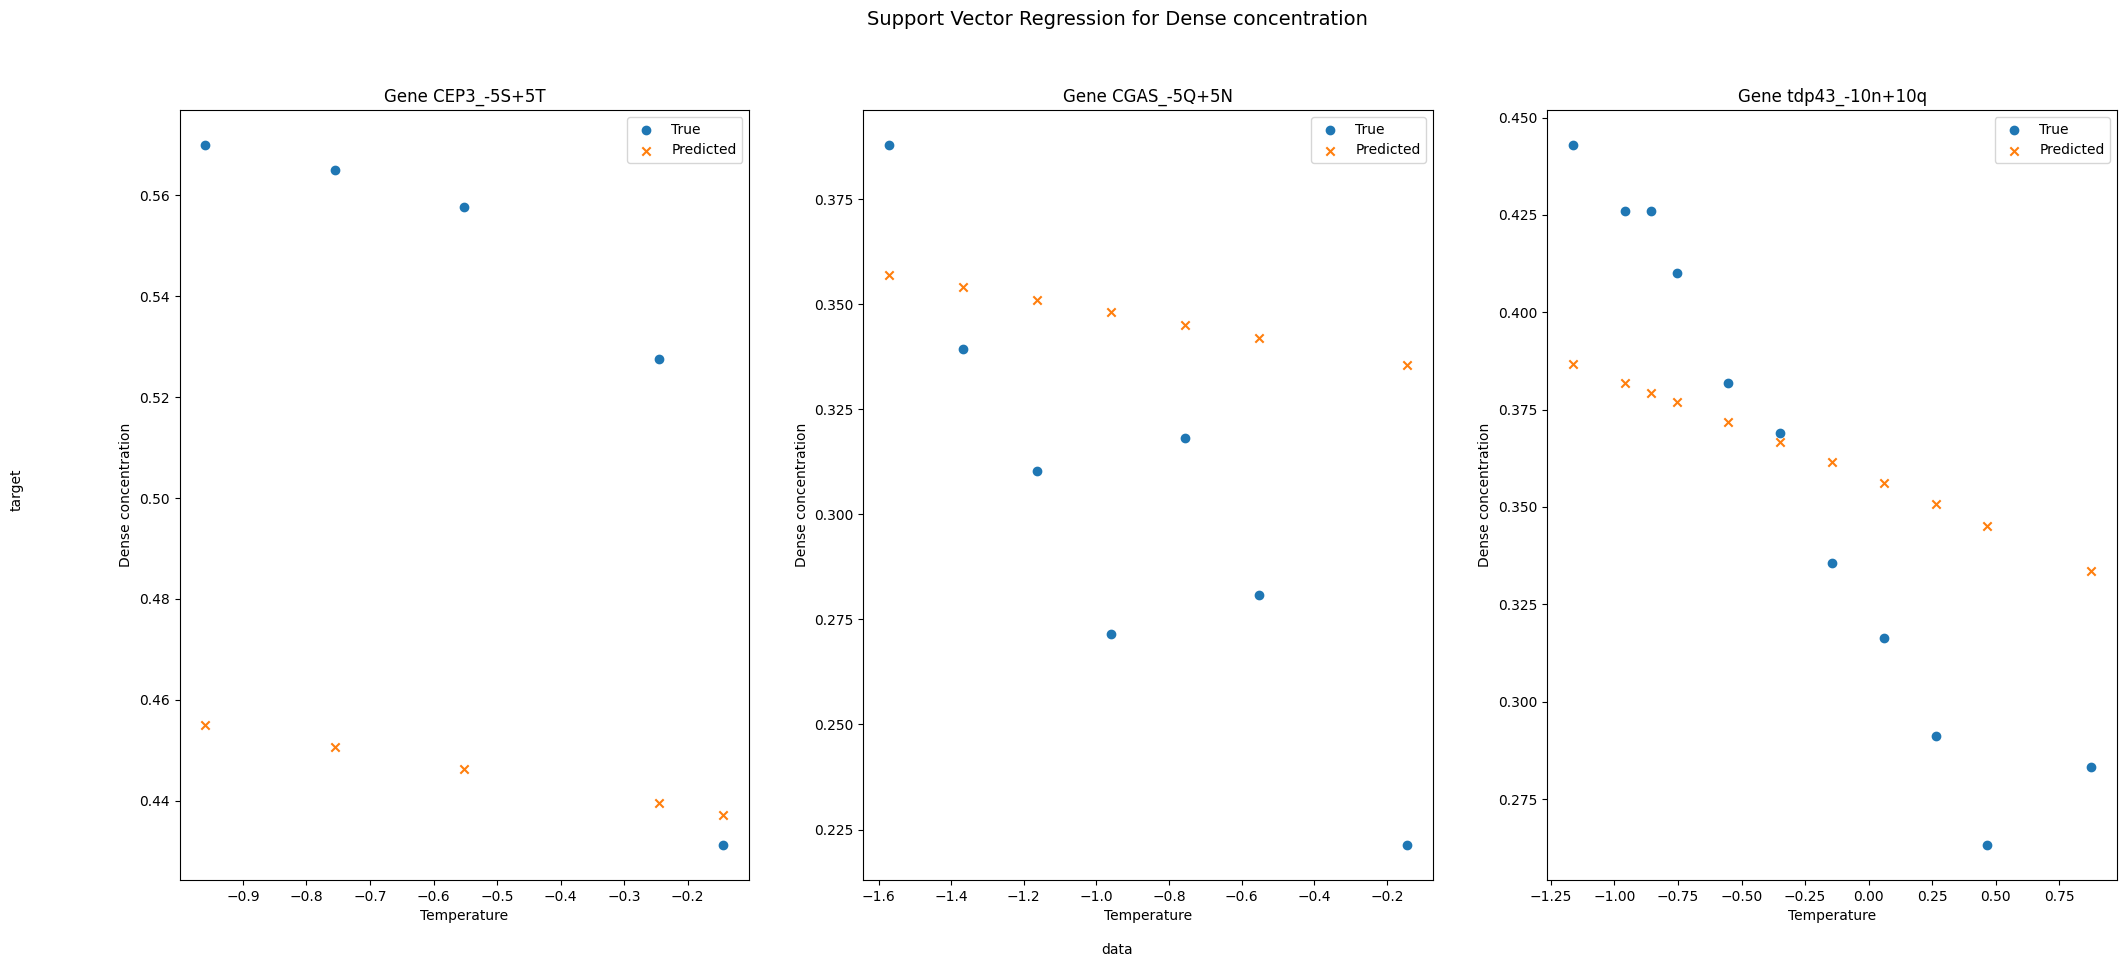

In [66]:
plot_tests(svr_rbf, Test, test_genes, shr_cols)

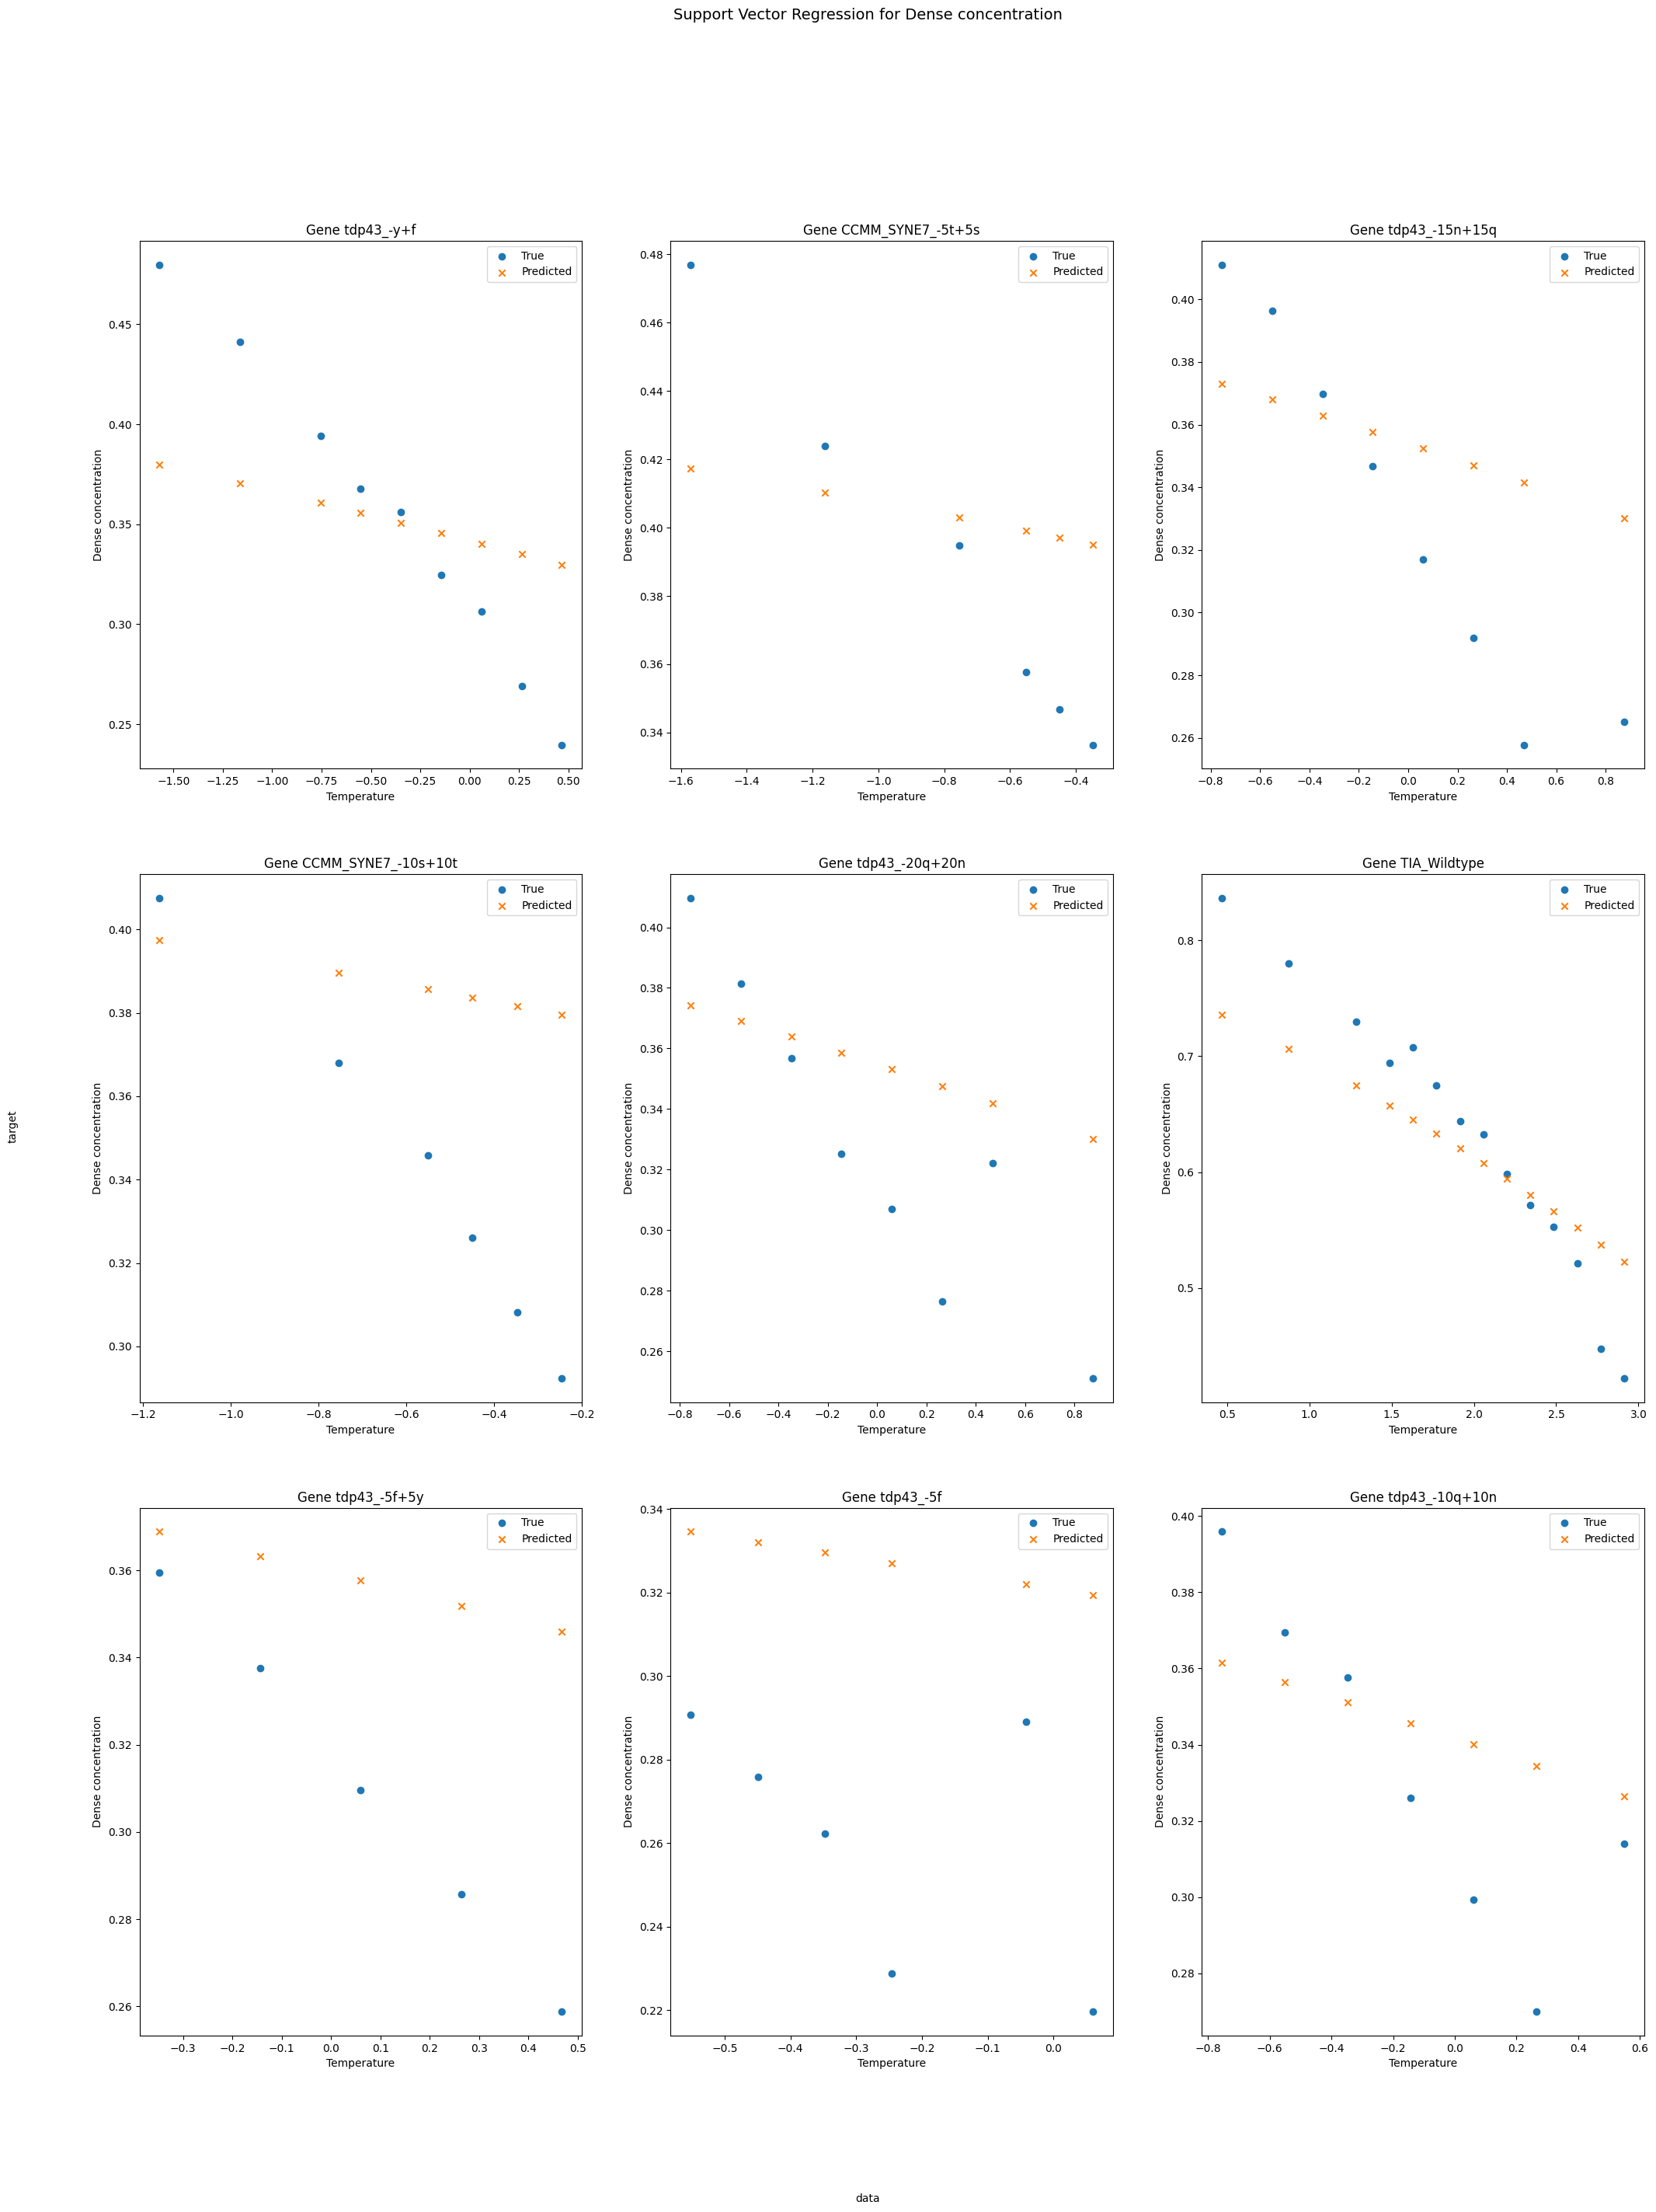

In [67]:
plot_tests(svr_rbf, Train, train_genes, shr_cols)

In [72]:
svr_rbf.predict(Test[Test.gene=='tdp43_-5n+5q'][shr_cols + ['temp']])

ValueError: Found array with 0 sample(s) (shape=(0, 15)) while a minimum of 1 is required by SVR.

In [70]:
svr_rbf.predict(Test[Test.gene=='tdp43_-5n+5q'][x_columns + ['temp']])

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- aromaticity(BP)
- asphericity(SP)
- compute_bivariate_iwd_charged_weighted(S)
- compute_iwd_charged_weighted_+(S)
- end_to_end_distance(SP)
- ...


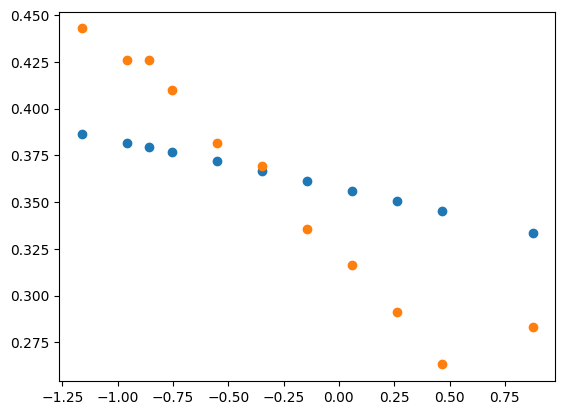

In [78]:
plt.scatter(Test[Test.gene == "tdp43_-10n+10q"]["temp"], svr_rbf.predict(Test[Test.gene=="tdp43_-10n+10q"][shr_cols + ['temp']]))
plt.scatter(Test[Test.gene == "tdp43_-10n+10q"]["temp"], Test[Test.gene == "tdp43_-10n+10q"]["dense_conc"])

In [80]:
svr_rbf.predict(Test[Test.gene=="tdp43_-10n+10q"][shr_cols + ['temp']])

array([0.38661534, 0.37685891, 0.37184085, 0.36672233, 0.38178196,
       0.36149775, 0.37933198, 0.35616141, 0.35070744, 0.34512986,
       0.33357914])

In [82]:
Test[Test.gene=="tdp43_-10n+10q"]['dense_conc']

24    0.442942
25    0.410131
26    0.381846
27    0.369117
28    0.425906
29    0.335562
30    0.425906
31    0.316374
32    0.291302
33    0.263219
34    0.283236
Name: dense_conc, dtype: float64

In [85]:
svr_rbf.predict(Test[Test.gene=="tdp43_-10n+10q"][shr_cols + ['temp']])

array([0.38661534, 0.37685891, 0.37184085, 0.36672233, 0.38178196,
       0.36149775, 0.37933198, 0.35616141, 0.35070744, 0.34512986,
       0.33357914])

In [246]:
Test[Test.gene=='TIA_Wildtype']['dense_conc']

91     0.836050
92     0.779766
93     0.729538
94     0.694047
95     0.707277
96     0.674615
97     0.643851
98     0.632888
99     0.598354
100    0.571476
101    0.552568
102    0.521355
103    0.447404
104    0.422380
Name: dense_conc, dtype: float64

In [86]:
scr.fit(X_train, y_train)

NameError: name 'scr' is not defined

In [43]:
scr.score(X_train, y_train)

-5.069274265764152

In [44]:
scr.n_support_

array([0])

In [57]:
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

In [58]:
svr_rbf.fit(X_train, y_train)

SVR(C=100, gamma=0.1)

In [59]:
svr_rbf.n_support_

array([25])

In [60]:
svr_rbf.support_

array([13, 14, 15, 16, 18, 19, 21, 26, 27, 28, 39, 40, 46, 54, 55, 61, 63,
       65, 66, 67, 68, 73, 74, 80, 81])

In [61]:
svr_rbf.predict(X_test)

array([0.38919123, 0.38919123, 0.38919123, 0.38919123, 0.38919123,
       0.38919123, 0.38919123, 0.38919123, 0.38919123, 0.38919123,
       0.38919123, 0.38919123, 0.38919123, 0.38919123, 0.38919123,
       0.38919123, 0.38919123, 0.38919123, 0.38919123, 0.38919123,
       0.38919123])

INFO - 2024-07-30 12:41:16,216 - matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO - 2024-07-30 12:41:16,217 - matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


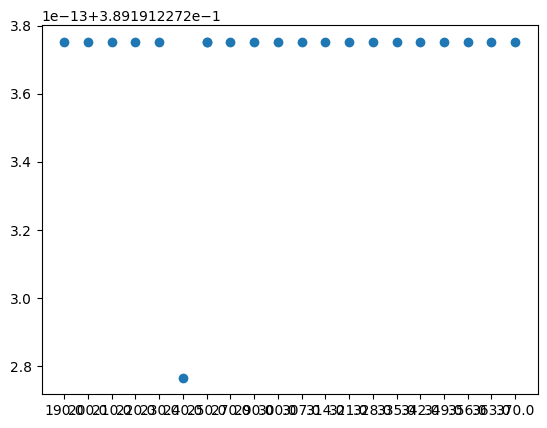

In [62]:
plt.figz
plt.scatter(X_test["temp"], svr_rbf.predict(X_test))

# DUMMY

In [87]:
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

In [88]:
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

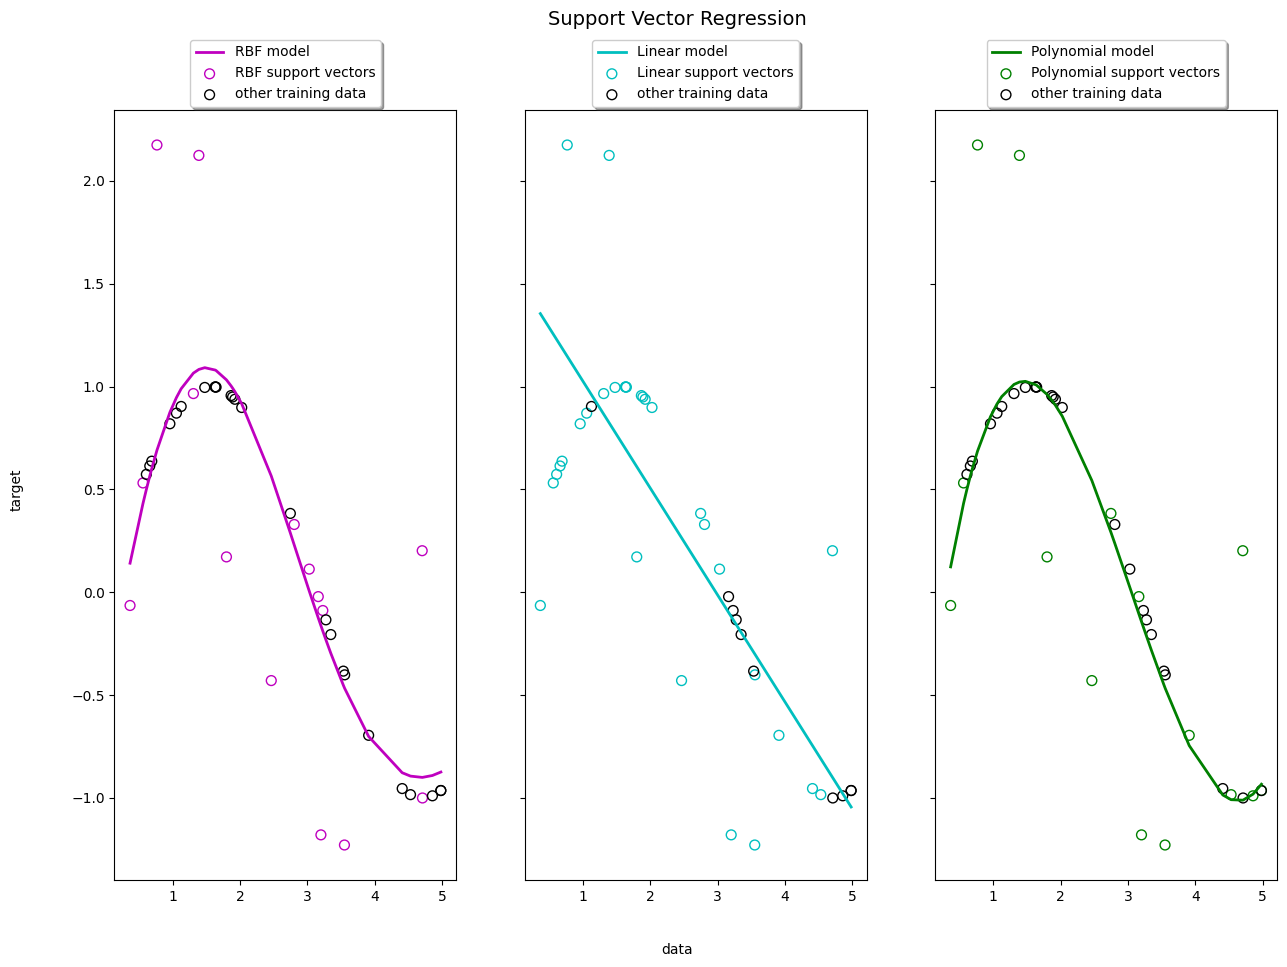

In [159]:
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "c", "g"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        X,
        svr.fit(X, y).predict(X),
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="other training data",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

# DECISION TREE REGRESSON

In [63]:
data_df_ext

,gene,arginine_count(C),molecular_weight(BP),isoelectric_pint(BP),aromaticity(BP),net_charge(BP),hydropathy_index(BP),length(BP),instability_index(BP),fraction_of_charged_residues(S),...,radius_of_gyration(SP),end_to_end_distance(SP),asphericity(SP),scaling_exponent(SP),prefactor(SP),temp,dilute_conc,dense_conc,var_dilute,var_dense
0,CCMM_SYNE7_-10s+10t,0.098765,8920.9116,10.253004,0.061728,4.130572,-0.602469,81,25.098765,0.172840,...,26.219981,62.526837,0.416176,0.539948,6.696292,150.0,5.634450e-07,0.456392,0.000002,0.388760
1,CCMM_SYNE7_-10s+10t,0.098765,8920.9116,10.253004,0.061728,4.130572,-0.602469,81,25.098765,0.172840,...,26.219981,62.526837,0.416176,0.539948,6.696292,170.0,9.687205e-07,0.407493,0.000003,0.348657
2,CCMM_SYNE7_-10s+10t,0.098765,8920.9116,10.253004,0.061728,4.130572,-0.602469,81,25.098765,0.172840,...,26.219981,62.526837,0.416176,0.539948,6.696292,190.0,2.615343e-06,0.368057,0.000009,0.304093
3,CCMM_SYNE7_-10s+10t,0.098765,8920.9116,10.253004,0.061728,4.130572,-0.602469,81,25.098765,0.172840,...,26.219981,62.526837,0.416176,0.539948,6.696292,200.0,8.243248e-06,0.345748,0.000016,0.278036
4,CCMM_SYNE7_-10s+10t,0.098765,8920.9116,10.253004,0.061728,4.130572,-0.602469,81,25.098765,0.172840,...,26.219981,62.526837,0.416176,0.539948,6.696292,205.0,5.455603e-06,0.325992,0.000012,0.269234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,TIA_Wildtype,0.010309,10888.7847,5.751049,0.154639,-0.505836,-1.051546,97,43.789691,0.020619,...,22.166524,49.816533,0.317135,0.373994,10.720762,342.0,9.088850e-03,0.571476,0.019048,0.084888
101,TIA_Wildtype,0.010309,10888.7847,5.751049,0.154639,-0.505836,-1.051546,97,43.789691,0.020619,...,22.166524,49.816533,0.317135,0.373994,10.720762,349.0,1.204201e-02,0.552568,0.019770,0.065328
102,TIA_Wildtype,0.010309,10888.7847,5.751049,0.154639,-0.505836,-1.051546,97,43.789691,0.020619,...,22.166524,49.816533,0.317135,0.373994,10.720762,356.0,1.248921e-02,0.521355,0.015879,0.056948
103,TIA_Wildtype,0.010309,10888.7847,5.751049,0.154639,-0.505836,-1.051546,97,43.789691,0.020619,...,22.166524,49.816533,0.317135,0.373994,10.720762,363.0,2.639162e-02,0.447404,0.021261,0.068108


In [91]:
X_train, X_test, y_train, y_test = train_test_split(data_df_ext[x_columns+["temp"]],
                                                    data_df_ext[["dilute_conc", "dense_conc"]],
                                                    test_size=0.2,
                                                    random_state=0,
                                                    shuffle=False)

In [92]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=8)
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)
regr_3.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [105]:
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)

In [106]:
y_3

array([[3.86225551e-08, 4.76951972e-01],
       [1.66147726e-06, 3.25633636e-01],
       [3.79649404e-04, 2.99447737e-01],
       [5.26447293e-04, 2.84771165e-01],
       [1.96467234e-03, 2.59946452e-01],
       [2.89010248e-01, 4.31244830e-01],
       [2.89010248e-01, 4.31244830e-01],
       [2.89010248e-01, 4.31244830e-01],
       [2.89010248e-01, 4.31244830e-01],
       [2.89010248e-01, 4.31244830e-01],
       [2.89010248e-01, 4.31244830e-01],
       [2.89010248e-01, 4.31244830e-01],
       [2.89010248e-01, 4.31244830e-01],
       [2.89010248e-01, 4.31244830e-01],
       [2.89010248e-01, 4.31244830e-01],
       [2.89010248e-01, 4.31244830e-01],
       [2.89010248e-01, 4.31244830e-01],
       [2.89010248e-01, 4.31244830e-01],
       [2.89010248e-01, 4.31244830e-01]])

In [111]:
y_train

,dilute_conc,dense_conc
0,9.687205e-07,0.407493
1,2.615343e-06,0.368057
2,8.243248e-06,0.345748
3,5.455603e-06,0.325992
4,5.501849e-04,0.308180
...,...,...
68,1.967255e-03,0.258798
69,0.000000e+00,0.441373
70,6.068844e-08,0.394083
71,8.943457e-08,0.367811


In [112]:
temp = X_test.temp.values
temp

array([150., 220., 230., 240., 250., 250., 270., 290., 300., 307., 314.,
       321., 328., 335., 342., 349., 356., 363., 370.])

In [113]:
s = 25

In [114]:
temp_org = [str(v)+"_ORG" for v in temp]
temp = [str(v)+"_predicted" for v in temp]

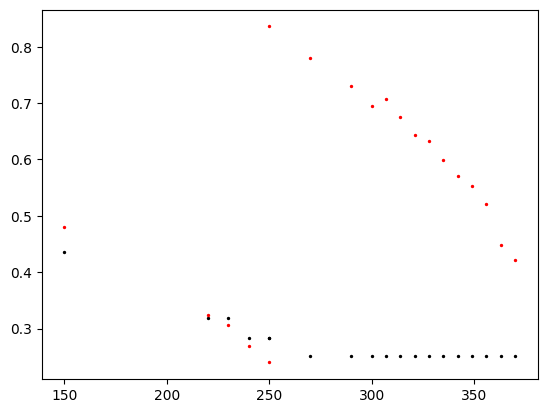

In [127]:
plt.scatter(X_test["temp"], y_2[:,1], c="black", s=2, edgecolor="black", label="max_depth=5")
plt.scatter(X_test["temp"], y_test["dense_conc"], c="red", s=2, edgecolor="red", label="max_depth=5")

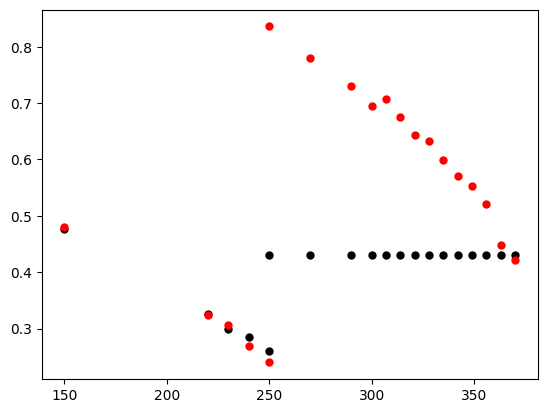

In [138]:
plt.scatter(X_test["temp"], y_3[:,1], c="black", s=s, edgecolor="black", label="max_depth=8")
plt.scatter(X_test["temp"], y_test["dense_conc"], c="red", s=s, edgecolor="red", label="max_depth=8")

In [142]:
y_test

,dilute_conc,dense_conc
73,0.000000,0.479753
74,0.000001,0.324538
75,0.000174,0.306441
76,0.000974,0.268916
77,0.001897,0.239712
78,0.002808,0.836050
79,0.006299,0.779766
80,0.004348,0.729538
81,0.003218,0.694047
82,0.002548,0.707277


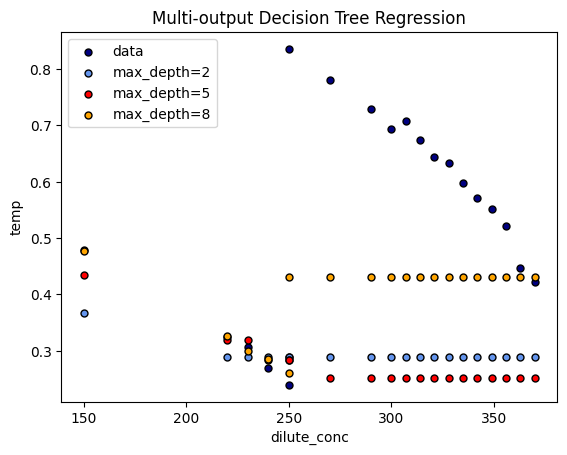

In [146]:
plt.figure()
s = 25
plt.scatter(X_test["temp"], y_test["dense_conc"], c="navy", s=s, edgecolor="black", label="data")
plt.scatter(
    X_test["temp"],
    y_1[:,1],
    c="cornflowerblue",
    s=s,
    edgecolor="black",
    label="max_depth=2",
)
plt.scatter(X_test["temp"], y_2[:,1], c="red", s=s, edgecolor="black", label="max_depth=5")
plt.scatter(
    X_test["temp"], y_3[:,1], c="orange", s=s, edgecolor="black", label="max_depth=8"
)
#plt.xlim([-0.15, 0.15])
#plt.ylim([0.25, 1])
plt.xlabel("dilute_conc")
plt.ylabel("temp")
plt.title("Multi-output Decision Tree Regression")
plt.legend(loc="best")

# ax = plt.gca()
# for i, txt in enumerate(temp):
#     ax.annotate(txt, (y_3[:, 0][i], y_3[:, 1][i]))

plt.show()

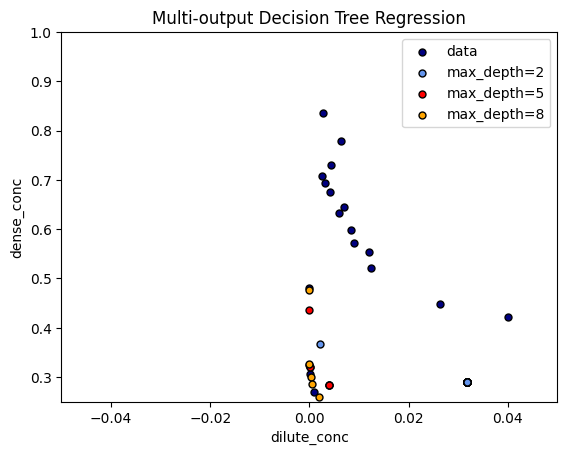

In [154]:
plt.figure()
s = 25
plt.scatter(y_test.iloc[:, 0], y_test.iloc[:, 1], c="navy", s=s, edgecolor="black", label="data")
plt.scatter(
    y_1[:, 0],
    y_1[:, 1],
    c="cornflowerblue",
    s=s,
    edgecolor="black",
    label="max_depth=2",
)
plt.scatter(y_2[:, 0], y_2[:, 1], c="red", s=s, edgecolor="black", label="max_depth=5")
plt.scatter(
    y_3[:, 0], y_3[:, 1], c="orange", s=s, edgecolor="black", label="max_depth=8"
)
plt.xlim([-0.05, 0.05])
plt.ylim([0.25, 1])
plt.xlabel("dilute_conc")
plt.ylabel("dense_conc")
plt.title("Multi-output Decision Tree Regression")
plt.legend(loc="best")

# ax = plt.gca()
# for i, txt in enumerate(temp):
#     ax.annotate(txt, (y_3[:, 0][i], y_3[:, 1][i]))

plt.show()

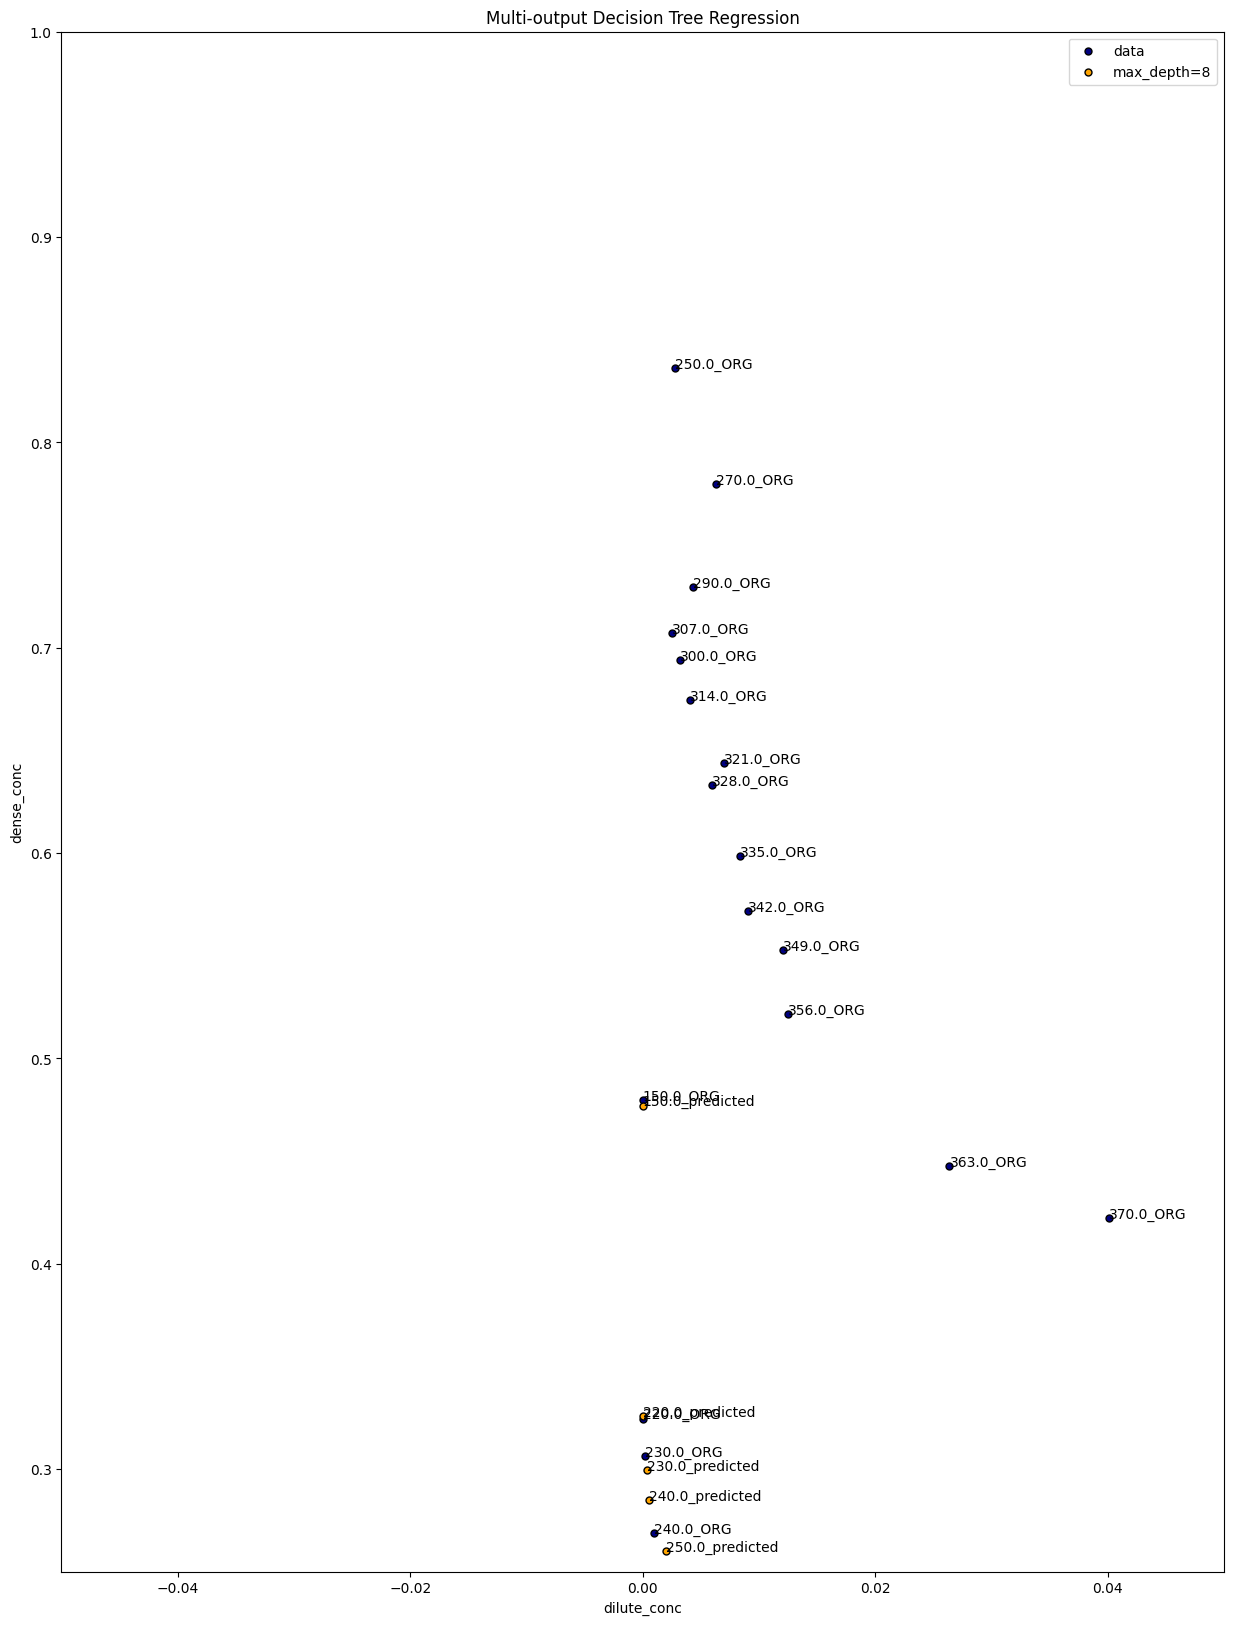

In [158]:
plt.figure(figsize=(15,20))

s = 25
plt.scatter(y_test.iloc[:, 0], y_test.iloc[:, 1], c="navy", s=s, edgecolor="black", label="data")
plt.scatter(
    y_3[:, 0], y_3[:, 1], c="orange", s=s, edgecolor="black", label="max_depth=8"
)
plt.xlim([-0.05, 0.05])
plt.ylim([0.25, 1])
plt.xlabel("dilute_conc")
plt.ylabel("dense_conc")
plt.title("Multi-output Decision Tree Regression")
plt.legend(loc="best")

ax = plt.gca()
for i, txt in enumerate(temp_org):
    ax.annotate(txt, (y_test.iloc[:, 0].iloc[i], y_test.iloc[:, 1].iloc[i]))
for i, txt in enumerate(temp):
    ax.annotate(txt, (y_3[:, 0][i], y_3[:, 1][i]))

#plt.savefig('MODTR.png')
plt.show()